# Librerias

Se instalan e importan las librerías necesarias

## Instalacion de librerías

In [1]:
#Instalacion de librerías
## yfinance
!pip install yfinance --upgrade --no-cache-dir

## mplfinance
!pip install mplfinance

##stocksymbol
!pip install stocksymbol --upgrade --no-cache-dir


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importación de librerías

In [2]:
#Se importan las librerías
## Numéricas
import pandas as pd
import numpy as np

## Formato fechas
from datetime import datetime
from datetime import datetime, timedelta
from dateutil import relativedelta

## Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Finanzas
import yfinance as yf
import mplfinance as mpf
from stocksymbol import StockSymbol

## Modelos
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Otros
from sklearn.preprocessing import MinMaxScaler


# Funciones

## [do_ticker_list] Generar lista de tickers

do_ticker_list genera una lista (estructura nativa python) a partir de un ticker de yfinance (DataFrame de pandas)

In [3]:
def do_ticker_list(dataframe):
  """
  Genera una lista de tickers a partir de un dataframe de yfinance
  """
  ticker_list=dataframe.ticker.values.tolist()
  return(ticker_list)

## [search_ticker] Listar tickers de mercados o índices

Con "StockSymbol" se podrá obtener información básica de los diferentes tickers

search_ticker permite listar los tickers de indíces o empresas de países obteniendo un dataframe con los datos

In [4]:
def search_ticker (lookfor='ind', here='all'):
  """
  Busqueda de indices de empresas por pais con 'ind' o
  del listado de empresa por país 'comp'
  """

  #Se usa la clave para acceder a los listados
  api_key = '456a8be7-eaf9-4848-8977-b02e5fe14f39'
  ss = StockSymbol(api_key)

  #Se obtiene la lista de indices disponibles
  index_list_full = ss.index_list
  datos=pd.DataFrame(index_list_full)
  datos.indexId
  index_list=datos.indexId.values.tolist()

  #Busqueda de INDICES por país
  if lookfor == 'ind' and here not in index_list:
    dfi=pd.DataFrame(ss.index_list)
    col_names=['country','country_ab','ticker','indexName']
    dfi.columns=col_names

    if here != 'all':
      print('Indexes available in:', here.capitalize(), '\n')
      df=dfi[dfi['country']==here]
      return(df)

    else:
      print('List of all the indexes available\n')
      df=dfi
      return(df)

  #Busqueda de EMPRESAS por INDICE
  elif lookfor == 'comp' and here in index_list:
    print('Companies listed in:', here.capitalize(), '\n')
    symbol_list = ss.get_symbol_list(index=here)
    df=pd.DataFrame(symbol_list)
    col_names=['ticker','shortName', 'longName', 'exchange', 'country', 'quoteType']
    df.columns=col_names
    return(df)

  #Busqueda de EMPRESAS por PAIS
  elif lookfor == 'comp' and here != 'all':
    print('Companies listed in:', here.capitalize(), '\n')
    symbol_list = ss.get_symbol_list(market=here)
    df=pd.DataFrame(symbol_list)
    col_names=['ticker','shortName', 'longName', 'exchange', 'country', 'quoteType']
    df.columns=col_names
    return(df)

  else:
    print('Unavailable search')

## [yfin_info] Obtener la info de los tickers

yfin_info sirve para obtener información de los tickers. Puede generar gráficos de velas japones y obtenerse un dataframe con los datos históricos entre las fechas indicadas.

In [5]:
def yfin_info(ticker, init_date, end_date, interval="1d", rounding=True, graph=False, vol=False, MA=(0), data=True):
  """
  Funcion que aprovechandose de la libreria "yfinance" devuelve datos de un
  ticker y/o su gráfica de velas con diferentes opciones.
  ---
  Lista de intervalos admitidos: "1m","2m","5m","15m","30m","60m","90m","1h","1d","5d","1wk","1mo","3mo"
  rounding = True --> Se redondea a 2 decimales
  fechas debe tener el siguiente formato de str: "yyyy-mm-dd"
  
  Hay que tener las siguientes librerias:
  import yfinance as yf
  import mplfinance as mpf
  from datetime import datetime, timedelta
  """

  #Lista de intervalos admitidas
  interval_list=["1m","2m","5m","15m","30m","60m","90m","1h","1d","5d","1wk","1mo","3mo"]

  #Se comprueba que el intervalo esté en la lista, sino se da uno por defecto
  if interval not in interval_list:
    print("El intervalo escogido no está en la lista, se usará 1dia (1d) por defecto")
    interval="1d"

  #Se obtiene la información del ticker y se guarda en un objeto pandas
  company=yf.Ticker(ticker)
  data_comp=company.history(interval=interval, start=init_date, end=end_date, rounding=rounding)

  #Ciclo para realizar la gráfica
  if graph==True:

  #Se genera el gráfico de velas japonesas

    if interval in ["1d","5d","1wk","1mo","3mo"]:
      init_date_time=datetime.strptime(init_date, '%Y-%m-%d')
      end_date_time=datetime.strptime(end_date, '%Y-%m-%d')
      deltadays=end_date_time-init_date_time
      days_interval=deltadays.days
      plotvelastitle= ticker + ' prices between ' + init_date + ' to ' + end_date + ' (' + str(days_interval) +' days)'
    else:
      plotvelastitle= ticker + ' prices between ' + init_date + ' to ' + end_date

    if MA==(0): #Si no se quieren graficar medias móviles
      mpf.plot(data_comp, type='candle', title=plotvelastitle, style='charles', volume=vol)

    else: #Si se desea graficar medias móviles
      mpf.plot(data_comp, type='candle', title=plotvelastitle, style='charles', volume=vol, mav=MA)

  #Se exportan los datos

  if data==True:
    return(data_comp)

##[norm_minmax] Normalizacion MIN-MAX

Función para normalizar un dataframe en función de sus valores mínimos y máximos. Normaliza por columnas.

In [6]:
def norm_minmax (df):
  """
  Funcion para normalizar un dataframe por min-max
  """
  df_n=(df-df.min())/(df.max()-df.min())
  return (df_n)

## [plot_multi_ticker] Varias gráficas en un mismo plot

Función para obtener gráficas compuestas de las representaciones de varios valores.
Se le pasa una lista con tickers, los parámetros de entrada y directamente el programa se encarga de descargar los tickers y realizar la gráfica.

In [7]:
init_date="2020-01-01"
end_date="2022-01-01"
interval="1d"

In [8]:
def plot_multi_ticker(tickerlist, init_date, end_date, norm=True, interval='1d', tag='Close', sx=20, sy=10):
  """
  Graficas de uno o varios tickers
  """
  #Lista de tags permitidos
  tag_list=['Open', 'High', 'Low', 'Close', 'Volume']

  #Se inicializa la lista de series
  df_list=[]

  #Se van generando las diferentes series
  for ticker in tickerlist:
    df = yfin_info(ticker=ticker, init_date=init_date, end_date=end_date, graph=False, interval=interval, data=True)[tag]
    
    #Opcion de normalizar los datos
    if norm==True:
      df = df/df[0]

    #Se va añadiendo el df al listado  
    df_list.append(df)

  #Se construye el dataframe
  df_total=pd.concat(df_list, axis=1)

  #Se cambian los índices para que cada columna se corresponda con el ticker
  df_total.columns=tickerlist

  #Se imprimen las gráficas
  if norm==True:
    ylabel_2 = ' price vs initial data (X/1)'
    title_2 = ' price vs initial data ' 
  else:
    ylabel_2 = ' price ($)'
    title_2 = 'date'


  df_total.plot(title='Stock price vs' + title_2 + '(from '+init_date+' to '+end_date+')',
                xlabel='Date',
                ylabel=tag + ylabel_2,
                colormap='tab10',
                grid=True,
                figsize=(sx,sy))


## [plotly_yf] Graficas interactivas con plotly

Con la librería plotly se crean gráficas estéticas e interactivas (se puede hacer zoom, obtener valores de las etiquetas pasando el ratón, etc.) de forma sencilla y de casi cualquier tipología.

Se genera la función "plotly_yf" para tener predefinida la gráfica de velas japonesas y así generarlas de forma más sencilla.

In [9]:
def plotly_yf (ticker, init_date, end_date, MA=2, interval="1d"):
  """
  A partir de los datos de YahooFinance se crean gráficas de velas interactivas
  """
  try:
    comp_name=yf.Ticker(ticker).info['longName']

    if comp_name == None:
      comp_name = ticker
  except:
    try:
      comp_name=yf.Ticker(ticker).info['shortName']
      if comp_name == None:
        comp_name = ticker
    except:
      comp_name=ticker
      pass

  #Se toman los datos de la funcion yfin_info
  df = yfin_info(ticker=ticker, init_date=init_date, end_date=end_date, interval=interval, rounding=True, graph=False, vol=False, MA=(0), data=True).reset_index()

  #Candlestick
  c_set={
      'x' : df['Date'],
      'open' : df['Open'],
      'high' : df['High'],
      'low' : df['Low'],
      'close' : df['Close'],
      'type' : 'candlestick',
      'name' : 'OHLC of '+ comp_name +' stock prices',
  }

  #Media movil
  ##Calculo de la media movil
  MAdf=df.Close.rolling(window=MA, min_periods=1).mean()

  ma_set={
      'x' : df['Date'],
      'y' : MAdf,
      'type' : 'scatter',
      'mode' : 'lines',
      'name' : 'Moving Average (Close) of '+str(MA)+' days',
        }
  #Se unen los sets a graficar
  data=[c_set, ma_set]

  #Creacion de gráficas con plotly
  ## Layout
  layout= go.Layout({
      'title' : {
          'text': comp_name+' stock price vs date from '+init_date+' to '+end_date
      }
  })

  ##Graficas
  fig = go.Figure(data=data, layout=layout)
  fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price/stock ($)',)
  fig.show()

## [tickername] Obtener el nombre del ticker

tickername busca el nombre del ticker en yfinance para emplearse en los títulos de las gráficas

In [10]:
def tickername (ticker):
  tckname=yf.Ticker(ticker).info['longName']
  return (tckname)


# Carga de datos

En este apartado se cargarán los datos que se van a emplear para el análisis y predicción del valor de las acciones.

Parte de los datos se toman desde archivos descargados de diferentes fuentes (Banco Central Europeo, Banco Mundial, Reserva Federal de los Estados Unidos, etc.) y otros se toman directamente del scrapping que realiza yfinance de la web de Yahoo.

## Desde archivos CSV

In [11]:
#Se importa la librería de google colab para gestionar archivos
from google.colab import files

In [12]:
#Se conecta con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Ruta donde se tienen los datos
ruta_datos='/content/drive/MyDrive/0_TFM_BD/data/'

In [14]:
#Se define una lista con los nombres exactos de los ficheros a cargar
csvfiles=['ds1_usdollarVSeuroMonthly.csv','ds2_governmentDebt%GDPTrimester.csv','ds3_inflationEuropeMonthly.csv',
         'ds4_InterestRatesEuroZoneMonhtly.csv','ds5_unemploymentEuropeMonthly.csv','ds6_eurosInCirculation.csv',
         'ds7_BillionsDollarInCirculation.csv','ds8_InternDataUnempInterestMonthly.csv','ds9_UnemploymentRatioMonthly.csv']

#Se define una lista con los nombres con los que se identificaran
csvnames=['DollarVSEuro','GovDebt3m','InfEU',
          'IntEU','UnempEU','EurCirc',
          'DolCirc','InternationalData','UnempRatio']

#Se define una lista con las variables a las que se van a asignar los datasets
csvids=['df1','df2','df3',
        'df4','df5','df6',
        'df7','df8','df9']

#Se genera un diccionario con las listas de información
csvdata={'csvfile':csvfiles,
         'csvname':csvnames,
         'csvid':csvids}

#Se genera el DataFrame con toda la información de las listas
csvlist=pd.DataFrame(csvdata)

Se cargan los archivos CSV generando los diferentes datasets en pandas

In [15]:
#GENERACIÓN DE LOS DATAFRAMES DESDE LOS CSV

#Dataframe 1: EURO VS DOLLAR

## Leo el CSV
df1 = pd.read_csv(ruta_datos+csvlist['csvfile'][0])

#Uso la fecha como índice
df1['date']=pd.to_datetime(df1.date)
df1.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df1['day']=df1.index.day
df1['month']=df1.index.month
df1['year']=df1.index.year
#--------------------------------------------------------

#Dataframe 2: GOVERNMENT DEBT

## Leo el CSV
df2 = pd.read_csv(ruta_datos+csvlist['csvfile'][1])

#Uso la fecha como índice
df2['date']=pd.to_datetime(df2.date)
df2.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df2['day']=df2.index.day
df2['month']=df2.index.month
df2['year']=df2.index.year
#--------------------------------------------------------

#Dataframe 3: INFLATION (EUROPE)

## Leo el CSV
df3 = pd.read_csv(ruta_datos+csvlist['csvfile'][2])

#Uso la fecha como índice
df3['date']=pd.to_datetime(df3.date)
df3.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df3['day']=df3.index.day
df3['month']=df3.index.month
df3['year']=df3.index.year
#--------------------------------------------------------

#Dataframe 4: INTEREST RATES (EUROPE)

## Leo el CSV
df4 = pd.read_csv(ruta_datos+csvlist['csvfile'][3])

#Uso la fecha como índice
df4['date']=pd.to_datetime(df4.date)
df4.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df4['day']=df4.index.day
df4['month']=df4.index.month
df4['year']=df4.index.year
#--------------------------------------------------------

#Dataframe 5: UNEMPLOYMENT (EUROPE)

## Leo el CSV
df5 = pd.read_csv(ruta_datos+csvlist['csvfile'][4])

#Uso la fecha como índice
df5['date']=pd.to_datetime(df5.date)
df5.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df5['day']=df5.index.day
df5['month']=df5.index.month
df5['year']=df5.index.year
#--------------------------------------------------------

#Dataframe 6: EUROS IN CIRCULATION

## Leo el CSV
df6 = pd.read_csv(ruta_datos+csvlist['csvfile'][5])

#Uso la fecha como índice
df6['date']=pd.to_datetime(df6.date)
df6.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df6['day']=df6.index.day
df6['month']=df6.index.month
df6['year']=df6.index.year
#--------------------------------------------------------

#Dataframe 7: DOLLARS IN CIRCULATION (BILLIONS)

## Leo el CSV
df7 = pd.read_csv(ruta_datos+csvlist['csvfile'][6])

#Uso la fecha como índice
df7['date']=pd.to_datetime(df7.date)
df7.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df7['day']=df7.index.month
df7['month']=df7.index.day
df7['year']=df7.index.year

###DETECCION DE ERROR DURANTE LA IMPORTACION
###Se detectó un problema de importación de fecha del CSV. Se corrige con el
###_siguiente código

###Se genera una nueva columna para generar correctamente la fecha
df7['date']=df7.year.apply(str)+'-'+df7.month.apply(str)+'-'+df7.day.apply(str)

###Se pasa la columna a formato fecha
df7['date'] =  pd.to_datetime(df7['date'], infer_datetime_format=True)

###Se cambia el índice a esta nueva columna de fecha corregida
df7.set_index(['date'],inplace=True, drop=True)

#--------------------------------------------------------

#Dataframe 8: INTERNATIONAL DATA - UNEMPLOYMENT AND INTEREST RATES (US)

## Leo el CSV
df8 = pd.read_csv(ruta_datos+csvlist['csvfile'][7])

#Uso la fecha como índice
df8['date']=pd.to_datetime(df8.date)
df8.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df8['day']=df8.index.day
df8['month']=df8.index.month
df8['year']=df8.index.year
#--------------------------------------------------------

#Dataframe 9: UNEMPLOYMENT RATIO (EUROPE)

## Leo el CSV
df9 = pd.read_csv(ruta_datos+csvlist['csvfile'][8])

#Uso la fecha como índice
df9['date']=pd.to_datetime(df9.date)
df9.set_index('date', inplace=True)

#Genero las columnas de dia, año, mes
df9['day']=df9.index.day
df9['month']=df9.index.month
df9['year']=df9.index.year

###DETECCION DE ERROR DURANTE LA IMPORTACION
###Se detectó un problema de importación de fecha del CSV. Se corrige con el
###_siguiente código

###Se genera una nueva columna para generar correctamente la fecha
df9['date']=df9.year.apply(str)+'-'+df9.month.apply(str)+'-'+df9.day.apply(str)

###Se pasa la columna a formato fecha
df9['date'] =  pd.to_datetime(df9['date'], infer_datetime_format=True)

###Se cambia el índice a esta nueva columna de fecha corregida
df9.set_index(['date'],inplace=True, drop=True)
#--------------------------------------------------------


## Desde yfinance

In [16]:
#Se define la función que permita generar los dataframe de forma fácil

def yf_df(ticker, i_date, e_date, interval="1d", rounding=True, date=True):
  """
  Import Hist Data YFinance
  ---
  import historical data from yfinance as a DataFrame (Pandas)
  ---
  > ticker: ticker name
  > i_date: initial date (older) in format 'yyyy-mm-dd'
  > e_date: end date (newer) in format 'yyyy-mm-dd'
  > interval: interval of time selected for the data.Supported intervals:
  ["1m","2m","5m","15m","30m","60m","90m","1h","1d","5d","1wk","1mo","3mo"]
  > rounding: True -> round to 2digits; False -> no rounding
  """

  #Lista de intervalos admitidas
  interval_list=["1m","2m","5m","15m","30m","60m","90m","1h","1d","5d","1wk","1mo","3mo"]

  #Se comprueba que el intervalo esté en la lista, sino se da uno por defecto
  if interval not in interval_list:
    print("El intervalo escogido no está en la lista, se usará 1dia (1d) por defecto")
    interval="1d"

  #Se obtiene la información del ticker y se guarda en un objeto pandas
  try:
    company=yf.Ticker(ticker)
    df=company.history(interval=interval, start=i_date, end=e_date, rounding=rounding)
    
    #Genero las columnas de dia, año, mes
    if date==True:
      df.index.names=['date']
      df['day']=df.index.day
      df['month']=df.index.month
      df['year']=df.index.year

    return(df)
  
  except:
    print("Error in ticker name or loading yfinance library")
  

In [17]:
#Se definen los parámetros a emplear para la importación de datos de yfinance

## Fecha de inicio/fin de adquisición de datos
init_date='2020-01-01'
end_date='2022-01-01'

## Intervalo de análisis de datos
interval="1d" #Datos diarios

In [18]:
#Lista de tickers de interés
tickerlist=['^GSPC','^IXIC','EURUSD=X','GBPUSD=X', 'BZ=F','GC=F','SI=F','^IBEX', '^N225', '^GDAXI']


In [19]:
#Se descarga la información desde YahooFinance en un solo DataFrame de varios tickers
dfyf=yf.download(tickerlist, init_date, end_date, interval=interval, rounding=True)

[*********************100%***********************]  10 of 10 completed


In [20]:
#Se descargan los tickers a analizar

## Ticker: SP500
ticker='^GSPC'

df_sp500 = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: NASDAQ
ticker='^IXIC'

df_nasdaq = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: Euro vs Dolar
ticker='EURUSD=X'

df_eurusd = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: Libra vs Dolar
ticker='GBPUSD=X'

df_gbpusd = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: Barril de Brent
ticker='BZ=F'

df_brent = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: Oro
ticker='GC=F'

df_gold = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: Plata
ticker='SI=F'

df_silver = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: Ibex
ticker='^IBEX'

df_ibex = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: Nikkei
ticker='^N225'

df_nikkei = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------

## Ticker: Dax
ticker='^GDAXI'

df_dax = yf_df(ticker,init_date, end_date)
#--------------------------------------------------------


# Exploración y limpieza de datos

En este apartado se van a analizar los diferentes datasets cargados

## CSV

Se procede a analizar los diferentes datasets obtenidos de diversas fuentes mediante descarga de los ficheros y carga en este cuaderno. Para todos ellos se hará una visión global de sus variables, se estudiarán los valores nulos, y duplicados

Previamente genero la función "exploracioncsv" para hacer un análisis general previo a los CSV

In [21]:
def exploracioncsv(df):
  #Se recopila información del df
  f_size=(20,15)
  date_format='%d/%m/%y'
  dname=df.columns.values[0]
  filas, columnas = df.shape
  n_columnas = df.columns.values
  n_indice = df.index.name
  t_indice = type(df.index)
  duplicados = df.duplicated().sum()
  prim_fecha = df.index.min().strftime(date_format)
  ult_fecha = df.index.max().strftime(date_format)
  lista_meses = df.index.month.unique().sort_values(ascending=True).to_list()
  sum_meses = len(lista_meses)
  lista_dias = df.index.day.unique().sort_values(ascending=True).to_list()
  sum_dias = len(lista_dias)

  #Se obtienen los días y meses de diferencia entre las fechas inicial y final
  ## dias
  diferencia = datetime.strptime(ult_fecha, date_format) - datetime.strptime(prim_fecha, date_format)
  dias_dif = diferencia.days

  #Se muestran los resultados del analisis exploratorio del CSV
  print('========================================================')
  print(f'>>> DATASET {dname}\n')

  #Descripción general
  print(f'>> DATOS GENERALES\n')
  print(f'> El dataset tiene {filas} filas y {columnas} columnas')
  print(f'> Las columnas son las siguientes: {n_columnas}')
  print('> Lista de columnas y sus tipos de datos\n')
  print(df.dtypes)
  print(f'\n> Su índice se llama "{n_indice}" y es del tipo "{t_indice}"')
  print('\n> Vista de los 5 primeros valores')
  print(df.head(5))
  print('\n> Vista de los 5 últimos valores')
  print(df.tail(5))
  print('\n> Descripción general de sus valores')
  print(df.describe())

  # Valores nulos
  print(f'\n>> ANALISIS DE VALORES NULOS')
  print('\n> Cantidad de valores nulos\n')
  print(df.isna().sum().sort_values(ascending=False))
  print('\n> % de valores nulos sobre el total\n')
  print(df.isna().mean().sort_values(ascending=False)*100)

  # Valores duplicados
  print(f'\n>> ANALISIS DE VALORES DUPLICADOS')
  print(f'\n> Cantidad de valores duplicados: {duplicados}\n')
  if duplicados != 0:
    print('\n Lista de los valores duplicados:\n')
    print(df[df.duplicated(keep=False)])

  # Analisis fechas
  print(f'\n>> Análisis de las fechas del dataset')
  print(f'\n> Primera fecha: {prim_fecha}')
  print(f'\n> Ultima fecha: {ult_fecha}')
  if filas < dias_dif:
    res_dias = ' registros, por tanto faltan ' + str(abs(filas-dias_dif))+' registros posibles'
  elif filas > dias_dif:
    res_dias = ' registros, por tanto sobran ' + str(abs(filas-dias_dif))+' registros posibles'
  else:
    res_dias = ' registros, todos los posibles'  
  print(f'\n> Dias entre las fechas inicial y final: {abs(dias_dif)} y hay {filas}' + res_dias)
  print(f'\n> Los meses listados son: {lista_meses} ({sum_meses} de 12 posibles)')
  print(f'\n> Los dias listados son: {lista_dias} ({sum_dias} de 31 posibles)')


  print(f'\n> Heatmap para la observación de valores nulos:')
  ##Gráfica de Heatmap
  ###Se definen los colores
  colours = ['#000099', '#ffff00'] # Amarillo -> Valor nulo; Azul -> Valor no nulo

  ### Nombres de las columnas
  df_c = df.columns[:]

  sns.heatmap(df[df_c].isna(), cmap=sns.color_palette(colours))

  print('\n---------- \nGráfica de los datos:\n')

  df.iloc[:,0:-3].plot(figsize=f_size);

  print('\n-- Fin del análisis general --')
  print('========================================================\n\n')

### Dataframe 1: EURO VS DOLLAR

>>> DATASET dollarVSeuro

>> DATOS GENERALES

> El dataset tiene 6117 filas y 4 columnas
> Las columnas son las siguientes: ['dollarVSeuro' 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

dollarVSeuro    float64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
            dollarVSeuro  day  month  year
date                                      
1999-04-01          1.18    1      4  1999
1999-05-01          1.18    1      5  1999
1999-06-01          1.17    1      6  1999
1999-07-01          1.16    1      7  1999
1999-08-01          1.17    1      8  1999

> Vista de los 5 últimos valores
            dollarVSeuro  day  month  year
date                                      
2022-08-17          1.02   17      8  2022
2022-08-18          1.02   18      8  2022
2022-08-19          1.01   19      8  2022
20

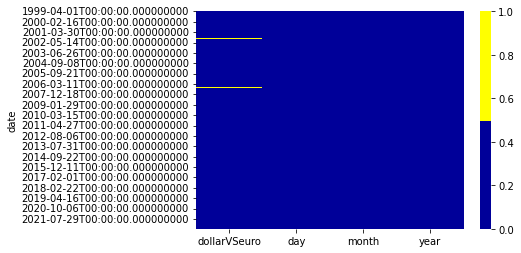

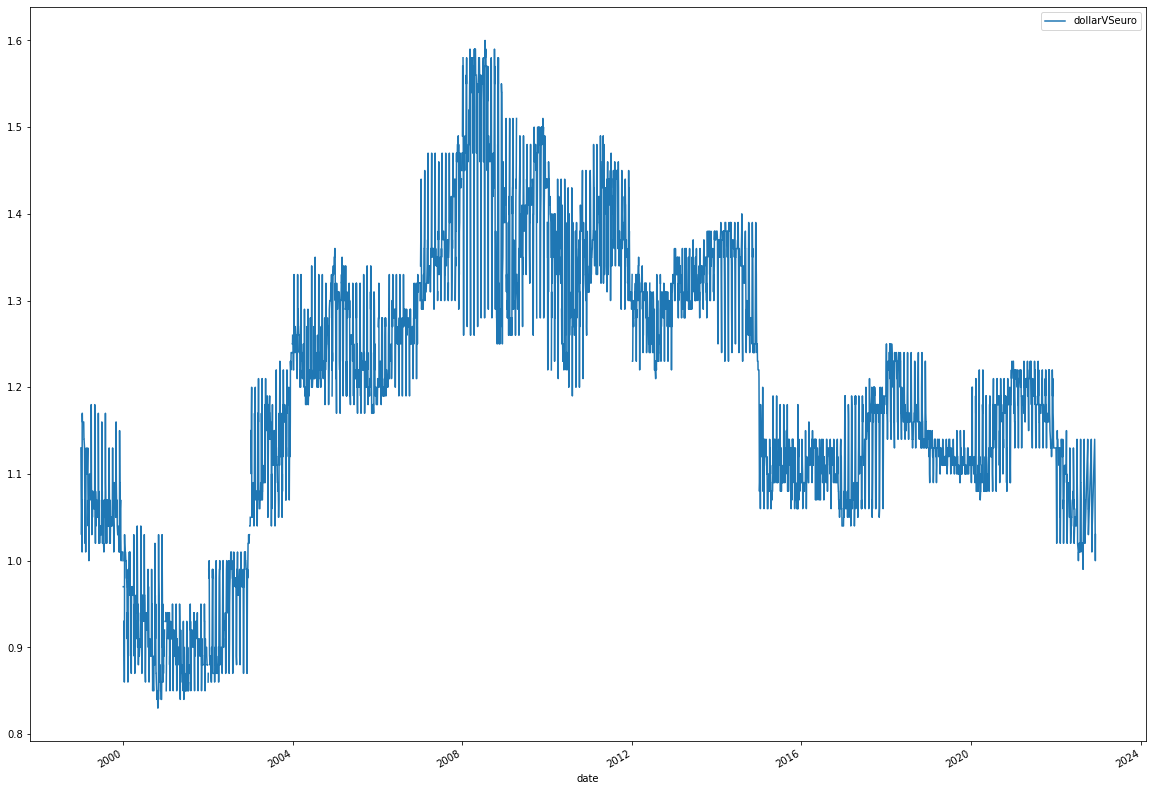

In [22]:
exploracioncsv(df1)

Observaciones del análisis previo:

- Se podrían eliminar los datos nulos al representar muy pocos valores
- Se tienen datos desde el 02/01/1960 hasta el 08/12/2022
- Los datos son diarios, aunque faltan algunos días.
- Para la columna con datos, los valores son todos positivos entre 0,83 y 1.6


#### Exploración en detalle

In [23]:
print('Número de datos por cada año')
df1.groupby(df1.index.year).size()

Número de datos por cada año


date
1999    260
2000    260
2001    261
2002    261
2003    261
2004    262
2005    260
2006    260
2007    261
2008    262
2009    261
2010    261
2011    260
2012    259
2013    255
2014    255
2015    256
2016    257
2017    255
2018    255
2019    255
2020    257
2021    258
2022    165
dtype: int64

Observaciones detalladas:
- Hay días en los que no se han recogido datos, estos días se llenarán con el último valor de la serie disponible

#### Preparación del dataset

Se van a rellenar los valores del dataset que están vacíos con el último valor de la serie disponible

In [24]:
print(df1.isna().sum())
df1=df1.ffill(axis=0)
print('\nResultado tras aplicar la corrección:')
print(df1.isna().sum())

dollarVSeuro    62
day              0
month            0
year             0
dtype: int64

Resultado tras aplicar la corrección:
dollarVSeuro    0
day             0
month           0
year            0
dtype: int64


###Dataframe 2: GOVERNMENT DEBT

>>> DATASET GovDebt%

>> DATOS GENERALES

> El dataset tiene 93 filas y 4 columnas
> Las columnas son las siguientes: ['GovDebt%' 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

GovDebt%    float64
day           int64
month         int64
year          int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
            GovDebt%  day  month  year
date                                  
1999-03-31       NaN   31      3  1999
1999-06-30       NaN   30      6  1999
1999-09-30       NaN   30      9  1999
1999-12-31       NaN   31     12  1999
2000-03-31      71.6   31      3  2000

> Vista de los 5 últimos valores
            GovDebt%  day  month  year
date                                  
2021-03-31     99.97   31      3  2021
2021-06-30     98.20   30      6  2021
2021-09-30     97.58   30      9  2021
2021-12-31     95.66   31     12  2021
2022-03-31     95.59   31      3  202

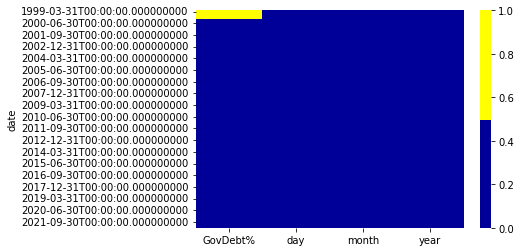

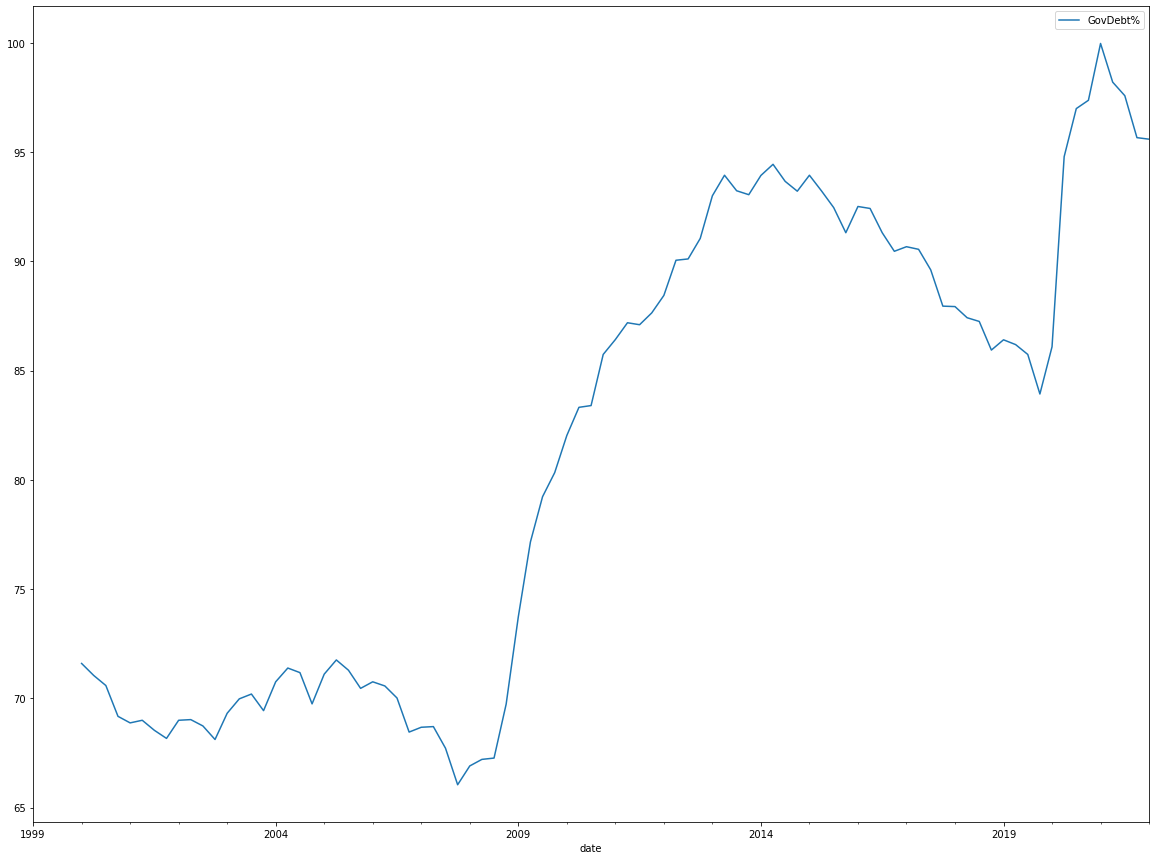

In [25]:
exploracioncsv(df2)

Observaciones del análisis previo:

- Se podrían eliminar los datos nulos al representar muy pocos valores
- Solo se disponen de datos trimestrales (a final de cada trimestre)
- Se disponen de valores desde el primer trimestre de 1999 (31/03/199) hasta el primer trimestre de 2022 (31/03/2022)

#### Preparación del dataset

Se van a rellenar/eliminar los valores nulos del dataset.

In [26]:
print(df2.isna().sum())
df2=df2.dropna()
print('\nResultado tras aplicar la corrección:')
print(df2.isna().sum())

GovDebt%    4
day         0
month       0
year        0
dtype: int64

Resultado tras aplicar la corrección:
GovDebt%    0
day         0
month       0
year        0
dtype: int64


###Dataframe 3: INFLATION (EUROPE)

>>> DATASET InflationRate

>> DATOS GENERALES

> El dataset tiene 283 filas y 4 columnas
> Las columnas son las siguientes: ['InflationRate' 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

InflationRate    float64
day                int64
month              int64
year               int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
            InflationRate  day  month  year
date                                       
1999-01-31            0.8   31      1  1999
1999-02-28            0.7   28      2  1999
1999-03-31            0.9   31      3  1999
1999-04-30            1.1   30      4  1999
1999-05-31            0.9   31      5  1999

> Vista de los 5 últimos valores
            InflationRate  day  month  year
date                                       
2022-03-31            7.4   31      3  2022
2022-04-30            7.4   30      4  2022
2022-05-31            8.1   3

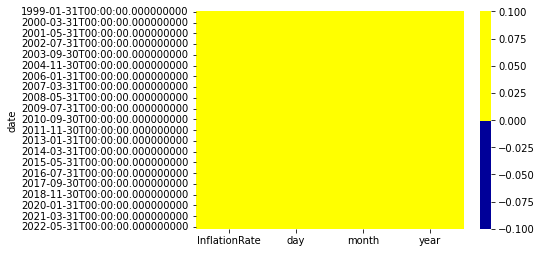

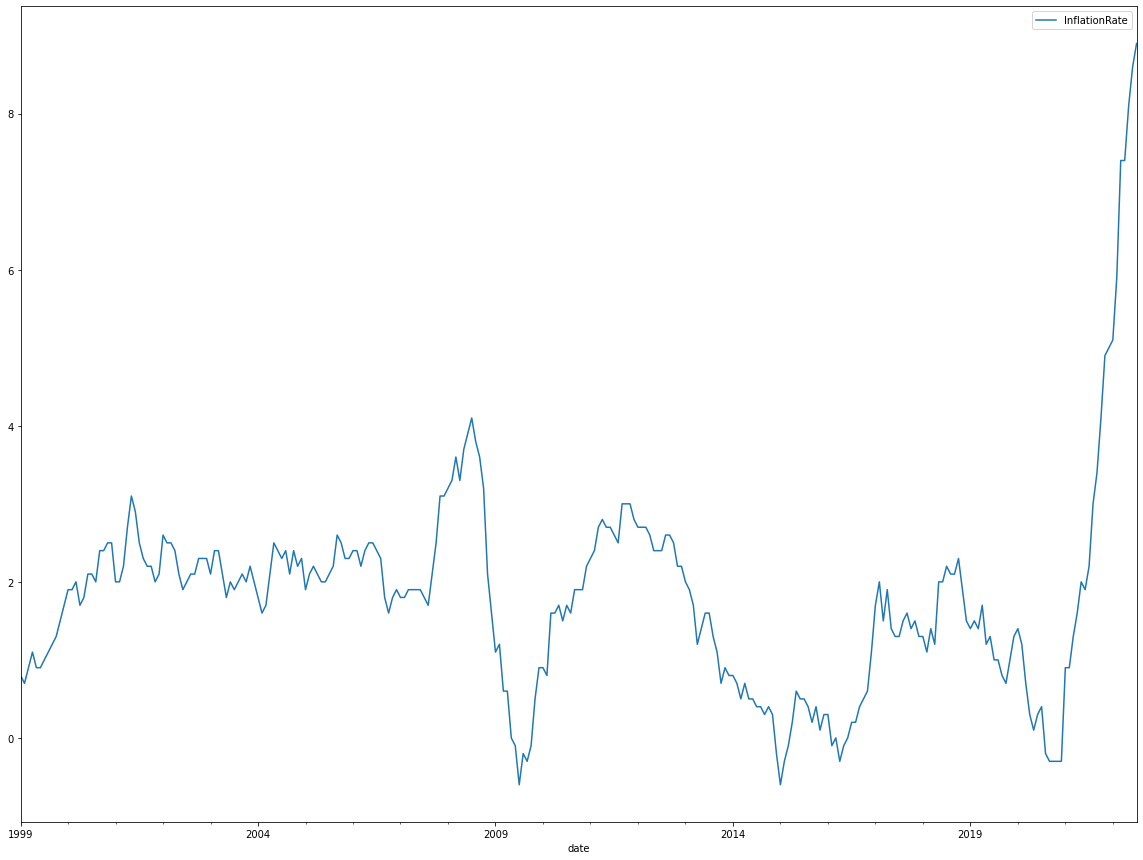

In [27]:
exploracioncsv(df3)

Observaciones del análisis previo:

- No hay valores nulos

#### Preparación del dataset

No es necesario realizar acciones sobre este dataset

###Dataframe 4: INTEREST RATES (EUROPE)

>>> DATASET InterestRates

>> DATOS GENERALES

> El dataset tiene 234 filas y 4 columnas
> Las columnas son las siguientes: ['InterestRates' 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

InterestRates    float64
day                int64
month              int64
year               int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
            InterestRates  day  month  year
date                                       
2003-01-31           0.00   31      1  2003
2003-02-28          -0.03   28      2  2003
2003-03-31          -0.06   31      3  2003
2003-04-30          -0.06   30      4  2003
2003-05-31          -0.05   31      5  2003

> Vista de los 5 últimos valores
            InterestRates  day  month  year
date                                       
2022-02-28           0.01   28      2  2022
2022-03-31           0.00   31      3  2022
2022-04-30           0.01   3

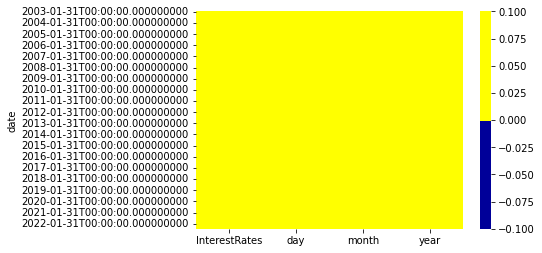

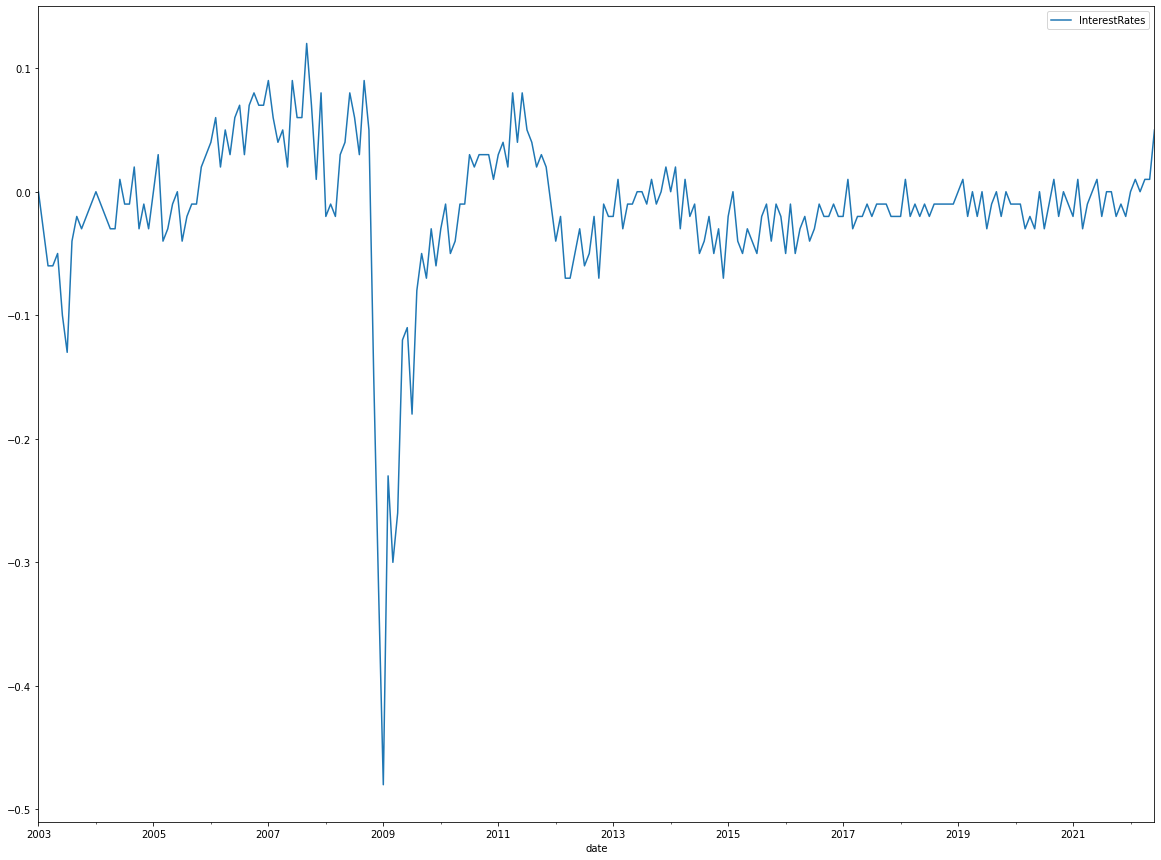

In [28]:
exploracioncsv(df4)

Observaciones del análisis previo:

- No hay valores nulos ni duplicados
- Se observa un valor negativo elevado en el año 2009. Se comprueba que no es un valor atípico, si no un valor real debido a una estrategia monetaria para evitar la crisis que sucedión en la época

#### Preparación del dataset

No es necesario realizar acciones sobre este dataset

###Dataframe 5: UNEMPLOYMENT (EUROPE)

>>> DATASET unemploy%

>> DATOS GENERALES

> El dataset tiene 282 filas y 4 columnas
> Las columnas son las siguientes: ['unemploy%' 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

unemploy%    float64
day            int64
month          int64
year           int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
            unemploy%  day  month  year
date                                   
1999-01-31      10.08   31      1  1999
1999-02-28      10.00   28      2  1999
1999-03-31       9.95   31      3  1999
1999-04-30       9.93   30      4  1999
1999-05-31       9.88   31      5  1999

> Vista de los 5 últimos valores
            unemploy%  day  month  year
date                                   
2022-02-28       6.83   28      2  2022
2022-03-31       6.74   31      3  2022
2022-04-30       6.63   30      4  2022
2022-05-31       6.58   31      5  2022
2022-06-30       

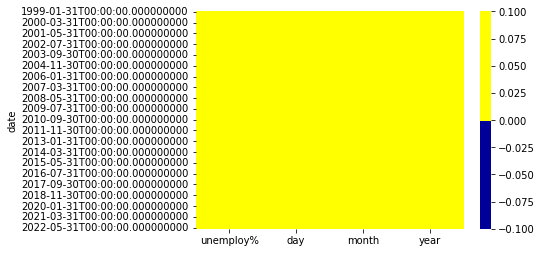

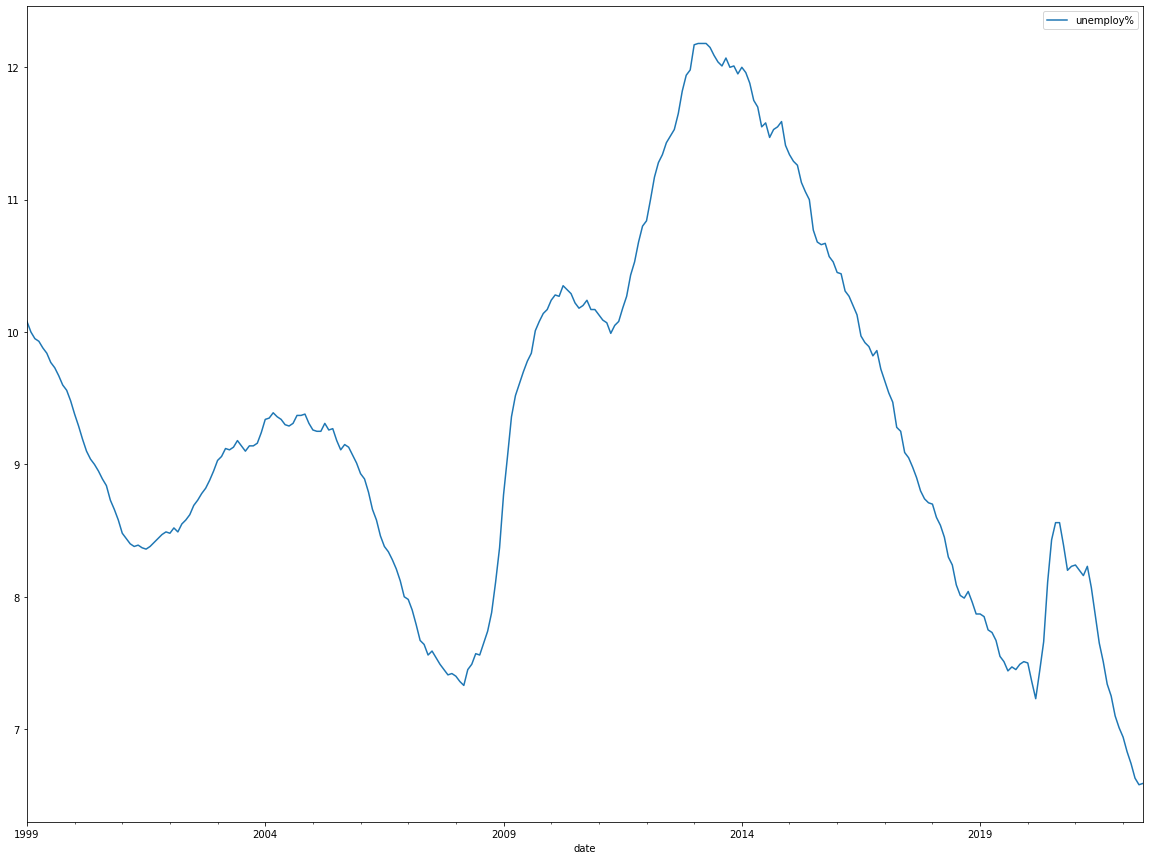

In [29]:
exploracioncsv(df5)

Observaciones del análisis previo:

- No existen valores nulos
- Se observa como la tendencia es negativa y justo antes de la crisis del 2008 se produjo un valle

#### Preparación del dataset

No es necesario realizar acciones sobre este dataset

###Dataframe 6: EUROS IN CIRCULATION

>>> DATASET ThousandsOfEurosInCirculation

>> DATOS GENERALES

> El dataset tiene 247 filas y 4 columnas
> Las columnas son las siguientes: ['ThousandsOfEurosInCirculation' 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

ThousandsOfEurosInCirculation    int64
day                              int64
month                            int64
year                             int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
            ThousandsOfEurosInCirculation  day  month  year
date                                                       
2002-01-31                      221480768   31      1  2002
2002-02-28                      246535448   28      2  2002
2002-03-31                      264149836   31      3  2002
2002-04-30                      271138424   30      4  2002
2002-05-31                      281820756   31      5  2002

> Vista de los 5 últimos valores
     

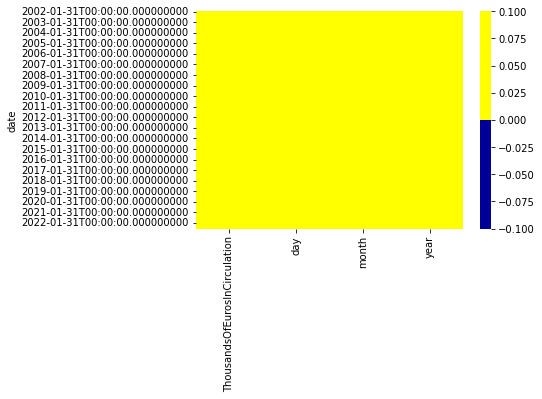

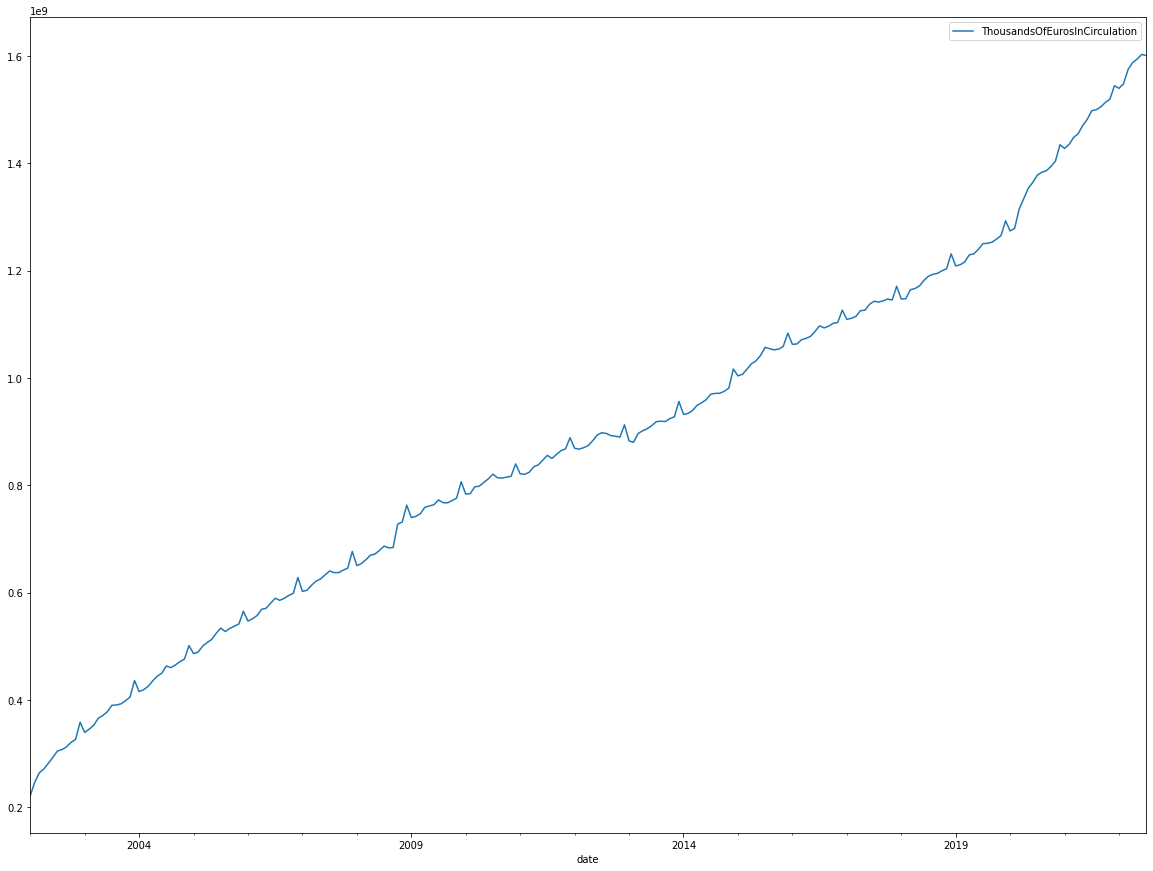

In [30]:
exploracioncsv(df6)

Observaciones del análisis previo:

- No existen valores nulos ni duplicados
- La tendencia es positiva, se lleva incrementando la existen de euros de forma prácticamente ininterrumpida (excepto el último periodo)

#### Preparación del dataset

No es necesario realizar acciones sobre este dataset



###Dataframe 7: DOLLARS IN CIRCULATION (BILLIONS)

>>> DATASET BillionsOfDollarsCirc

>> DATOS GENERALES

> El dataset tiene 1260 filas y 4 columnas
> Las columnas son las siguientes: ['BillionsOfDollarsCirc' 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

BillionsOfDollarsCirc    float64
day                        int64
month                      int64
year                       int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
            BillionsOfDollarsCirc  day  month  year
date                                               
1917-08-01                  3.714    1      8  1917
1917-09-01                  3.774    1      9  1917
1917-10-01                  3.865    1     10  1917
1917-11-01                  3.916    1     11  1917
1917-12-01                  4.055    1     12  1917

> Vista de los 5 últimos valores
            BillionsOfDollarsCirc  day  month  year
date                                            

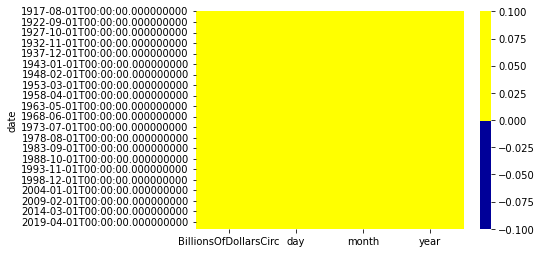

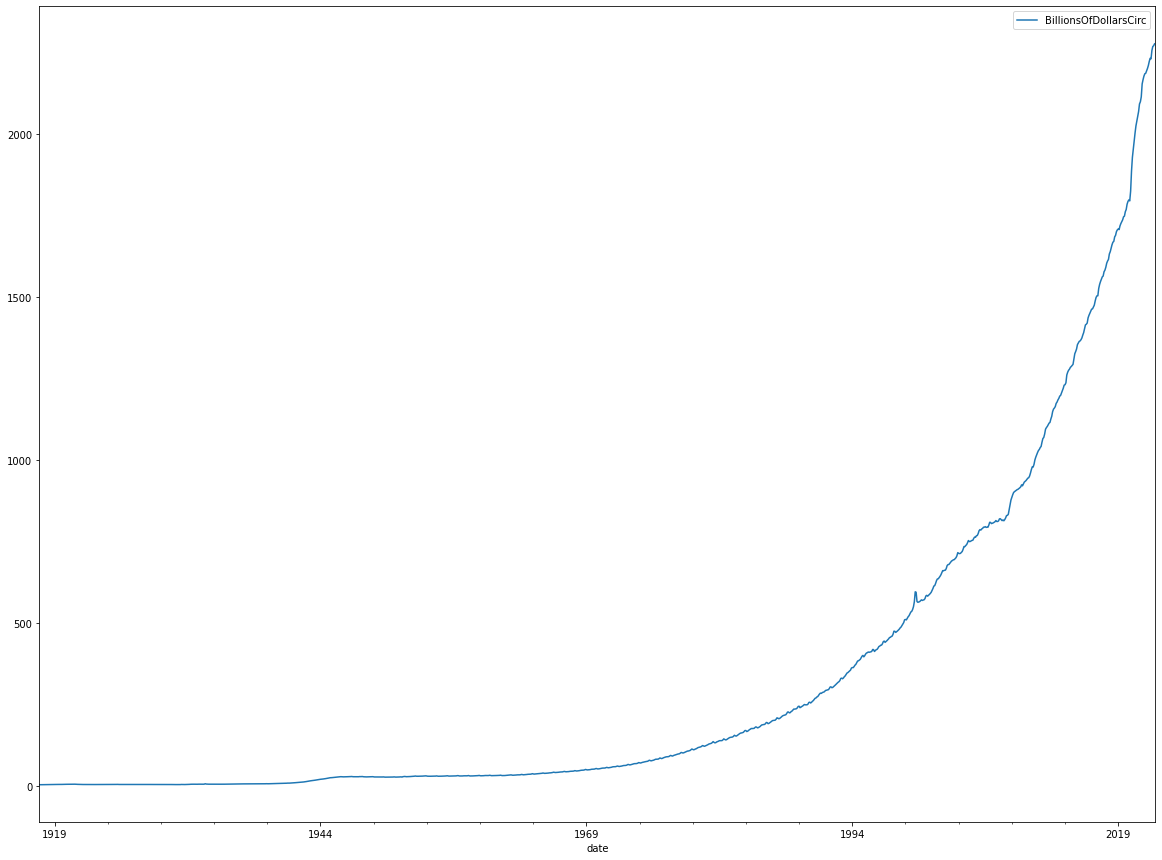

In [31]:
exploracioncsv(df7)

Observaciones del análisis previo:

- No hay valores nulos que corregir ni valores duplicados
- El aumento del valor de los dólares es exponencial

#### Preparación del dataset

No es necesario realizar acciones sobre este dataset

###Dataframe 8: INTERNATIONAL DATA - UNEMPLOYMENT AND INTEREST RATES (US)

>>> DATASET UE_IPC

>> DATOS GENERALES

> El dataset tiene 390 filas y 9 columnas
> Las columnas son las siguientes: ['UE_IPC' 'US_IndIndex' 'US_Unempl' 'US_IPC' 'US_IntRate'
 'US_SP500_AccumRent' 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

UE_IPC                float64
US_IndIndex           float64
US_Unempl             float64
US_IPC                float64
US_IntRate            float64
US_SP500_AccumRent    float64
day                     int64
month                   int64
year                    int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
            UE_IPC  US_IndIndex  US_Unempl  US_IPC  US_IntRate  \
date                                                             
1990-01-31     NaN          NaN        5.4     NaN         NaN   
1990-02-28     NaN          NaN        5.3     NaN         NaN   
1990-03-31     NaN          NaN        5.2     NaN       

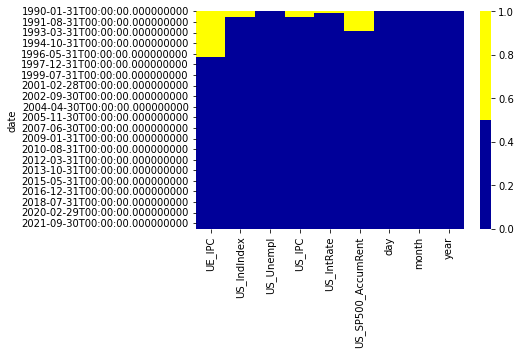

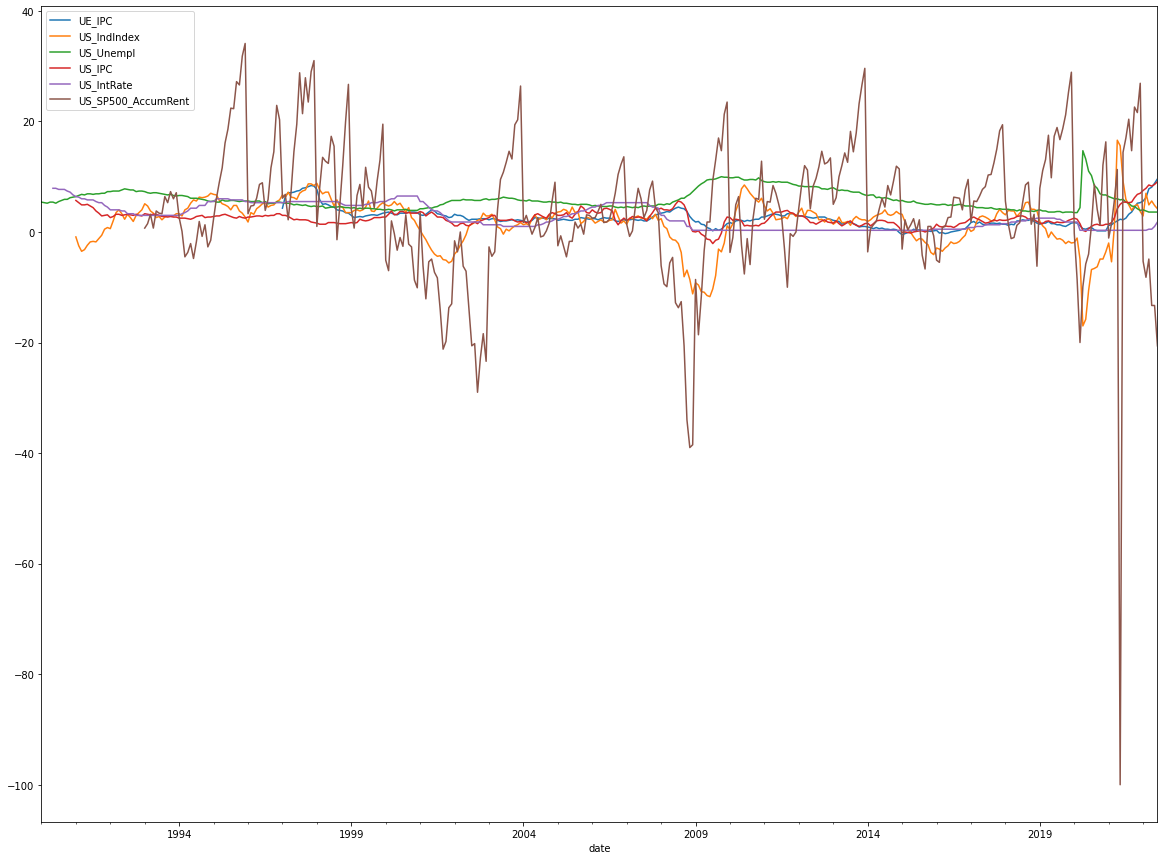

In [32]:
exploracioncsv(df8)

Observaciones del análisis previo:

- Existen varias de las columnas con datos nulos. Alguna de ella con un alto porcentaje (más del 20%). Se deberán analizar estos nulos
- Se tienen valores de Europa (1 columna) y valores de Estados Unidos (el resto)
- Valores mensuales

#### Exploración en detalle

In [33]:
df8

UE_IPC  US_IndIndex  US_Unempl  US_IPC  US_IntRate  \
date                                                             
1990-01-31     NaN          NaN        5.4     NaN         NaN   
1990-02-28     NaN          NaN        5.3     NaN         NaN   
1990-03-31     NaN          NaN        5.2     NaN         NaN   
1990-04-30     NaN          NaN        5.4     NaN         NaN   
1990-05-31     NaN          NaN        5.4     NaN         7.9   
...            ...          ...        ...     ...         ...   
2022-02-28     6.2          7.0        3.8     7.9         0.3   
2022-03-31     7.8          4.9        3.6     8.5         0.5   
2022-04-30     8.1          5.6        3.6     8.3         0.5   
2022-05-31     8.8          4.8        3.6     8.6         1.0   
2022-06-30     9.6          4.2        3.6     9.1         1.8   

            US_SP500_AccumRent  day  month  year  
date                                              
1990-01-31                 NaN   31      1  1990  
1990-02-28                 NaN   28      2  1990  
1990-03-31                 NaN   31      3  1990  
1990-04-30                 NaN   30      4  1990  
1990-05-31                 NaN   31      5  1990  
...                        ...  ...    ...   ...  
2022-02-28                -8.2   28      2  2022  
2022-03-31                -4.9   31      3  2022  
2022-04-30               -13.3   30      4  2022  
2022-05-31               -13.3   31      5  2022  
2022-06-30               -20.6   30      6  2022  

[390 rows x 9 columns]

- Se observa que los valores nulos se dan en fechas previas al comienzo de adquisición de datos según el valor listado. No existen valores no nulos en fechas posteriores. Por tanto, se decide dejar el dataset como está.

#### Preparación del dataset

Se decide no modificar el dataset ya que es consistente con los valores que contiene, siendo los no nulos valores de los que se tienen dato por ser fechas previas al comienzo de la adquisición de datos.

###Dataframe 9: UNEMPLOYMENT RATIO (EUROPE)

>>> DATASET Unemp_OCDE

>> DATOS GENERALES

> El dataset tiene 748 filas y 17 columnas
> Las columnas son las siguientes: ['Unemp_OCDE' 'Unemp_UE' 'Unemp_SPAIN' 'Unemp_GERMANY' 'Unemp_FRANCE'
 'Unemp_NETHERLANDS' 'Unemp_ITALY' 'Unemp_POLAND' 'Unemp_SWEDEN'
 'Unemp_CANADA' 'Unemp_SOUTHKOREA' 'Unemp_US' 'Unemp_JAPAN' 'Unemp_UK'
 'day' 'month' 'year']
> Lista de columnas y sus tipos de datos

Unemp_OCDE           float64
Unemp_UE             float64
Unemp_SPAIN          float64
Unemp_GERMANY        float64
Unemp_FRANCE         float64
Unemp_NETHERLANDS    float64
Unemp_ITALY          float64
Unemp_POLAND         float64
Unemp_SWEDEN         float64
Unemp_CANADA         float64
Unemp_SOUTHKOREA     float64
Unemp_US             float64
Unemp_JAPAN          float64
Unemp_UK             float64
day                    int64
month                  int64
year                   int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"



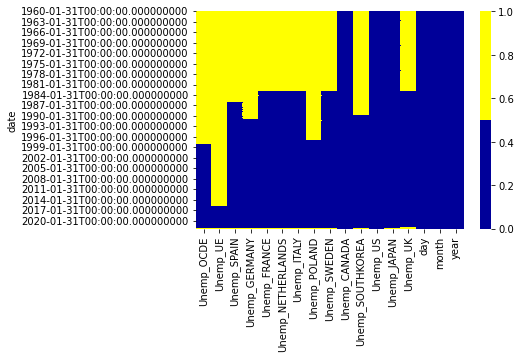

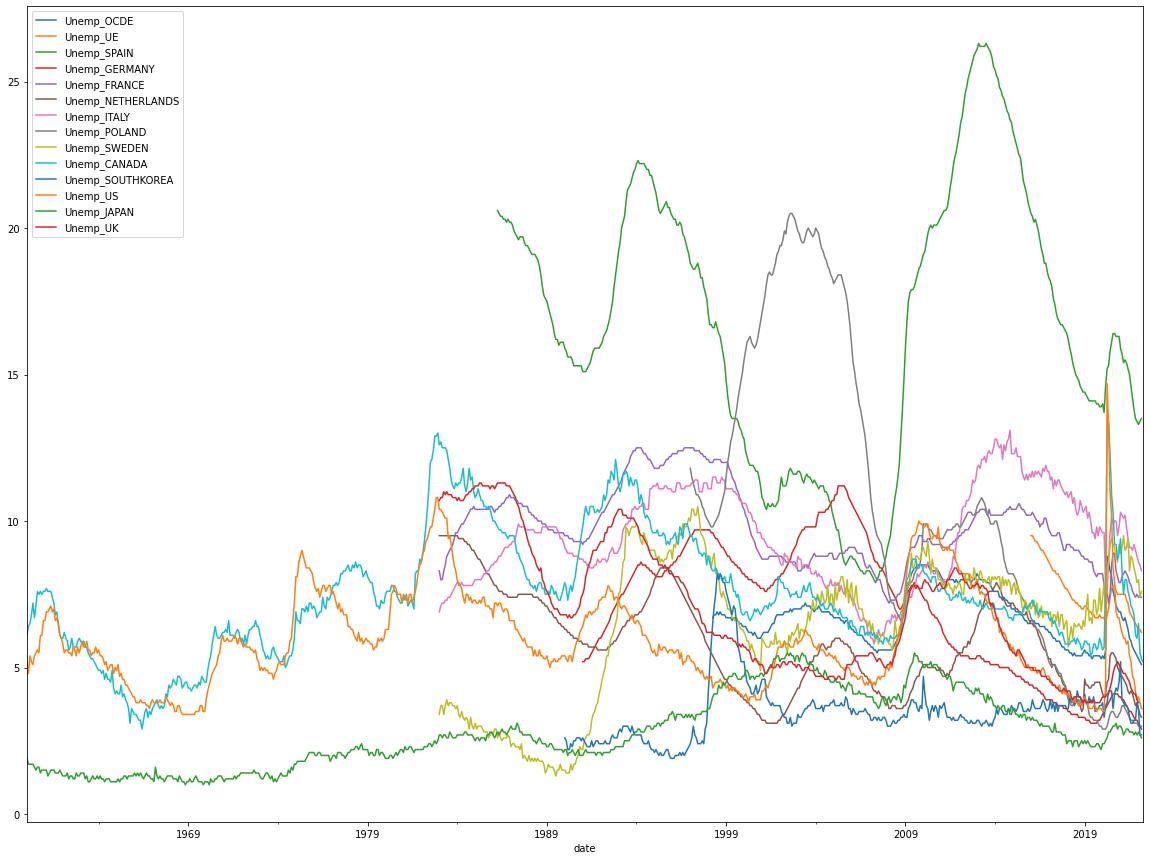

In [34]:
exploracioncsv(df9)

Observaciones del análisis previo:

- Existen bastantes diferencias de valores nulos entre las diferentes columnas, se deberá estudiar este fenómeno en detalle.
- Los valores máximos y mínimos tienen sentido.

#### Exploración en detalle

In [35]:
df9

Unemp_OCDE  Unemp_UE  Unemp_SPAIN  Unemp_GERMANY  Unemp_FRANCE  \
date                                                                         
1960-01-31         NaN       NaN          NaN            NaN           NaN   
1960-02-29         NaN       NaN          NaN            NaN           NaN   
1960-03-31         NaN       NaN          NaN            NaN           NaN   
1960-04-30         NaN       NaN          NaN            NaN           NaN   
1960-05-31         NaN       NaN          NaN            NaN           NaN   
...                ...       ...          ...            ...           ...   
2021-12-31         5.4       6.4         13.4            3.2           7.5   
2022-01-31         5.3       6.3         13.3            3.1           7.4   
2022-02-28         5.2       6.3         13.4            3.0           7.4   
2022-03-31         5.1       6.2         13.5            2.9           7.4   
2022-04-30         NaN       NaN          NaN            NaN           NaN   

            Unemp_NETHERLANDS  Unemp_ITALY  Unemp_POLAND  Unemp_SWEDEN  \
date                                                                     
1960-01-31                NaN          NaN           NaN           NaN   
1960-02-29                NaN          NaN           NaN           NaN   
1960-03-31                NaN          NaN           NaN           NaN   
1960-04-30                NaN          NaN           NaN           NaN   
1960-05-31                NaN          NaN           NaN           NaN   
...                       ...          ...           ...           ...   
2021-12-31                3.8          8.8           3.1           7.9   
2022-01-31                3.6          8.6           3.0           8.0   
2022-02-28                3.4          8.5           3.0           7.4   
2022-03-31                3.3          8.3           3.0           7.6   
2022-04-30                NaN          NaN           NaN           NaN   

            Unemp_CANADA  Unemp_SOUTHKOREA  Unemp_US  Unemp_JAPAN  Unemp_UK  \
date                                                                          
1960-01-31           6.1               NaN       5.2          1.9       NaN   
1960-02-29           6.4               NaN       4.8          1.7       NaN   
1960-03-31           6.5               NaN       5.4          1.7       NaN   
1960-04-30           6.8               NaN       5.2          1.7       NaN   
1960-05-31           7.2               NaN       5.1          1.7       NaN   
...                  ...               ...       ...          ...       ...   
2021-12-31           6.0               3.8       3.9          2.7       3.9   
2022-01-31           6.5               3.6       4.0          2.8       3.8   
2022-02-28           5.5               2.7       3.8          2.7       NaN   
2022-03-31           5.3               2.7       3.6          2.6       NaN   
2022-04-30           5.2               NaN       3.6          NaN       NaN   

            day  month  year  
date                          
1960-01-31   31      1  1960  
1960-02-29   29      2  1960  
1960-03-31   31      3  1960  
1960-04-30   30      4  1960  
1960-05-31   31      5  1960  
...         ...    ...   ...  
2021-12-31   31     12  2021  
2022-01-31   31      1  2022  
2022-02-28   28      2  2022  
2022-03-31   31      3  2022  
2022-04-30   30      4  2022  

[748 rows x 17 columns]

Heatmap de los datos para observar donde se producen los valores nulos


---------- 
Heatmap del dataset



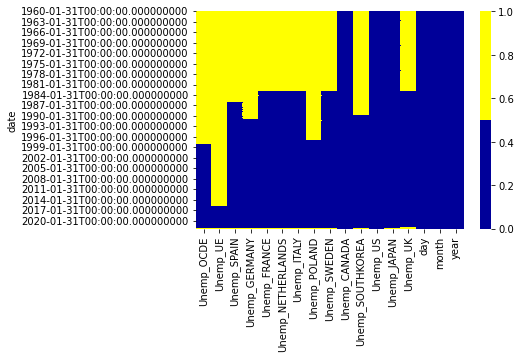

In [36]:
#Se definen los colores
colours = ['#000099', '#ffff00'] # Amarillo -> Valor nulo; Azul -> Valor no nulo

# Nombres de las columnas
df9_columns = df9.columns[:]

print('\n---------- \nHeatmap del dataset\n')
sns.heatmap(df9[df9_columns].isna(), cmap=sns.color_palette(colours))

Se han explorado también los datos con el heatmap de Seaborn, observando donde se encuentran los valores nulos, estando estos en el inicio (fechas previa a la adquisición de datos) o en el final (sin datos aún). Por tanto, no será necesario el eliminar los datos nulos.

#### Preparación del dataset

Se van a rellenar/eliminar los valores nulos del dataset.

## YFinance

Se calcula el número de días, meses y años de diferencia entre las fechas inicial y final

In [37]:
#Se obtienen los días y meses de diferencia entre las fechas inicial y final
#FECHAS DEFINIDAS EN LA CARGA DE DATOS DESDE YFINANCE

## dias
diferencia = datetime.strptime(end_date, "%Y-%m-%d") - datetime.strptime(init_date, "%Y-%m-%d")
dias_dif = diferencia.days

## meses
delta = relativedelta.relativedelta((datetime.strptime(end_date, "%Y-%m-%d")), (datetime.strptime(init_date, "%Y-%m-%d")))
meses_dif = delta.months + (delta.years * 12)

print(f'> Entre las fechas inicial y final hay {dias_dif} ({meses_dif} meses)días de diferencia')

> Entre las fechas inicial y final hay 731 (24 meses)días de diferencia


Se define la función para analizar estos datasets de forma rápida:

In [38]:
def exploracionyf(df):
  #Se recopila información del df
  f_size=(20,6)
  date_format='%d/%m/%y'
  dname=df.columns.values[0]
  filas, columnas = df.shape
  n_columnas = df.columns.values
  n_indice = df.index.name
  t_indice = type(df.index)
  duplicados = df.duplicated().sum()
  prim_fecha = df.index.min().strftime(date_format)
  ult_fecha = df.index.max().strftime(date_format)
  lista_meses = df.index.month.unique().sort_values(ascending=True).to_list()
  sum_meses = len(lista_meses)
  lista_dias = df.index.day.unique().sort_values(ascending=True).to_list()
  sum_dias = len(lista_dias)

  #Se obtienen los días y meses de diferencia entre las fechas inicial y final
  ## dias
  diferencia = datetime.strptime(ult_fecha, date_format) - datetime.strptime(prim_fecha, date_format)
  dias_dif = diferencia.days

  #Se muestran los resultados del analisis exploratorio del CSV
  print('========================================================')
  print(f'>>> DATASET {dname}\n')

  #Descripción general
  print(f'>> DATOS GENERALES\n')
  print(f'> El dataset tiene {filas} filas y {columnas} columnas')
  print(f'> Las columnas son las siguientes: {n_columnas}')
  print('> Lista de columnas y sus tipos de datos\n')
  print(df.dtypes)
  print(f'\n> Su índice se llama "{n_indice}" y es del tipo "{t_indice}"')
  print('\n> Vista de los 5 primeros valores')
  print(df.head(5))
  print('\n> Vista de los 5 últimos valores')
  print(df.tail(5))
  print('\n> Descripción general de sus valores')
  print(df.describe())

  # Valores nulos
  print(f'\n>> ANALISIS DE VALORES NULOS')
  print('\n> Cantidad de valores nulos\n')
  print(df.isna().sum().sort_values(ascending=False))
  print('\n> % de valores nulos sobre el total\n')
  print(df.isna().mean().sort_values(ascending=False)*100)

  # Valores duplicados
  print(f'\n>> ANALISIS DE VALORES DUPLICADOS')
  print(f'\n> Cantidad de valores duplicados: {duplicados}\n')
  if duplicados != 0:
    print('\n Lista de los valores duplicados:\n')
    print(df[df.duplicated(keep=False)])

  # Analisis fechas
  print(f'\n>> Análisis de las fechas del dataset')
  print(f'\n> Primera fecha: {prim_fecha}')
  print(f'\n> Ultima fecha: {ult_fecha}')
  if filas < dias_dif:
    res_dias = ' registros, por tanto faltan ' + str(abs(filas-dias_dif))+' registros posibles'
  elif filas > dias_dif:
    res_dias = ' registros, por tanto sobran ' + str(abs(filas-dias_dif))+' registros posibles'
  else:
    res_dias = ' registros, todos los posibles'  
  print(f'\n> Dias entre las fechas inicial y final: {abs(dias_dif)} y hay {filas}' + res_dias)
  print(f'\n> Los meses listados son: {lista_meses} ({sum_meses} de 12 posibles)')
  print(f'\n> Los dias listados son: {lista_dias} ({sum_dias} de 31 posibles)')

  print(f'\n> Heatmap para la observación de valores nulos:')
  ##Gráfica de Heatmap
  ###Se definen los colores
  colours = ['#000099', '#ffff00'] # Amarillo -> Valor nulo; Azul -> Valor no nulo

  ### Nombres de las columnas
  df_c = df.columns[:]

  sns.heatmap(df[df_c].isna(), cmap=sns.color_palette(colours))

  print('\n---------- \nGráfica de los datos:\n')
  df.iloc[:, 3:4].plot(figsize=f_size, title='Valores de cierre del IBEX35', ylabel='Puntos', xlabel='Fecha')

  print('\n-- Fin del análisis general --')
  print('========================================================\n\n')

### df_sp500: SP500

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 505 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
               Open     High      Low    Close      Volume  Dividends  \
date                                                                    
2020-01-02  3244.67  3258.14  3235.53  3257.85  3458250000          0   
2020-01-03  3226.36  3246.15  3222.34  3234.85  3461290000          0   
2020-01-06  3217.55  3246.84  3214.64  3246.28  3674070000          0   
2

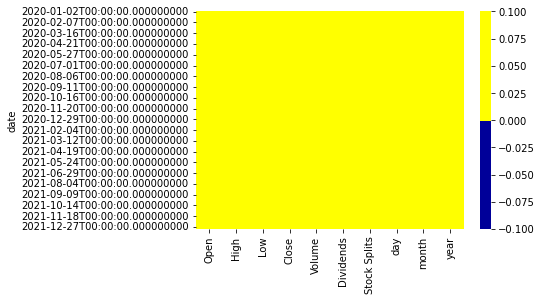

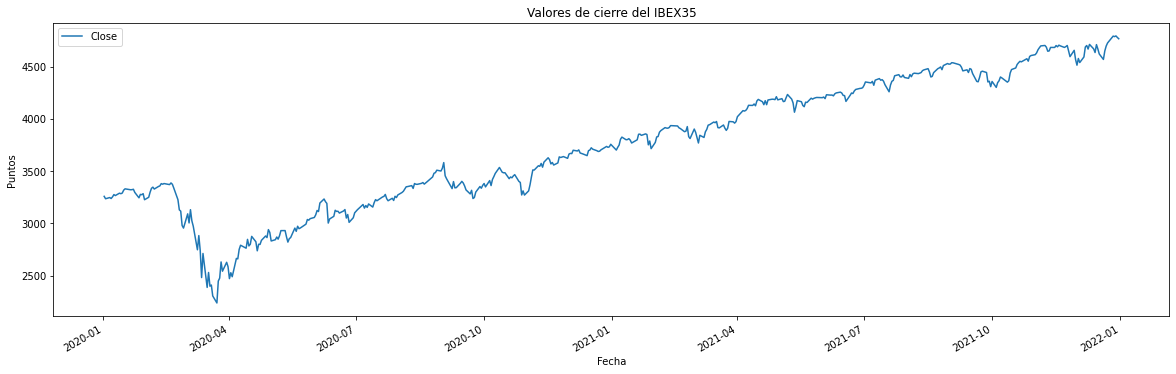

In [39]:
exploracionyf(df_sp500)

Observaciones:
- No hay valores nulos en el intervalo indicado
- Se tienen valores diarios
- Tendencia alcista

### df_nasdaq: NASDAQ

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 505 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
               Open     High      Low    Close      Volume  Dividends  \
date                                                                    
2020-01-02  9039.46  9093.43  9010.89  9092.19  2848370000          0   
2020-01-03  8976.43  9065.76  8976.43  9020.77  2567400000          0   
2020-01-06  8943.50  9072.41  8943.50  9071.47  2788120000          0   
2

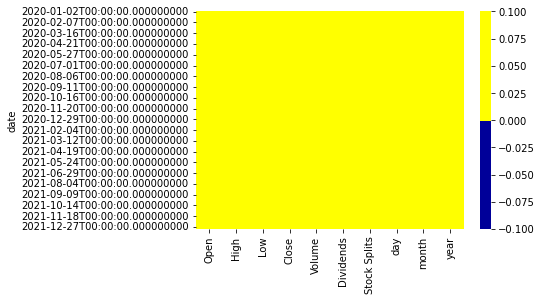

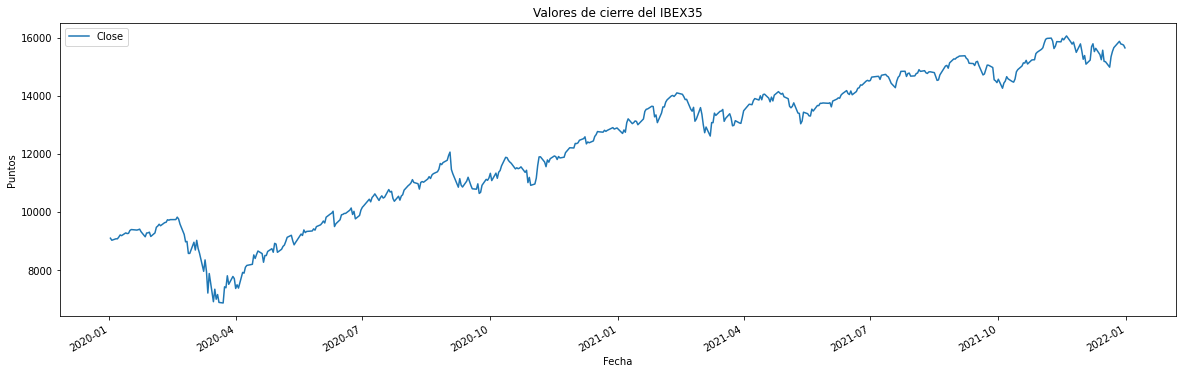

In [40]:
exploracionyf(df_nasdaq)

Observaciones:
- No hay valores nulos en el intervalo indicado
- Se tienen valores diarios
- Tendencia alcista

### df_eurusd: EURO VS DOLAR

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 523 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
              Open    High     Low   Close  Volume  Dividends  Stock Splits  \
date                                                                          
2020-01-01  1.1221  1.1228  1.1159  1.1221       0          0             0   
2020-01-02  1.1219  1.1227  1.1167  1.1221       0          0             0   
2020-01-03  1.1171  1.1181  1.1126  1.1171       0

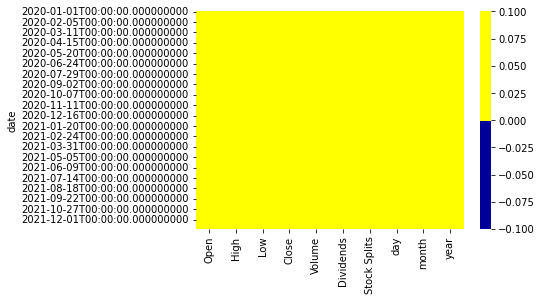

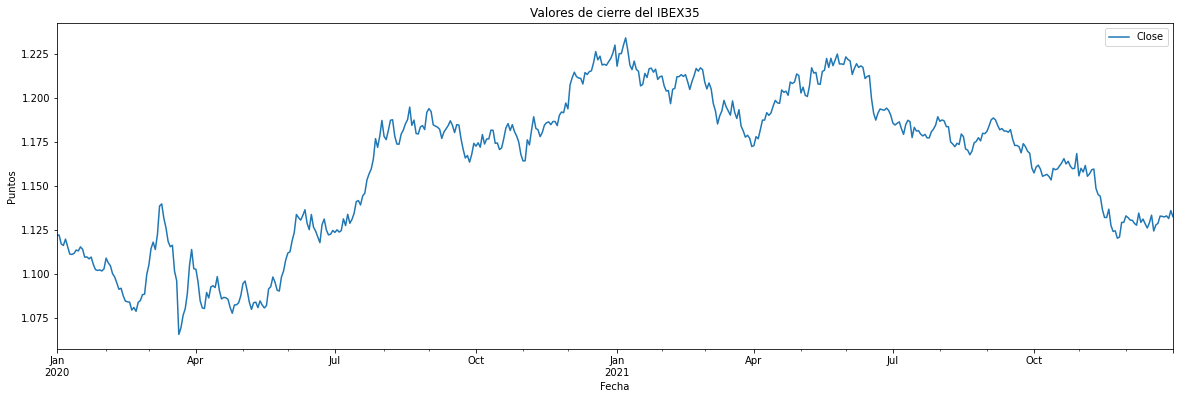

In [41]:
exploracionyf(df_eurusd)

Observaciones:
- No hay valores nulos en el intervalo indicado
- Se tienen valores diarios
- Fuerte descenso aunque mantiene estabilidad en los últimos valores

### df_gbpusd: LIBRA VS DOLAR

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 523 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
              Open    High     Low   Close  Volume  Dividends  Stock Splits  \
date                                                                          
2020-01-01  1.3254  1.3271  1.3219  1.3263       0          0             0   
2020-01-02  1.3250  1.3268  1.3125  1.3250       0          0             0   
2020-01-03  1.3144  1.3161  1.3055  1.3153       0

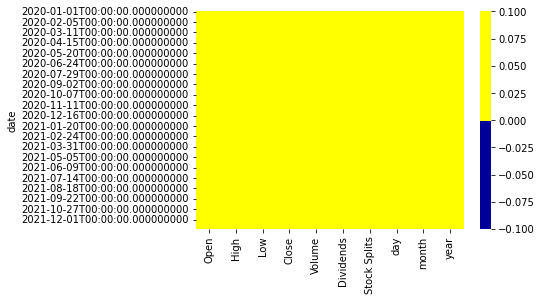

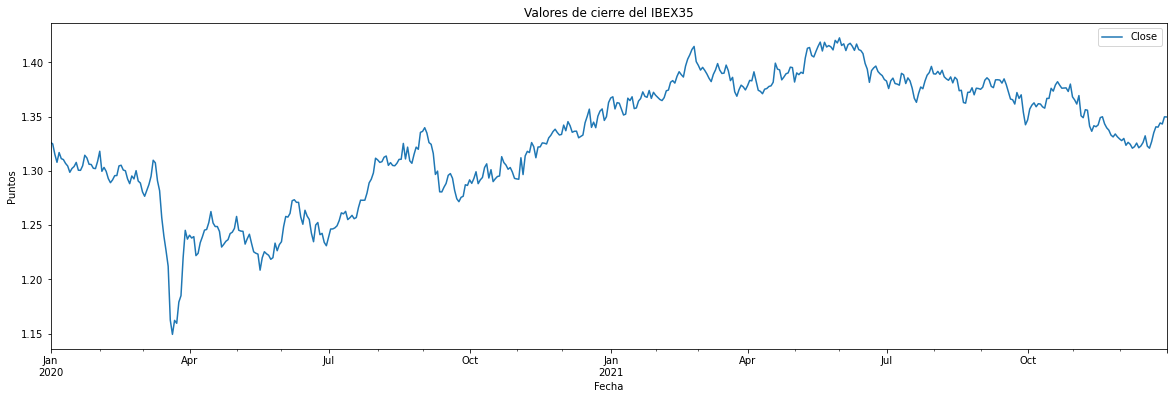

In [42]:
exploracionyf(df_gbpusd)

Observaciones:
- No hay valores nulos en el intervalo indicado
- Se tienen valores diarios
- Tendencia bajista aunque con algo de remonte en el último periodo

### df_brent: BARRIL DE BRENT

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 503 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
             Open   High    Low  Close  Volume  Dividends  Stock Splits  day  \
date                                                                           
2020-01-02  66.47  66.57  65.73  66.25   25810          0             0    2   
2020-01-03  66.29  69.48  66.22  68.60   78848          0             0    3   
2020-01-06  69.07  70.72  68.19  68.91   51933

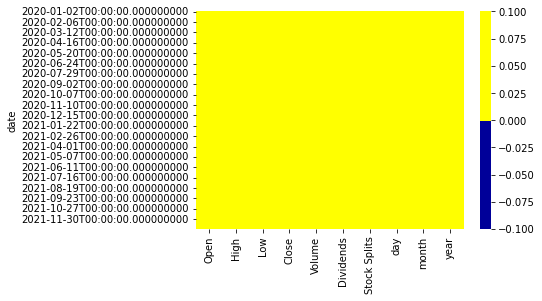

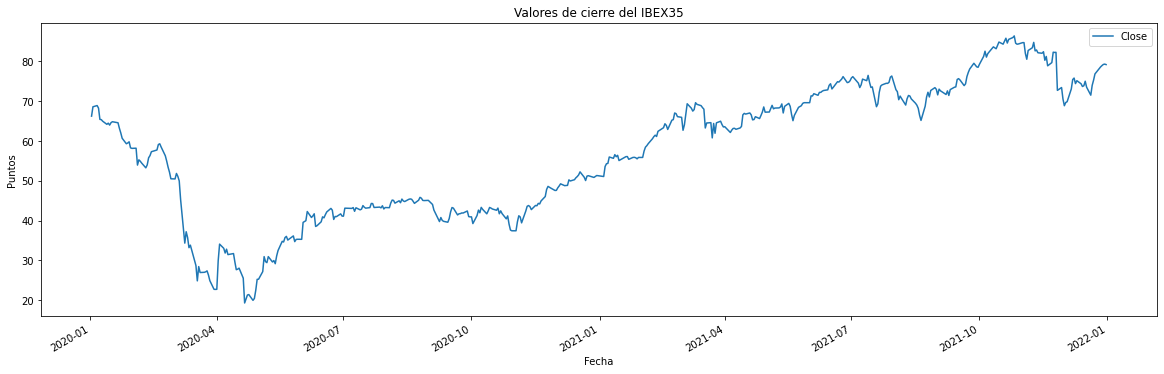

In [43]:
exploracionyf(df_brent)

Observaciones:
- No hay valores nulos en el intervalo indicado
- Se tienen valores diarios
- Tendencia alcista

###df_gold: ORO

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 506 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
              Open    High     Low   Close  Volume  Dividends  Stock Splits  \
date                                                                          
2020-01-02  1518.1  1528.7  1518.0  1524.5     214          0             0   
2020-01-03  1530.1  1552.7  1530.1  1549.2     107          0             0   
2020-01-06  1580.0  1580.0  1560.4  1566.2     416

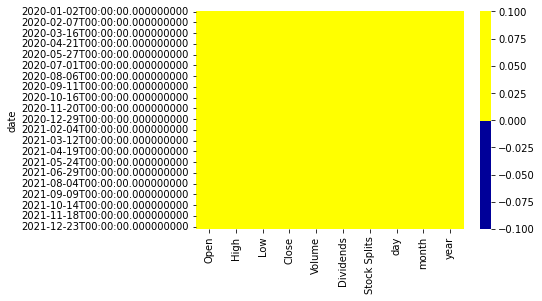

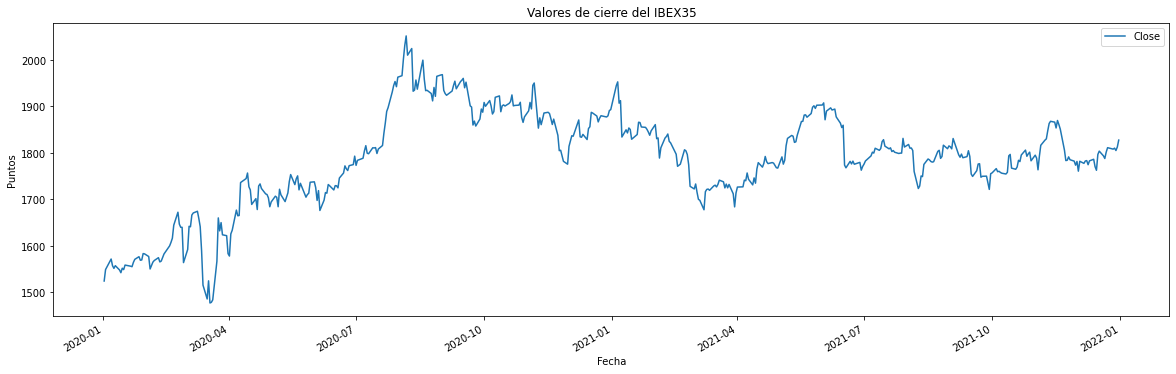

In [44]:
exploracionyf(df_gold)

Observaciones:
- No hay valores nulos en el intervalo indicado
- Se tienen valores diarios
- Tendencia estabilizada

### df_silver: PLATA

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 505 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
              Open    High     Low   Close  Volume  Dividends  Stock Splits  \
date                                                                          
2020-01-02  17.966  17.990  17.966  17.966       2          0             0   
2020-01-03  18.110  18.110  17.965  18.068      83          0             0   
2020-01-06  18.025  18.105  18.025  18.097       3

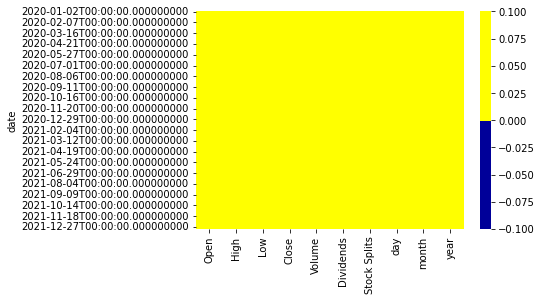

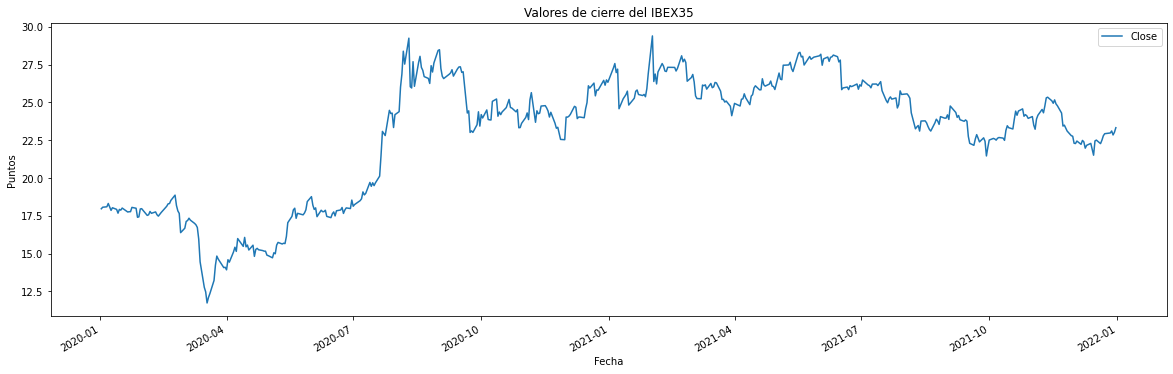

In [45]:
exploracionyf(df_silver)

Observaciones:
- No hay valores nulos en el intervalo indicado
- Se tienen valores diarios
- Tendencia estabilizada (muy similiar a la del oro)

### df_ibex: IBEX35

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 513 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
              Open    High     Low   Close     Volume  Dividends  \
date                                                               
2020-01-02  9639.1  9705.4  9615.1  9691.2  142379600          0   
2020-01-03  9631.2  9650.7  9581.2  9646.6  135130000          0   
2020-01-06  9585.4  9618.2  9492.7  9600.9  103520400          0   
2020-01-07  9623.1  9657.9

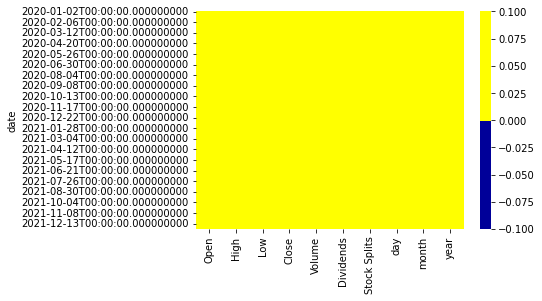

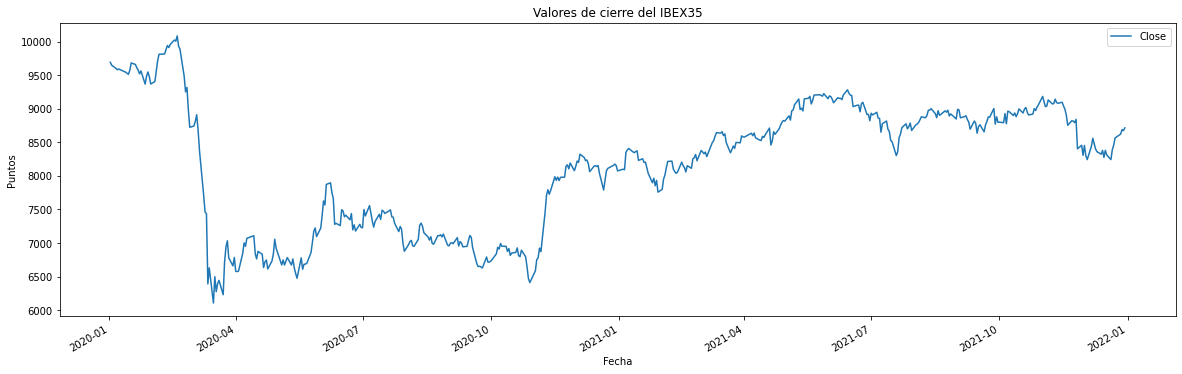

In [46]:
exploracionyf(df_ibex)

Observaciones:
- No hay valores nulos en el intervalo indicado
- Se tienen valores diarios
- Fuerte caida en el 2020 con recuperación posterior estabilizada

### df_ibex: NIKKEI

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 487 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
                Open      High       Low     Close    Volume  Dividends  \
date                                                                      
2020-01-06  23319.76  23365.36  23148.53  23204.86  72800000          0   
2020-01-07  23320.12  23577.44  23299.92  23575.72  64300000          0   
2020-01-08  23217.49  23303.21  22951.18  23204.76  79400000      

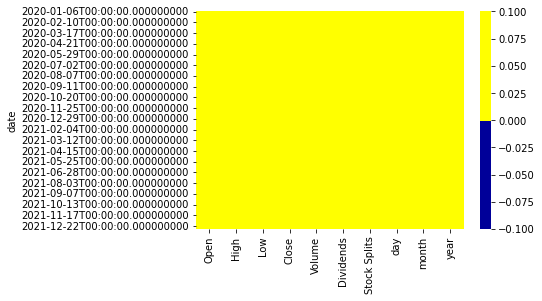

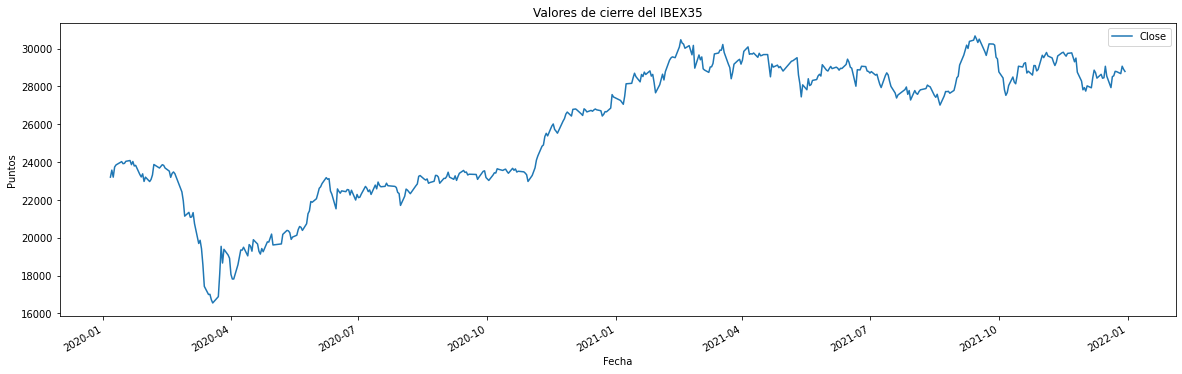

In [47]:
exploracionyf(df_nikkei)

### df_ibex: DAX

>>> DATASET Open

>> DATOS GENERALES

> El dataset tiene 509 filas y 10 columnas
> Las columnas son las siguientes: ['Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits' 'day'
 'month' 'year']
> Lista de columnas y sus tipos de datos

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
day               int64
month             int64
year              int64
dtype: object

> Su índice se llama "date" y es del tipo "<class 'pandas.core.indexes.datetimes.DatetimeIndex'>"

> Vista de los 5 primeros valores
                Open      High       Low     Close    Volume  Dividends  \
date                                                                      
2020-01-02  13233.71  13425.03  13225.16  13385.93  75341400          0   
2020-01-03  13266.39  13282.74  13120.72  13219.14  80793400          0   
2020-01-06  13085.49  13143.11  12948.17  13126.99  71778600      

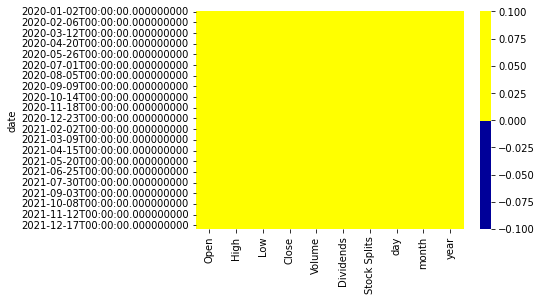

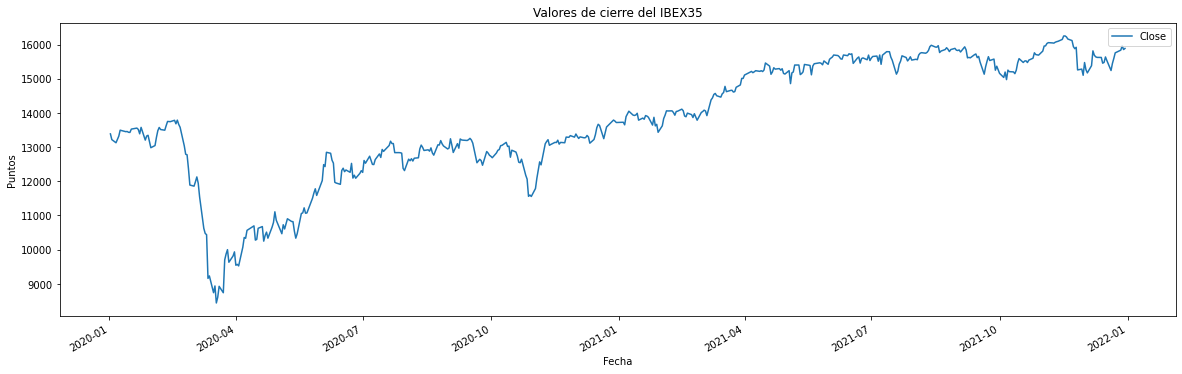

In [48]:
exploracionyf(df_dax)

# Visualizacion de datos

En esta apartado se van a realizar diferentes tipos de gráficas para observar la evolución de los datos seleccionados

### Datos macroeconómicos

Se van a unir en un dataset los datos macroeconómicos de todos los datasets excepto del df1 (euro vs dolar) ya que se puede disponer de este a través de Yahoo Finance

In [49]:
#Se unen los dataset mediante merge.

try:
  del macro1
except:
  pass
macro1 = pd.merge(df2, df3, how="right", on=['year','month']).set_axis(df3.index)
macro1 = pd.merge(macro1, df4, how="left", on=['year','month']).set_axis(macro1.index)
macro1 = pd.merge(macro1, df5, how="left", on=['year','month']).set_axis(macro1.index)
macro1 = pd.merge(macro1, df6, how="left", on=['year','month']).set_axis(macro1.index)
macro1 = pd.merge(macro1, df7, how="left", on=['year','month']).set_axis(macro1.index)
macro1 = pd.merge(macro1, df8, how="left", on=['year','month']).set_axis(macro1.index)
macro1 = pd.merge(macro1, df9, how="left", on=['year','month']).set_axis(macro1.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'day_x'} in the result is deprecated and will raise a MergeError in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'day_x'} in the result is deprecated and will raise a MergeError in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'day_x'} in the result is deprecated and will raise a MergeError in a future version.
  del sys.path[0]


Se observa como queda el conjunto de datos

In [50]:
macro1

GovDebt%  day_x  month  year  InflationRate  day_y  InterestRates  \
date                                                                            
1999-01-31       NaN    NaN      1  1999            0.8     31            NaN   
1999-02-28       NaN    NaN      2  1999            0.7     28            NaN   
1999-03-31       NaN    NaN      3  1999            0.9     31            NaN   
1999-04-30       NaN    NaN      4  1999            1.1     30            NaN   
1999-05-31       NaN    NaN      5  1999            0.9     31            NaN   
...              ...    ...    ...   ...            ...    ...            ...   
2022-03-31     95.59   31.0      3  2022            7.4     31           0.00   
2022-04-30       NaN    NaN      4  2022            7.4     30           0.01   
2022-05-31       NaN    NaN      5  2022            8.1     31           0.01   
2022-06-30       NaN    NaN      6  2022            8.6     30           0.05   
2022-07-31       NaN    NaN      7  2022            8.9     31            NaN   

            day_x  unemploy%  day_y  ...  Unemp_NETHERLANDS  Unemp_ITALY  \
date                                 ...                                   
1999-01-31    NaN      10.08   31.0  ...                4.6         11.1   
1999-02-28    NaN      10.00   28.0  ...                4.5         11.1   
1999-03-31    NaN       9.95   31.0  ...                4.4         11.1   
1999-04-30    NaN       9.93   30.0  ...                4.4         11.1   
1999-05-31    NaN       9.88   31.0  ...                4.3         11.1   
...           ...        ...    ...  ...                ...          ...   
2022-03-31   31.0       6.74   31.0  ...                3.3          8.3   
2022-04-30   30.0       6.63   30.0  ...                NaN          NaN   
2022-05-31   31.0       6.58   31.0  ...                NaN          NaN   
2022-06-30   30.0       6.59   30.0  ...                NaN          NaN   
2022-07-31    NaN        NaN    NaN  ...                NaN          NaN   

            Unemp_POLAND  Unemp_SWEDEN  Unemp_CANADA  Unemp_SOUTHKOREA  \
date                                                                     
1999-01-31          11.5           7.3           7.9               7.6   
1999-02-28          12.0           7.0           7.9               7.4   
1999-03-31          12.3           7.0           7.9               7.2   
1999-04-30          12.7           6.9           8.2               7.0   
1999-05-31          12.9           6.7           7.9               6.8   
...                  ...           ...           ...               ...   
2022-03-31           3.0           7.6           5.3               2.7   
2022-04-30           NaN           NaN           5.2               NaN   
2022-05-31           NaN           NaN           NaN               NaN   
2022-06-30           NaN           NaN           NaN               NaN   
2022-07-31           NaN           NaN           NaN               NaN   

            Unemp_US  Unemp_JAPAN  Unemp_UK  day_y  
date                                                
1999-01-31       4.3          4.5       6.1   31.0  
1999-02-28       4.4          4.6       6.0   28.0  
1999-03-31       4.2          4.7       6.0   31.0  
1999-04-30       4.3          4.7       6.0   30.0  
1999-05-31       4.2          4.7       6.0   31.0  
...              ...          ...       ...    ...  
2022-03-31       3.6          2.6       NaN   31.0  
2022-04-30       3.6          NaN       NaN   30.0  
2022-05-31       NaN          NaN       NaN    NaN  
2022-06-30       NaN          NaN       NaN    NaN  
2022-07-31       NaN          NaN       NaN    NaN  

[283 rows x 36 columns]

Se observa como quedan los valores nulos

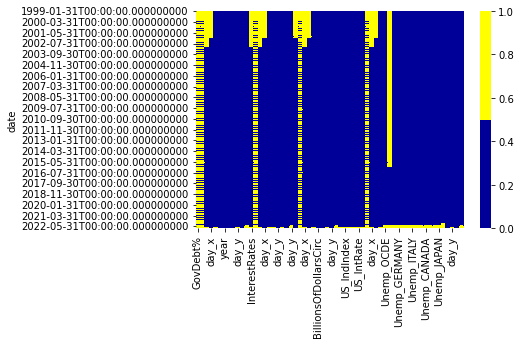

In [51]:
sns.heatmap(macro1[macro1.columns[:]].isna(), cmap=sns.color_palette(colours));

Se van a eliminar los datos que no aporten información al conjunto de datos

In [52]:
m1_col=macro1.columns.to_list()
m1_col

['GovDebt%',
 'day_x',
 'month',
 'year',
 'InflationRate',
 'day_y',
 'InterestRates',
 'day_x',
 'unemploy%',
 'day_y',
 'ThousandsOfEurosInCirculation',
 'day_x',
 'BillionsOfDollarsCirc',
 'day_y',
 'UE_IPC',
 'US_IndIndex',
 'US_Unempl',
 'US_IPC',
 'US_IntRate',
 'US_SP500_AccumRent',
 'day_x',
 'Unemp_OCDE',
 'Unemp_UE',
 'Unemp_SPAIN',
 'Unemp_GERMANY',
 'Unemp_FRANCE',
 'Unemp_NETHERLANDS',
 'Unemp_ITALY',
 'Unemp_POLAND',
 'Unemp_SWEDEN',
 'Unemp_CANADA',
 'Unemp_SOUTHKOREA',
 'Unemp_US',
 'Unemp_JAPAN',
 'Unemp_UK',
 'day_y']

In [53]:
m1_drop=['day_x','day_y']
m1=macro1.drop(m1_drop, axis=1)
m1

GovDebt%  month  year  InflationRate  InterestRates  unemploy%  \
date                                                                         
1999-01-31       NaN      1  1999            0.8            NaN      10.08   
1999-02-28       NaN      2  1999            0.7            NaN      10.00   
1999-03-31       NaN      3  1999            0.9            NaN       9.95   
1999-04-30       NaN      4  1999            1.1            NaN       9.93   
1999-05-31       NaN      5  1999            0.9            NaN       9.88   
...              ...    ...   ...            ...            ...        ...   
2022-03-31     95.59      3  2022            7.4           0.00       6.74   
2022-04-30       NaN      4  2022            7.4           0.01       6.63   
2022-05-31       NaN      5  2022            8.1           0.01       6.58   
2022-06-30       NaN      6  2022            8.6           0.05       6.59   
2022-07-31       NaN      7  2022            8.9            NaN        NaN   

            ThousandsOfEurosInCirculation  BillionsOfDollarsCirc  UE_IPC  \
date                                                                       
1999-01-31                            NaN                511.037     3.0   
1999-02-28                            NaN                509.743     2.6   
1999-03-31                            NaN                514.410     2.7   
1999-04-30                            NaN                519.339     2.8   
1999-05-31                            NaN                522.494     2.7   
...                                   ...                    ...     ...   
2022-03-31                   1.574378e+09               2257.617     7.8   
2022-04-30                   1.587432e+09               2269.800     8.1   
2022-05-31                   1.593958e+09               2272.273     8.8   
2022-06-30                   1.602610e+09               2278.162     9.6   
2022-07-31                   1.600825e+09               2279.172     NaN   

            US_IndIndex  ...  Unemp_FRANCE  Unemp_NETHERLANDS  Unemp_ITALY  \
date                     ...                                                 
1999-01-31          3.5  ...          12.0                4.6         11.1   
1999-02-28          3.9  ...          12.0                4.5         11.1   
1999-03-31          4.0  ...          11.8                4.4         11.1   
1999-04-30          3.8  ...          11.7                4.4         11.1   
1999-05-31          4.0  ...          11.5                4.3         11.1   
...                 ...  ...           ...                ...          ...   
2022-03-31          4.9  ...           7.4                3.3          8.3   
2022-04-30          5.6  ...           NaN                NaN          NaN   
2022-05-31          4.8  ...           NaN                NaN          NaN   
2022-06-30          4.2  ...           NaN                NaN          NaN   
2022-07-31          NaN  ...           NaN                NaN          NaN   

            Unemp_POLAND  Unemp_SWEDEN  Unemp_CANADA  Unemp_SOUTHKOREA  \
date                                                                     
1999-01-31          11.5           7.3           7.9               7.6   
1999-02-28          12.0           7.0           7.9               7.4   
1999-03-31          12.3           7.0           7.9               7.2   
1999-04-30          12.7           6.9           8.2               7.0   
1999-05-31          12.9           6.7           7.9               6.8   
...                  ...           ...           ...               ...   
2022-03-31           3.0           7.6           5.3               2.7   
2022-04-30           NaN           NaN           5.2               NaN   
2022-05-31           NaN           NaN           NaN               NaN   
2022-06-30           NaN           NaN           NaN               NaN   
2022-07-31           NaN           NaN           NaN               NaN   

            Unemp_US  Unemp_JA

Se van a rellenar los valores que no tengan datos con los valores anteriores (ffill)

In [54]:
m1=m1.fillna(method='ffill')
m1

GovDebt%  month  year  InflationRate  InterestRates  unemploy%  \
date                                                                         
1999-01-31       NaN      1  1999            0.8            NaN      10.08   
1999-02-28       NaN      2  1999            0.7            NaN      10.00   
1999-03-31       NaN      3  1999            0.9            NaN       9.95   
1999-04-30       NaN      4  1999            1.1            NaN       9.93   
1999-05-31       NaN      5  1999            0.9            NaN       9.88   
...              ...    ...   ...            ...            ...        ...   
2022-03-31     95.59      3  2022            7.4           0.00       6.74   
2022-04-30     95.59      4  2022            7.4           0.01       6.63   
2022-05-31     95.59      5  2022            8.1           0.01       6.58   
2022-06-30     95.59      6  2022            8.6           0.05       6.59   
2022-07-31     95.59      7  2022            8.9           0.05       6.59   

            ThousandsOfEurosInCirculation  BillionsOfDollarsCirc  UE_IPC  \
date                                                                       
1999-01-31                            NaN                511.037     3.0   
1999-02-28                            NaN                509.743     2.6   
1999-03-31                            NaN                514.410     2.7   
1999-04-30                            NaN                519.339     2.8   
1999-05-31                            NaN                522.494     2.7   
...                                   ...                    ...     ...   
2022-03-31                   1.574378e+09               2257.617     7.8   
2022-04-30                   1.587432e+09               2269.800     8.1   
2022-05-31                   1.593958e+09               2272.273     8.8   
2022-06-30                   1.602610e+09               2278.162     9.6   
2022-07-31                   1.600825e+09               2279.172     9.6   

            US_IndIndex  ...  Unemp_FRANCE  Unemp_NETHERLANDS  Unemp_ITALY  \
date                     ...                                                 
1999-01-31          3.5  ...          12.0                4.6         11.1   
1999-02-28          3.9  ...          12.0                4.5         11.1   
1999-03-31          4.0  ...          11.8                4.4         11.1   
1999-04-30          3.8  ...          11.7                4.4         11.1   
1999-05-31          4.0  ...          11.5                4.3         11.1   
...                 ...  ...           ...                ...          ...   
2022-03-31          4.9  ...           7.4                3.3          8.3   
2022-04-30          5.6  ...           7.4                3.3          8.3   
2022-05-31          4.8  ...           7.4                3.3          8.3   
2022-06-30          4.2  ...           7.4                3.3          8.3   
2022-07-31          4.2  ...           7.4                3.3          8.3   

            Unemp_POLAND  Unemp_SWEDEN  Unemp_CANADA  Unemp_SOUTHKOREA  \
date                                                                     
1999-01-31          11.5           7.3           7.9               7.6   
1999-02-28          12.0           7.0           7.9               7.4   
1999-03-31          12.3           7.0           7.9               7.2   
1999-04-30          12.7           6.9           8.2               7.0   
1999-05-31          12.9           6.7           7.9               6.8   
...                  ...           ...           ...               ...   
2022-03-31           3.0           7.6           5.3               2.7   
2022-04-30           3.0           7.6           5.2               2.7   
2022-05-31           3.0           7.6           5.2               2.7   
2022-06-30           3.0           7.6           5.2               2.7   
2022-07-31           3.0           7.6           5.2               2.7   

            Unemp_US  Unemp_JA

Se comprueba de nuevo el estado del conjunto de datos macroeconómicos

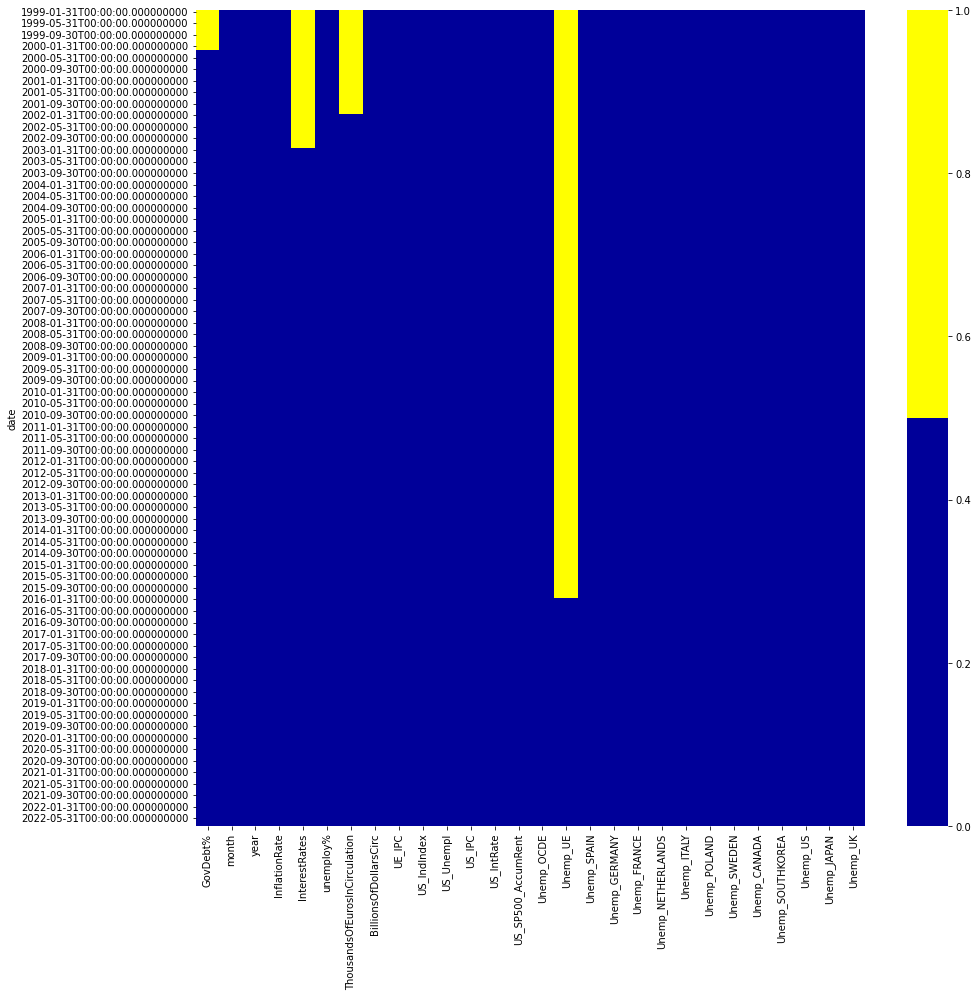

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(m1[m1.columns[:]].isna(), cmap=sns.color_palette(colours));

Se observa como ahora sí se dispone de un dataset limpio con valores mensuales. Sin embargo, se observa como se tiene duplicado el dato de desempleo en Europa, por tanto, se va a eliminar la columna "Unemp_UE" ya que está duplicada con la columna "unemploy%".

In [56]:
m1=m1.drop(['Unemp_UE', 'InflationRate', 'US_Unempl'], axis=1)
m1

GovDebt%  month  year  InterestRates  unemploy%  \
date                                                          
1999-01-31       NaN      1  1999            NaN      10.08   
1999-02-28       NaN      2  1999            NaN      10.00   
1999-03-31       NaN      3  1999            NaN       9.95   
1999-04-30       NaN      4  1999            NaN       9.93   
1999-05-31       NaN      5  1999            NaN       9.88   
...              ...    ...   ...            ...        ...   
2022-03-31     95.59      3  2022           0.00       6.74   
2022-04-30     95.59      4  2022           0.01       6.63   
2022-05-31     95.59      5  2022           0.01       6.58   
2022-06-30     95.59      6  2022           0.05       6.59   
2022-07-31     95.59      7  2022           0.05       6.59   

            ThousandsOfEurosInCirculation  BillionsOfDollarsCirc  UE_IPC  \
date                                                                       
1999-01-31                            NaN                511.037     3.0   
1999-02-28                            NaN                509.743     2.6   
1999-03-31                            NaN                514.410     2.7   
1999-04-30                            NaN                519.339     2.8   
1999-05-31                            NaN                522.494     2.7   
...                                   ...                    ...     ...   
2022-03-31                   1.574378e+09               2257.617     7.8   
2022-04-30                   1.587432e+09               2269.800     8.1   
2022-05-31                   1.593958e+09               2272.273     8.8   
2022-06-30                   1.602610e+09               2278.162     9.6   
2022-07-31                   1.600825e+09               2279.172     9.6   

            US_IndIndex  US_IPC  ...  Unemp_FRANCE  Unemp_NETHERLANDS  \
date                             ...                                    
1999-01-31          3.5     1.7  ...          12.0                4.6   
1999-02-28          3.9     1.6  ...          12.0                4.5   
1999-03-31          4.0     1.7  ...          11.8                4.4   
1999-04-30          3.8     2.3  ...          11.7                4.4   
1999-05-31          4.0     2.1  ...          11.5                4.3   
...                 ...     ...  ...           ...                ...   
2022-03-31          4.9     8.5  ...           7.4                3.3   
2022-04-30          5.6     8.3  ...           7.4                3.3   
2022-05-31          4.8     8.6  ...           7.4                3.3   
2022-06-30          4.2     9.1  ...           7.4                3.3   
2022-07-31          4.2     9.1  ...           7.4                3.3   

            Unemp_ITALY  Unemp_POLAND  Unemp_SWEDEN  Unemp_CANADA  \
date                                                                
1999-01-31         11.1          11.5           7.3           7.9   
1999-02-28         11.1          12.0           7.0           7.9   
1999-03-31         11.1          12.3           7.0           7.9   
1999-04-30         11.1          12.7           6.9           8.2   
1999-05-31         11.1          12.9           6.7           7.9   
...                 ...           ...           ...           ...   
2022-03-31          8.3           3.0           7.6           5.3   
2022-04-30          8.3           3.0           7.6           5.2   
2022-05-31          8.3           3.0           7.6           5.2   
2022-06-30          8.3           3.0           7.6           5.2   
2022-07-31          8.3           3.0           7.6           5.2   

            Unemp_SOUTHKOREA  Unemp_US  Unemp_JAPAN  Unemp_UK  
date                                                           
1999-01-31               7.6       4.3          4.5       6.1  
1999-02-28               7.4       4.4          4.6       6.0  
1999-03-31               7.2       4.2          4.7       6.0  
1999-04-30               7.0       

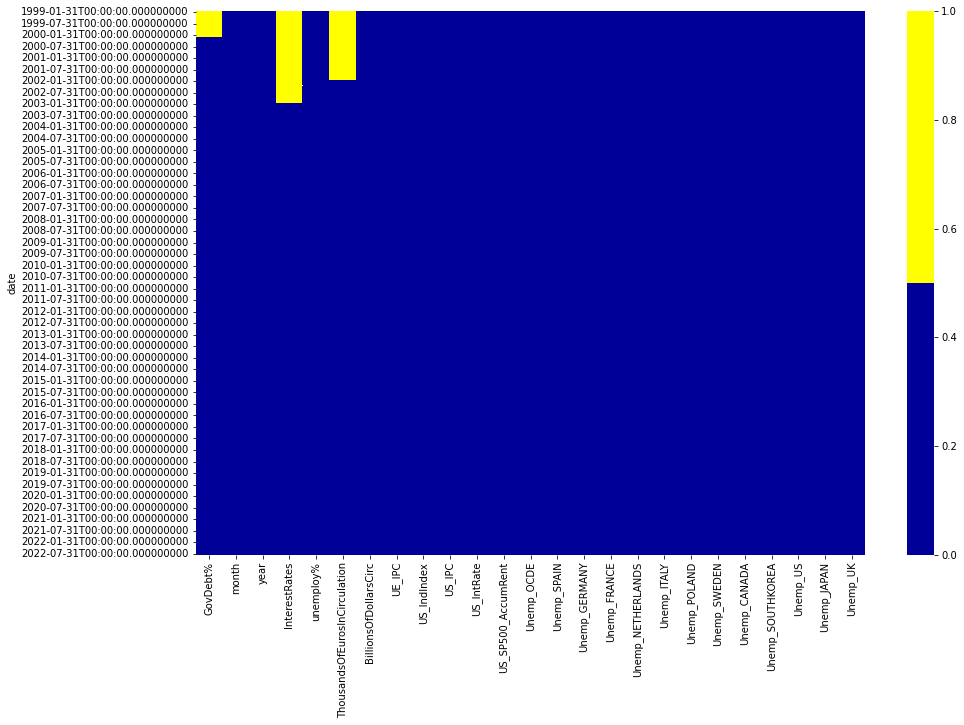

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(m1[m1.columns[:]].isna(), cmap=sns.color_palette(colours));

#### Correlación

Se analiza la correlación entre los distintos índices considerados

In [58]:
#Preparación para el ánalisis de correlación
m1_2=m1.drop(['year', 'month'], axis=1)

Text(0.5, 1.0, 'Correlaciones entre variables macroeconómicas (Fuente: BCE, INE, WB, FED)')

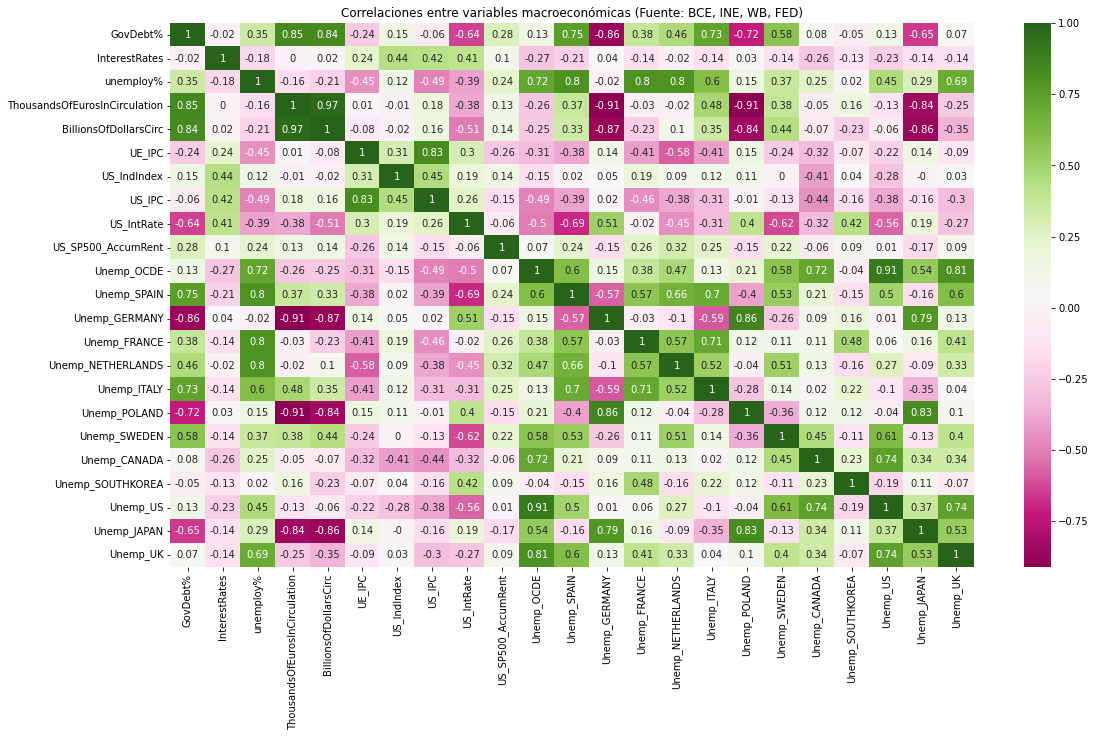

In [59]:
#Se calcula la matriz de correlación
correlations = round(m1_2.corr(),2)

#Se prepara el gráfico en Seaborn
plt.rcParams["figure.figsize"] = (18, 10)

m1_corr = sns.heatmap(correlations, cmap="PiYG", annot=True)
plt.title('Correlaciones entre variables macroeconómicas (Fuente: BCE, INE, WB, FED)')

Algunas observaciones obtenidas del estudio de correlaciones:
- Algunos países experimentan drásticas reducciones del desempleo con el aumento de la masa monetaria (Por ejemplo: Alemania y Polonia)
- De forma general, la relación entre el aumento del IPC y las tasas de intereses son inversamente proporcionales.
- El aumento de doláres y de euros tiene una correlación directa cercana a 1.
- En España, a mayor deuda de los países europeos mayor es el desempleo. Esto también sucede en resto de países excepto en Alemania y Polonia.
- Los tipos de interés y la deuda de los países están inversamente correlacionadas (a mayor es el tipo de interés menor es la deuda de los países europeos).
- Cuanto menor es el desempleo mayor es la inflación.
- El aumento de la deuda de los países europeos tiene una fuerte relación directa con el paro en España.


### Datos financieros

Se compararán los valores descargados desde YFinance

In [60]:
#Lista de tickers de interés
tickerlist=['^GSPC','^IXIC','EURUSD=X','GBPUSD=X','GC=F','SI=F','^IBEX', '^N225','^GDAXI']

#### Comparación de valores vs su valor inicial

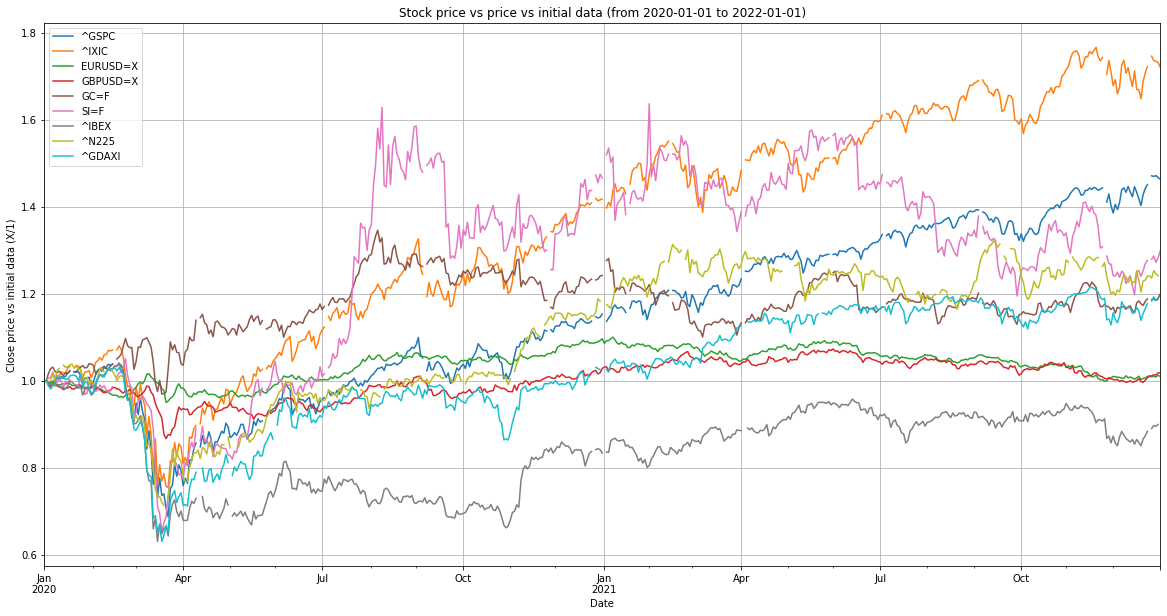

In [61]:
plot_multi_ticker(tickerlist=tickerlist, init_date=init_date, end_date=end_date)

#### Comparación de valores

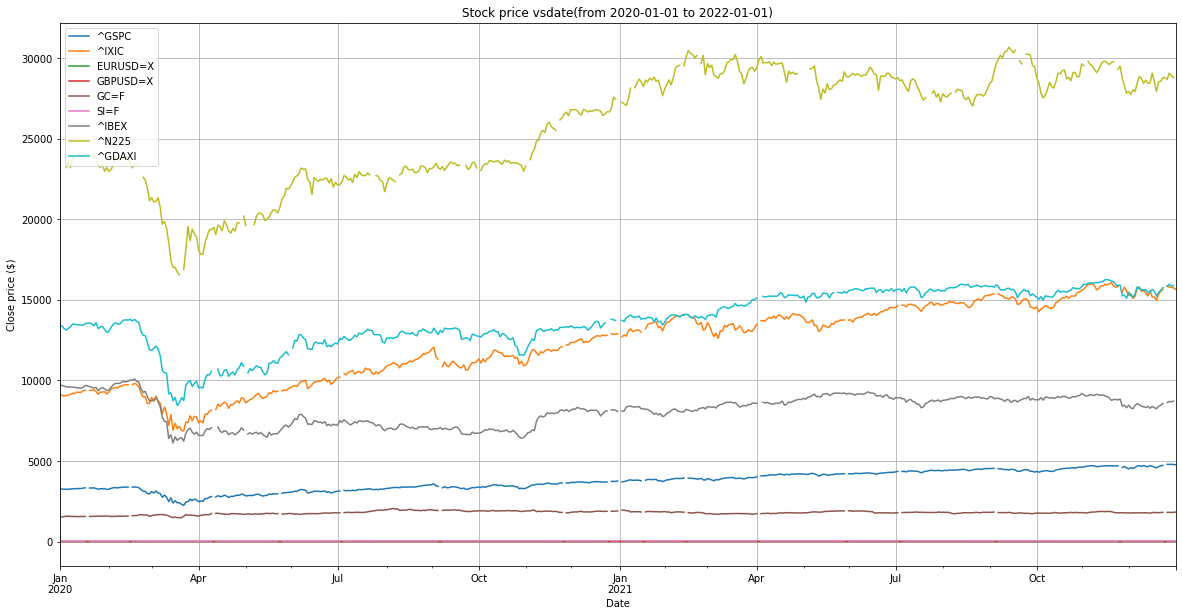

In [62]:
plot_multi_ticker(tickerlist=tickerlist, init_date=init_date, end_date=end_date, norm=False)

#### Un solo ticker a la vez

In [63]:
for ticker in tickerlist:
  plotly_yf(ticker, init_date=init_date, end_date=end_date, MA=14)

#### Correlación

Se analiza la correlación entre los distintos valores seleccionados

In [64]:
#Preparación para el ánalisis de correlación
dfyf_c=dfyf.Close

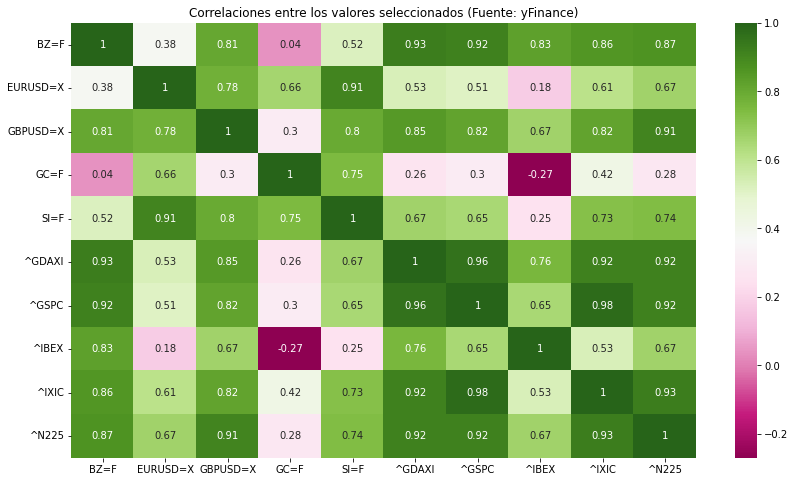

In [65]:
#Se calcula la matriz de correlación
correlations = round(dfyf_c.corr(),2)

#Se prepara el gráfico en Seaborn
plt.rcParams["figure.figsize"] = (14, 8)

m1_corr = sns.heatmap(correlations, cmap="PiYG", annot=True)
plt.title('Correlaciones entre los valores seleccionados (Fuente: yFinance)');

### Datos financieros y macroeconómicos

En este apartado se van a estudiar las correlaciones entre los datos de los diferentes productos seleccionados y las variables macroeconómicas consideradas

#### Preparación de los datos

Se realiza un merge entre los diferentes conjuntos de datos.

En el caso de los datos descargados de yFinance, se van a emplear los datos de cierre del mercado únicamente para el estudio de correlación.



In [66]:
#Se preparan los datos de yfinance

In [67]:
dfyfcl=dfyf.Close.copy()

dfyfcl.index.names=['date']
dfyfcl['month']=dfyfcl.index.month
dfyfcl['year']=dfyfcl.index.year

In [68]:
dfyfcl.columns

Index(['BZ=F', 'EURUSD=X', 'GBPUSD=X', 'GC=F', 'SI=F', '^GDAXI', '^GSPC',
       '^IBEX', '^IXIC', '^N225', 'month', 'year'],
      dtype='object')

In [69]:
dfyfcl

BZ=F  EURUSD=X  GBPUSD=X    GC=F    SI=F    ^GDAXI    ^GSPC  \
date                                                                       
2020-01-01    NaN    1.1221    1.3263     NaN     NaN       NaN      NaN   
2020-01-02  66.25    1.1221    1.3250  1524.5  17.966  13385.93  3257.85   
2020-01-03  68.60    1.1171    1.3153  1549.2  18.068  13219.14  3234.85   
2020-01-06  68.91    1.1162    1.3080  1566.2  18.097  13126.99  3246.28   
2020-01-07  68.27    1.1198    1.3170  1571.8  18.316  13226.83  3237.18   
...           ...       ...       ...     ...     ...       ...      ...   
2021-12-27  78.60    1.1324    1.3404  1808.1  22.979  15835.25  4791.19   
2021-12-28  78.94    1.1330    1.3443  1810.2  23.111  15963.70  4786.35   
2021-12-29  79.23    1.1315    1.3433  1805.1  22.848  15852.25  4793.06   
2021-12-30  79.32    1.1360    1.3499  1812.7  23.028  15884.86  4778.73   
2021-12-31  79.20    1.1325    1.3498  1827.5  23.328       NaN  4766.18   

             ^IBEX     ^IXIC     ^N225  month  year  
date                                                 
2020-01-01     NaN       NaN       NaN      1  2020  
2020-01-02  9691.2   9092.19       NaN      1  2020  
2020-01-03  9646.6   9020.77       NaN      1  2020  
2020-01-06  9600.9   9071.47  23204.86      1  2020  
2020-01-07  9579.8   9068.58  23575.72      1  2020  
...            ...       ...       ...    ...   ...  
2021-12-27  8622.1  15871.26  28676.46     12  2021  
2021-12-28  8688.9  15781.72  29069.16     12  2021  
2021-12-29  8673.7  15766.22  28906.88     12  2021  
2021-12-30  8713.8  15741.56  28791.71     12  2021  
2021-12-31     NaN  15644.97       NaN     12  2021  

[523 rows x 12 columns]

In [70]:
dfyfcl=dfyfcl.fillna(method='ffill')
dfyfcl=dfyfcl.dropna()
dfyfcl

BZ=F  EURUSD=X  GBPUSD=X    GC=F    SI=F    ^GDAXI    ^GSPC  \
date                                                                       
2020-01-06  68.91    1.1162    1.3080  1566.2  18.097  13126.99  3246.28   
2020-01-07  68.27    1.1198    1.3170  1571.8  18.316  13226.83  3237.18   
2020-01-08  65.44    1.1155    1.3114  1557.4  18.088  13320.18  3253.05   
2020-01-09  65.37    1.1113    1.3105  1551.7  17.860  13495.06  3274.70   
2020-01-10  64.98    1.1111    1.3070  1557.5  18.033  13483.31  3265.35   
...           ...       ...       ...     ...     ...       ...      ...   
2021-12-27  78.60    1.1324    1.3404  1808.1  22.979  15835.25  4791.19   
2021-12-28  78.94    1.1330    1.3443  1810.2  23.111  15963.70  4786.35   
2021-12-29  79.23    1.1315    1.3433  1805.1  22.848  15852.25  4793.06   
2021-12-30  79.32    1.1360    1.3499  1812.7  23.028  15884.86  4778.73   
2021-12-31  79.20    1.1325    1.3498  1827.5  23.328  15884.86  4766.18   

             ^IBEX     ^IXIC     ^N225  month  year  
date                                                 
2020-01-06  9600.9   9071.47  23204.86      1  2020  
2020-01-07  9579.8   9068.58  23575.72      1  2020  
2020-01-08  9591.4   9129.24  23204.76      1  2020  
2020-01-09  9581.8   9203.43  23739.87      1  2020  
2020-01-10  9573.6   9178.86  23850.57      1  2020  
...            ...       ...       ...    ...   ...  
2021-12-27  8622.1  15871.26  28676.46     12  2021  
2021-12-28  8688.9  15781.72  29069.16     12  2021  
2021-12-29  8673.7  15766.22  28906.88     12  2021  
2021-12-30  8713.8  15741.56  28791.71     12  2021  
2021-12-31  8713.8  15644.97  28791.71     12  2021  

[520 rows x 12 columns]

In [71]:
#Se genera un dataset con los valores mensualizados. Para ello se obtiene la media de los valores diarios de cada mes
dfmon=dfyfcl.resample('M').mean().round(2)
dfmon

BZ=F  EURUSD=X  GBPUSD=X     GC=F   SI=F    ^GDAXI    ^GSPC  \
date                                                                       
2020-01-31  63.28      1.11      1.31  1562.18  17.90  13377.32  3283.96   
2020-02-29  55.65      1.09      1.30  1594.97  17.81  13330.55  3282.46   
2020-03-31  33.66      1.11      1.24  1594.65  14.89  10034.26  2652.39   
2020-04-30  26.76      1.09      1.24  1696.85  15.23  10391.80  2763.24   
2020-05-31  32.34      1.09      1.23  1719.45  16.61  10987.45  2921.32   
2020-06-30  40.64      1.13      1.25  1735.92  17.87  12280.61  3104.66   
2020-07-31  43.20      1.15      1.27  1844.78  20.77  12740.96  3204.24   
2020-08-31  44.97      1.18      1.31  1966.24  27.06  12882.41  3391.71   
2020-09-30  41.88      1.18      1.30  1920.44  25.84  12960.90  3368.31   
2020-10-31  41.53      1.18      1.30  1900.25  24.31  12603.10  3418.70   
2020-11-30  43.95      1.18      1.32  1863.20  24.07  12960.69  3552.83   
2020-12-31  50.25      1.22      1.34  1860.19  25.13  13452.71  3695.65   
2021-01-31  55.15      1.22      1.36  1864.80  25.86  13818.28  3790.74   
2021-02-28  62.21      1.21      1.39  1806.33  27.31  13951.16  3886.00   
2021-03-31  65.80      1.19      1.39  1719.52  25.68  14508.14  3910.51   
2021-04-30  65.19      1.20      1.38  1758.25  25.68  15224.68  4135.66   
2021-05-31  68.24      1.21      1.41  1853.11  27.59  15312.02  4169.58   
2021-06-30  73.38      1.21      1.40  1834.12  27.05  15618.97  4238.49   
2021-07-31  74.25      1.18      1.38  1804.46  25.74  15573.49  4363.20   
2021-08-31  70.51      1.18      1.38  1785.23  23.96  15816.08  4453.97   
2021-09-30  74.89      1.18      1.37  1778.40  23.25  15584.47  4449.63   
2021-10-31  83.75      1.16      1.37  1776.40  23.41  15401.87  4460.71   
2021-11-30  80.85      1.14      1.35  1818.22  24.15  15938.78  4668.94   
2021-12-31  74.90      1.13      1.33  1791.92  22.51  15608.00  4676.99   

              ^IBEX     ^IXIC     ^N225  month    year  
date                                                    
2020-01-31  9546.62   9258.83  23653.30    1.0  2020.0  
2020-02-29  9675.12   9434.47  23215.97    2.0  2020.0  
2020-03-31  7182.49   7772.21  18863.95    3.0  2020.0  
2020-04-30  6837.50   8286.10  19233.94    4.0  2020.0  
2020-05-31  6782.25   9116.08  20411.27    5.0  2020.0  
2020-06-30  7434.26   9839.97  22486.93    6.0  2020.0  
2020-07-31  7336.46  10487.16  22548.79    7.0  2020.0  
2020-08-31  7080.95  11212.29  22874.23    8.0  2020.0  
2020-09-30  6888.68  11098.88  23311.80    9.0  2020.0  
2020-10-31  6799.91  11435.23  23451.44   10.0  2020.0  
2020-11-30  7659.97  11808.74  25292.16   11.0  2020.0  
2020-12-31  8133.55  12627.12  26802.14   12.0  2020.0  
2021-01-31  8156.99  13163.44  28151.21    1.0  2021.0  
2021-02-28  8122.18  13755.31  29498.87    2.0  2021.0  
2021-03-31  8485.65  13168.81  29315.30    3.0  2021.0  
2021-04-30  8630.09  13881.33  29409.81    4.0  2021.0  
2021-05-31  9090.17  13531.11  28559.31    5.0  2021.0  
2021-06-30  9101.45  14097.17  28943.23    6.0  2021.0  
2021-07-31  8698.50  14639.08  28066.87    7.0  2021.0  
2021-08-31  8898.33  14856.52  27698.52    8.0  2021.0  
2021-09-30  8822.37  15038.99  29909.58    9.0  2021.0  
2021-10-31  8934.71  14879.01  28586.20   10.0  2021.0  
2021-11-30  8916.71  15816.31  29395.78   11.0  2021.0  
2021-12-31  8457.78  15482.21  28526.29   12.0  2021.0

Se han seleccionado los datos diarios entre el 01-01-2020 y el 01-01-2022 de yfinance para los productos financieros seleccionados en la variable dfyfcl que contiene los precios de cierre para cada día en las fechas indicadas

In [72]:
#Se preparan los datos de las variables macroeconómicas

In [73]:
#Se generan las fechas para hacer el merge
m1c=m1.copy()

m1c['month']=m1c.index.month
m1c['year']=m1c.index.year
m1c

GovDebt%  month  year  InterestRates  unemploy%  \
date                                                          
1999-01-31       NaN      1  1999            NaN      10.08   
1999-02-28       NaN      2  1999            NaN      10.00   
1999-03-31       NaN      3  1999            NaN       9.95   
1999-04-30       NaN      4  1999            NaN       9.93   
1999-05-31       NaN      5  1999            NaN       9.88   
...              ...    ...   ...            ...        ...   
2022-03-31     95.59      3  2022           0.00       6.74   
2022-04-30     95.59      4  2022           0.01       6.63   
2022-05-31     95.59      5  2022           0.01       6.58   
2022-06-30     95.59      6  2022           0.05       6.59   
2022-07-31     95.59      7  2022           0.05       6.59   

            ThousandsOfEurosInCirculation  BillionsOfDollarsCirc  UE_IPC  \
date                                                                       
1999-01-31                            NaN                511.037     3.0   
1999-02-28                            NaN                509.743     2.6   
1999-03-31                            NaN                514.410     2.7   
1999-04-30                            NaN                519.339     2.8   
1999-05-31                            NaN                522.494     2.7   
...                                   ...                    ...     ...   
2022-03-31                   1.574378e+09               2257.617     7.8   
2022-04-30                   1.587432e+09               2269.800     8.1   
2022-05-31                   1.593958e+09               2272.273     8.8   
2022-06-30                   1.602610e+09               2278.162     9.6   
2022-07-31                   1.600825e+09               2279.172     9.6   

            US_IndIndex  US_IPC  ...  Unemp_FRANCE  Unemp_NETHERLANDS  \
date                             ...                                    
1999-01-31          3.5     1.7  ...          12.0                4.6   
1999-02-28          3.9     1.6  ...          12.0                4.5   
1999-03-31          4.0     1.7  ...          11.8                4.4   
1999-04-30          3.8     2.3  ...          11.7                4.4   
1999-05-31          4.0     2.1  ...          11.5                4.3   
...                 ...     ...  ...           ...                ...   
2022-03-31          4.9     8.5  ...           7.4                3.3   
2022-04-30          5.6     8.3  ...           7.4                3.3   
2022-05-31          4.8     8.6  ...           7.4                3.3   
2022-06-30          4.2     9.1  ...           7.4                3.3   
2022-07-31          4.2     9.1  ...           7.4                3.3   

            Unemp_ITALY  Unemp_POLAND  Unemp_SWEDEN  Unemp_CANADA  \
date                                                                
1999-01-31         11.1          11.5           7.3           7.9   
1999-02-28         11.1          12.0           7.0           7.9   
1999-03-31         11.1          12.3           7.0           7.9   
1999-04-30         11.1          12.7           6.9           8.2   
1999-05-31         11.1          12.9           6.7           7.9   
...                 ...           ...           ...           ...   
2022-03-31          8.3           3.0           7.6           5.3   
2022-04-30          8.3           3.0           7.6           5.2   
2022-05-31          8.3           3.0           7.6           5.2   
2022-06-30          8.3           3.0           7.6           5.2   
2022-07-31          8.3           3.0           7.6           5.2   

            Unemp_SOUTHKOREA  Unemp_US  Unemp_JAPAN  Unemp_UK  
date                                                           
1999-01-31               7.6       4.3          4.5       6.1  
1999-02-28               7.4       4.4          4.6       6.0  
1999-03-31               7.2       4.2          4.7       6.0  
1999-04-30               7.0       

In [74]:
m1c.columns

Index(['GovDebt%', 'month', 'year', 'InterestRates', 'unemploy%',
       'ThousandsOfEurosInCirculation', 'BillionsOfDollarsCirc', 'UE_IPC',
       'US_IndIndex', 'US_IPC', 'US_IntRate', 'US_SP500_AccumRent',
       'Unemp_OCDE', 'Unemp_SPAIN', 'Unemp_GERMANY', 'Unemp_FRANCE',
       'Unemp_NETHERLANDS', 'Unemp_ITALY', 'Unemp_POLAND', 'Unemp_SWEDEN',
       'Unemp_CANADA', 'Unemp_SOUTHKOREA', 'Unemp_US', 'Unemp_JAPAN',
       'Unemp_UK'],
      dtype='object')

Se hará el merge entre m1c (variables macroeconómicas mensuales) y los valores bursátiles (varibles de caracter diario).

In [75]:
#Se unen las variables macroeconómicas con los valores bursátiles para cada uno de los meses considerados (2020 a 2022)
corvar = pd.merge(dfmon, m1c, how="left", on=['year','month']).set_axis(dfmon.index)
corvar

BZ=F  EURUSD=X  GBPUSD=X     GC=F   SI=F    ^GDAXI    ^GSPC  \
date                                                                       
2020-01-31  63.28      1.11      1.31  1562.18  17.90  13377.32  3283.96   
2020-02-29  55.65      1.09      1.30  1594.97  17.81  13330.55  3282.46   
2020-03-31  33.66      1.11      1.24  1594.65  14.89  10034.26  2652.39   
2020-04-30  26.76      1.09      1.24  1696.85  15.23  10391.80  2763.24   
2020-05-31  32.34      1.09      1.23  1719.45  16.61  10987.45  2921.32   
2020-06-30  40.64      1.13      1.25  1735.92  17.87  12280.61  3104.66   
2020-07-31  43.20      1.15      1.27  1844.78  20.77  12740.96  3204.24   
2020-08-31  44.97      1.18      1.31  1966.24  27.06  12882.41  3391.71   
2020-09-30  41.88      1.18      1.30  1920.44  25.84  12960.90  3368.31   
2020-10-31  41.53      1.18      1.30  1900.25  24.31  12603.10  3418.70   
2020-11-30  43.95      1.18      1.32  1863.20  24.07  12960.69  3552.83   
2020-12-31  50.25      1.22      1.34  1860.19  25.13  13452.71  3695.65   
2021-01-31  55.15      1.22      1.36  1864.80  25.86  13818.28  3790.74   
2021-02-28  62.21      1.21      1.39  1806.33  27.31  13951.16  3886.00   
2021-03-31  65.80      1.19      1.39  1719.52  25.68  14508.14  3910.51   
2021-04-30  65.19      1.20      1.38  1758.25  25.68  15224.68  4135.66   
2021-05-31  68.24      1.21      1.41  1853.11  27.59  15312.02  4169.58   
2021-06-30  73.38      1.21      1.40  1834.12  27.05  15618.97  4238.49   
2021-07-31  74.25      1.18      1.38  1804.46  25.74  15573.49  4363.20   
2021-08-31  70.51      1.18      1.38  1785.23  23.96  15816.08  4453.97   
2021-09-30  74.89      1.18      1.37  1778.40  23.25  15584.47  4449.63   
2021-10-31  83.75      1.16      1.37  1776.40  23.41  15401.87  4460.71   
2021-11-30  80.85      1.14      1.35  1818.22  24.15  15938.78  4668.94   
2021-12-31  74.90      1.13      1.33  1791.92  22.51  15608.00  4676.99   

              ^IBEX     ^IXIC     ^N225  ...  Unemp_FRANCE  Unemp_NETHERLANDS  \
date                                     ...                                    
2020-01-31  9546.62   9258.83  23653.30  ...           8.2                4.1   
2020-02-29  9675.12   9434.47  23215.97  ...           7.8                4.0   
2020-03-31  7182.49   7772.21  18863.95  ...           7.5                4.1   
2020-04-30  6837.50   8286.10  19233.94  ...           7.6                4.5   
2020-05-31  6782.25   9116.08  20411.27  ...           7.2                4.6   
2020-06-30  7434.26   9839.97  22486.93  ...           7.5                5.4   
2020-07-31  7336.46  10487.16  22548.79  ...           8.5                5.5   
2020-08-31  7080.95  11212.29  22874.23  ...           8.9                5.5   
2020-09-30  6888.68  11098.88  23311.80  ...           8.9                5.4   
2020-10-31  6799.91  11435.23  23451.44  ...           8.3                5.3   
2020-11-30  7659.97  11808.74  25292.16  ...           8.1                5.0   
2020-12-31  8133.55  12627.12  26802.14  ...           7.9                4.9   
2021-01-31  8156.99  13163.44  28151.21  ...           7.9                4.7   
2021-02-28  8122.18  13755.31  29498.87  ...           8.1                4.7   
2021-03-31  8485.65  13168.81  29315.30  ...           8.2                4.6   
2021-04-30  8630.09  13881.33  29409.81  ...           8.3                4.5   
2021-05-31  9090.17  13531.11  28559.31  ...           8.2                4.4   
2021-06-30  9101.45  14097.17  28943.23  ...           8.1                4.2   
2021-07-31  8698.50  14639.08  28066.87  ...           7.9                4.1   
2021-08-31  8898.33  14856.52  27698.52  ...           7.8                4.2   
2021-09-30  8822.37  15038.99  29909.58  ...           7.6                4.1   
2021-10-31  8934.71  14879.01  28586.20  ...           7.5                3.9   
2021-11-30  8916.71  15816.31  29395.78  ...           7.4                3.7   
2021-12-31 

In [76]:
corvar=corvar.drop(['year', 'month','ThousandsOfEurosInCirculation'], axis=1)

#### Matriz de correlación

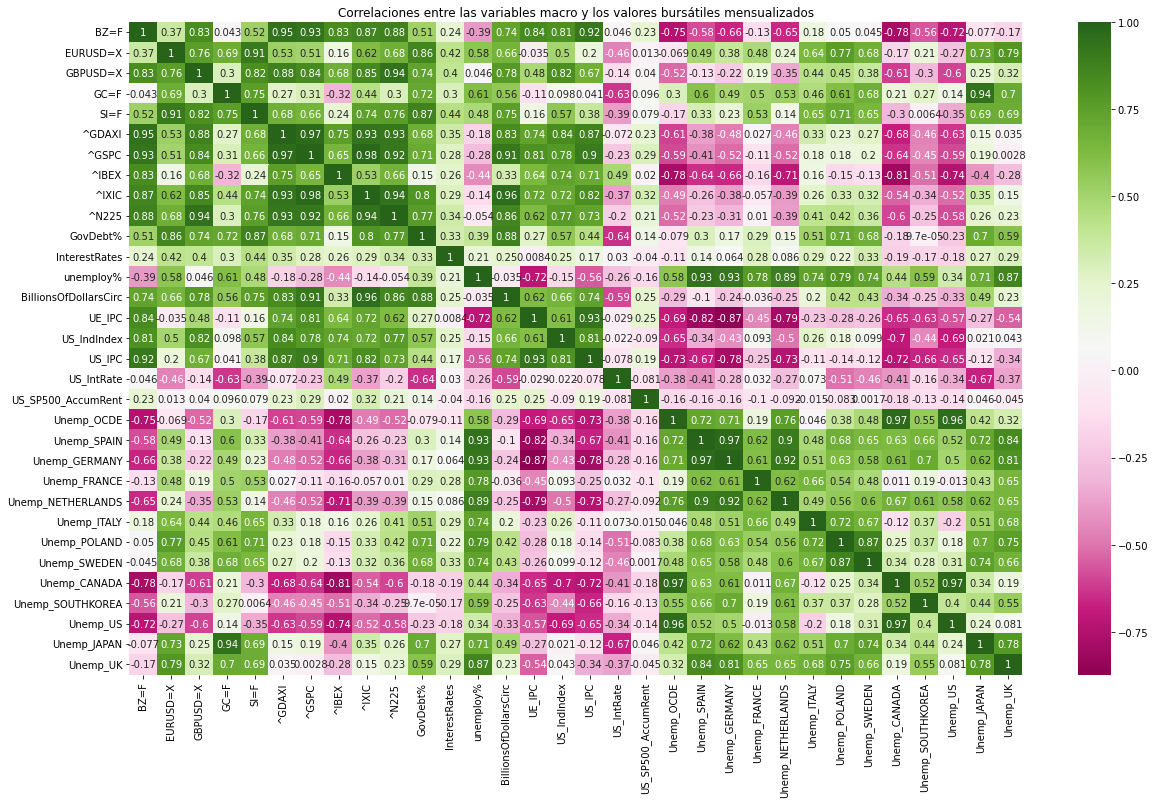

In [77]:
#Se calcula la matriz de correlación
correlations = corvar.corr()

#Se prepara el gráfico en Seaborn
plt.rcParams["figure.figsize"] = (20, 12)

corvar_corr = sns.heatmap(correlations, cmap="PiYG", annot=True)
plt.title('Correlaciones entre las variables macro y los valores bursátiles mensualizados');

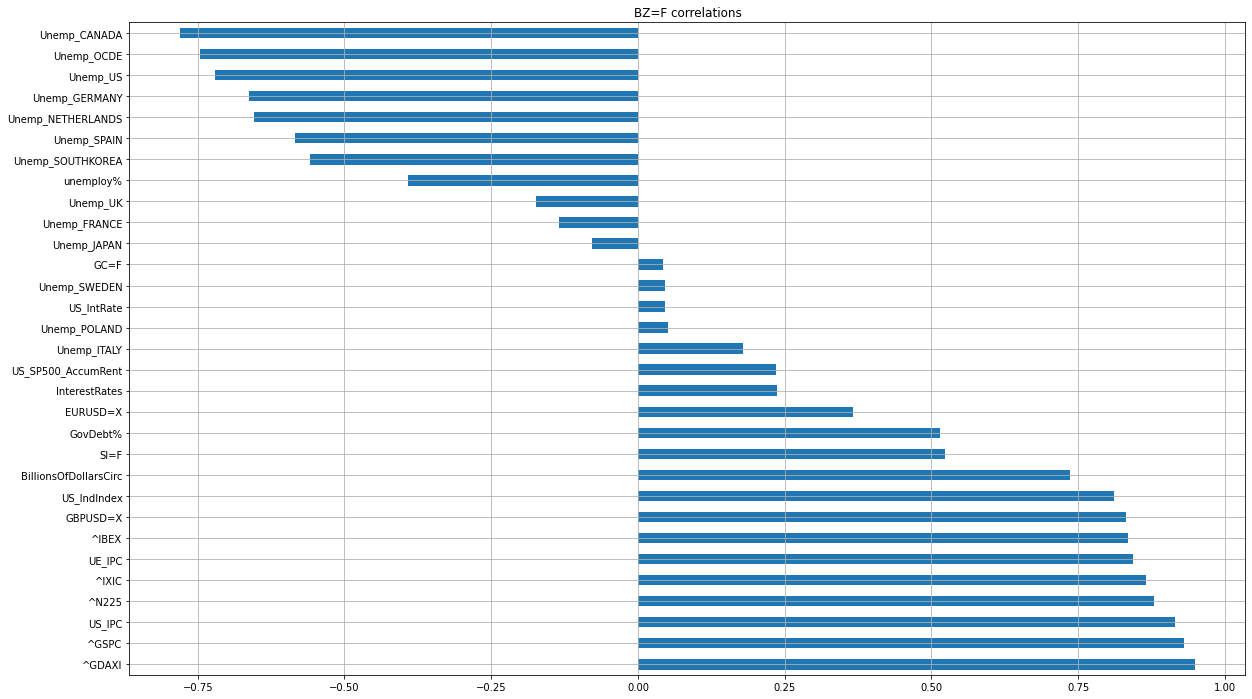

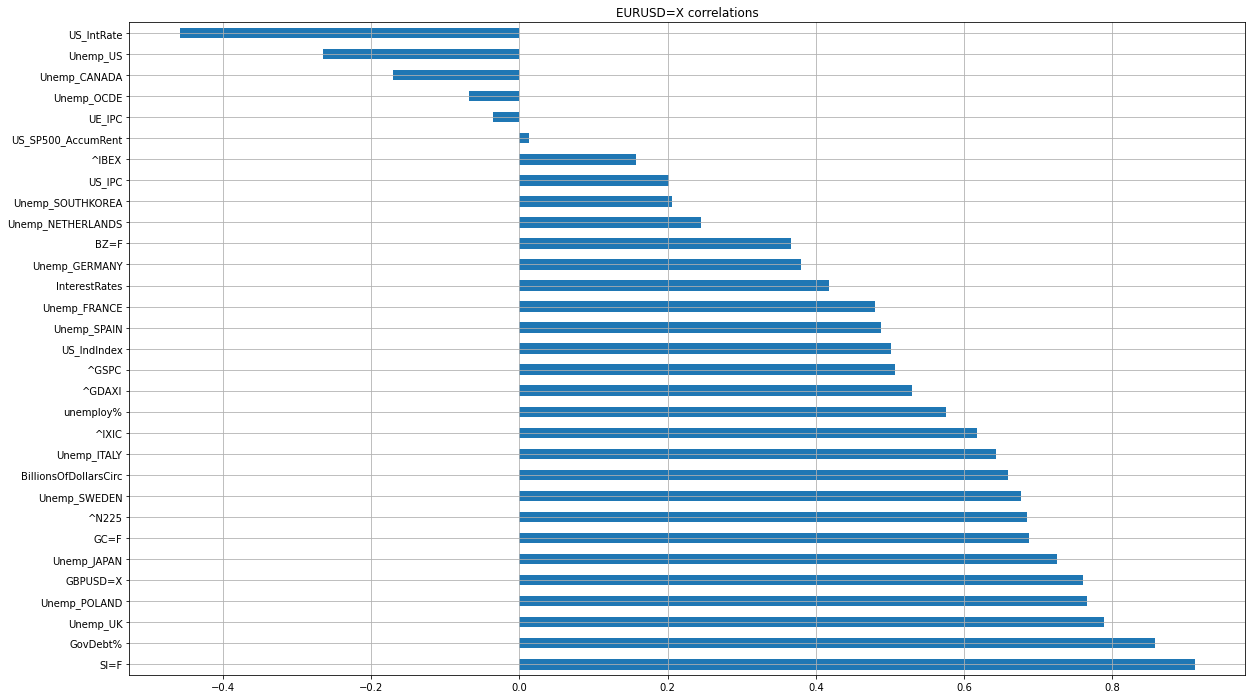

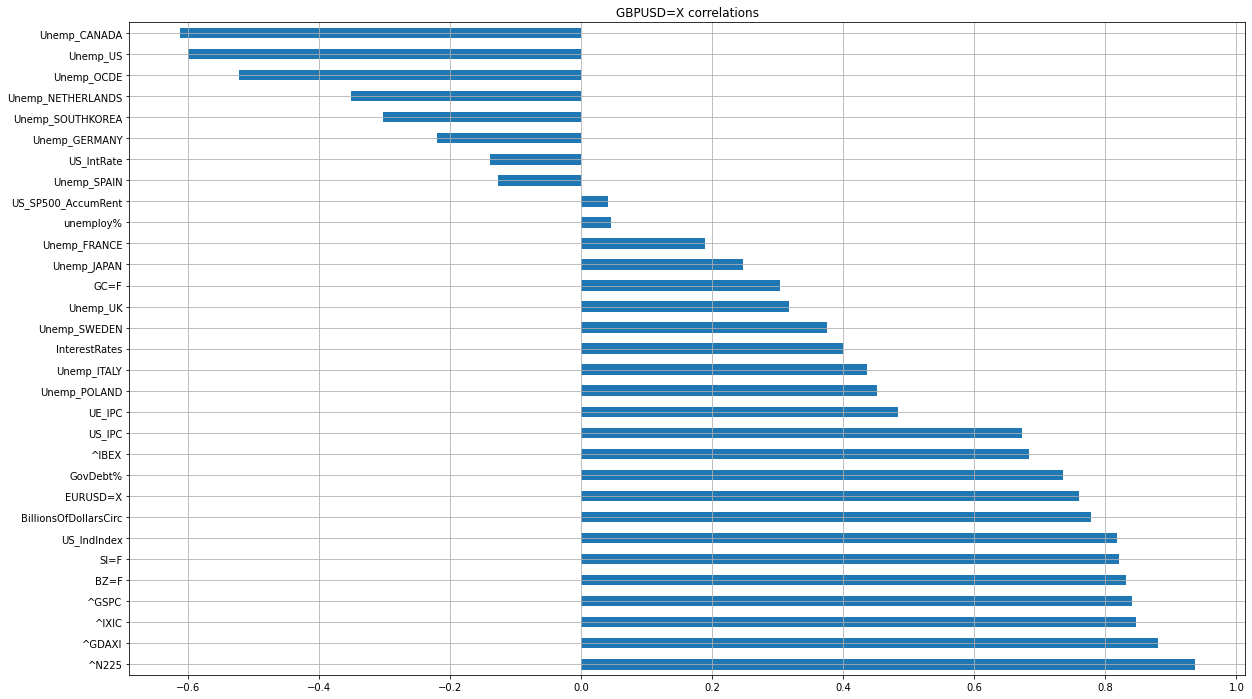

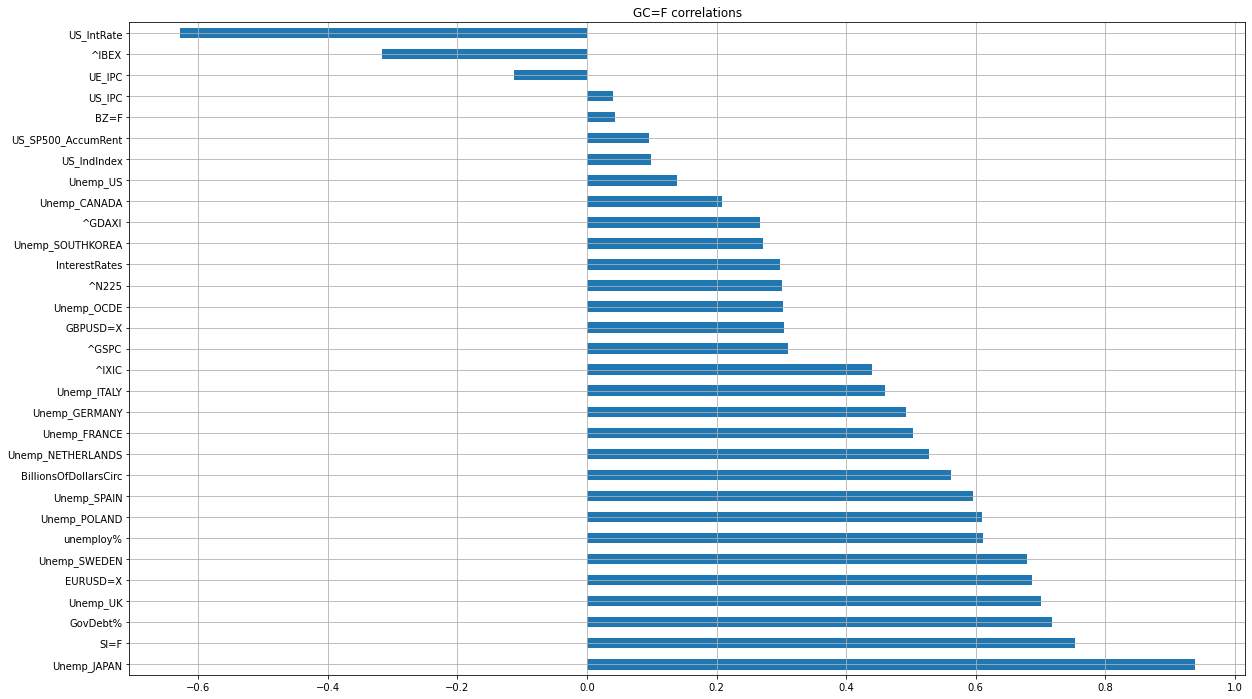

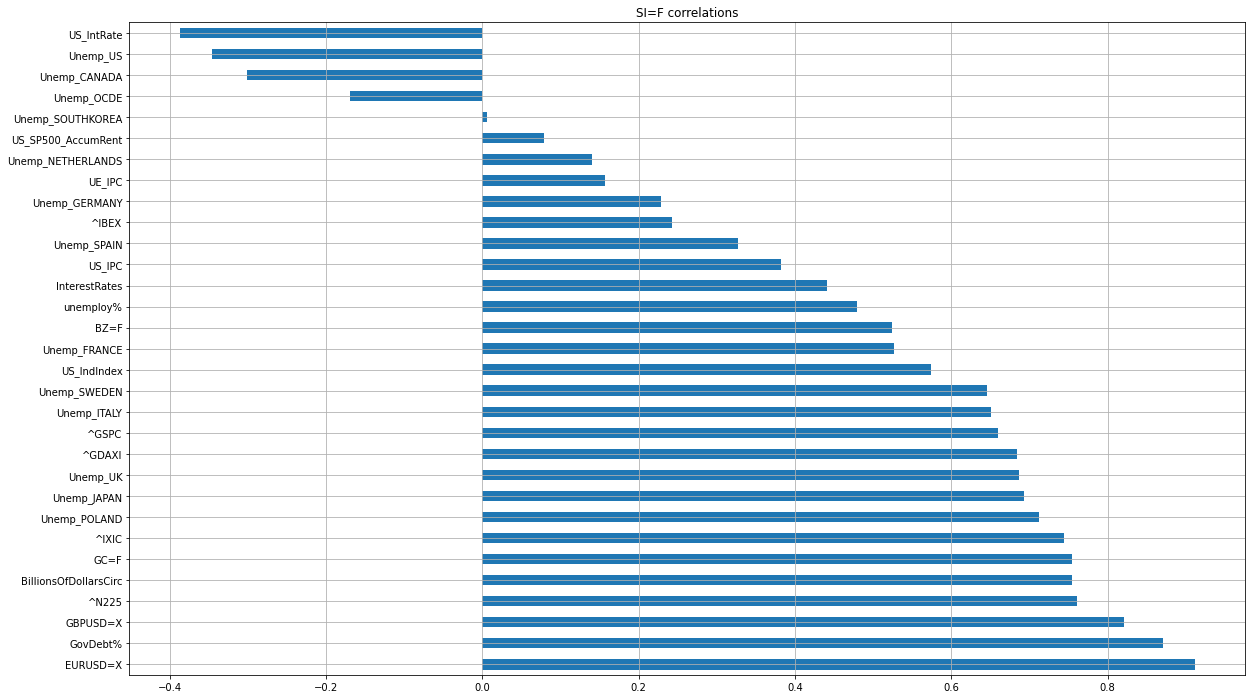

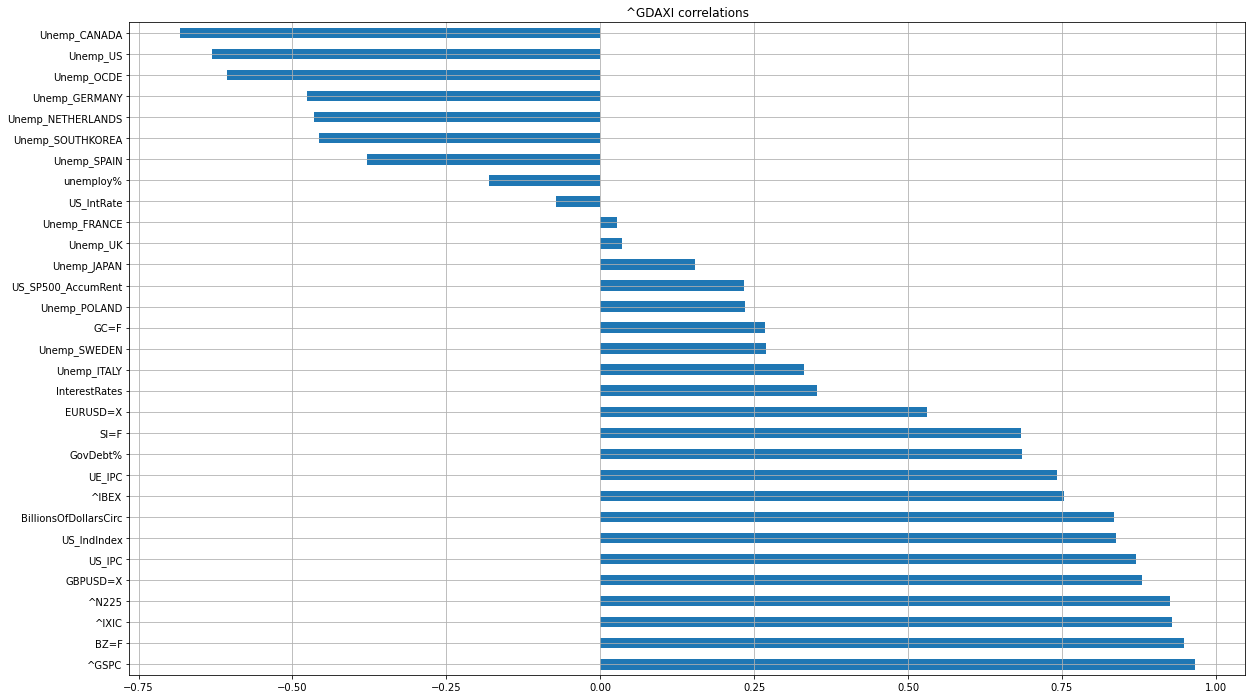

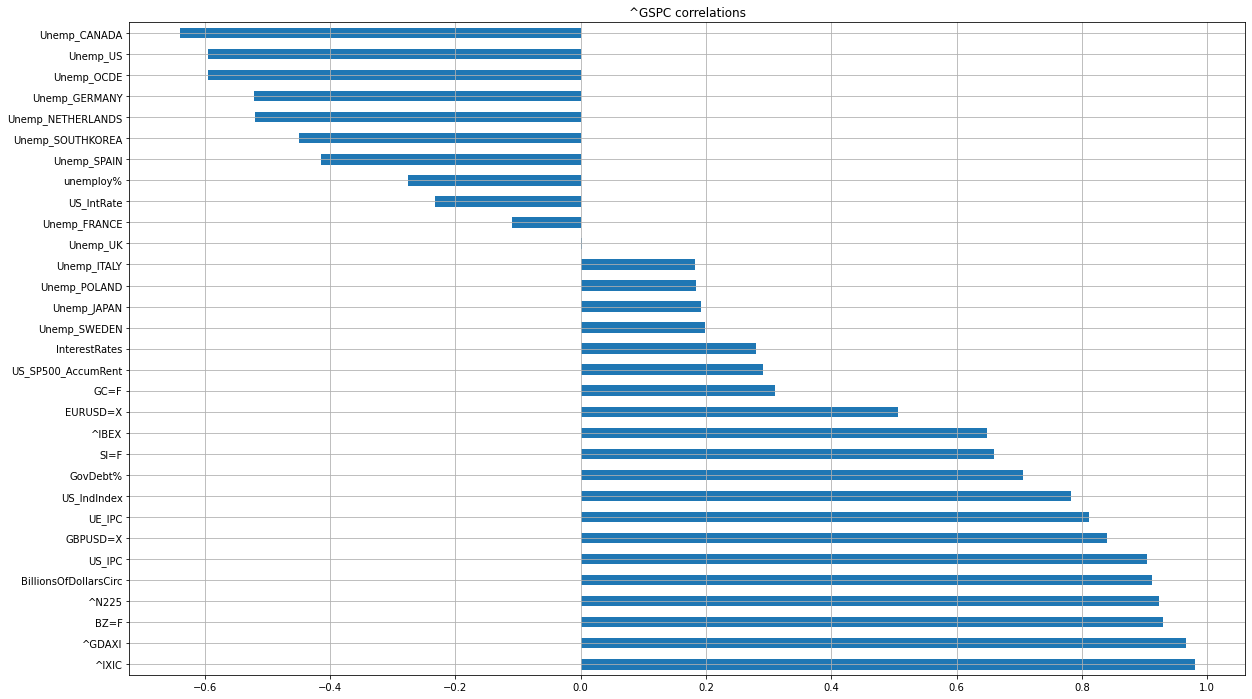

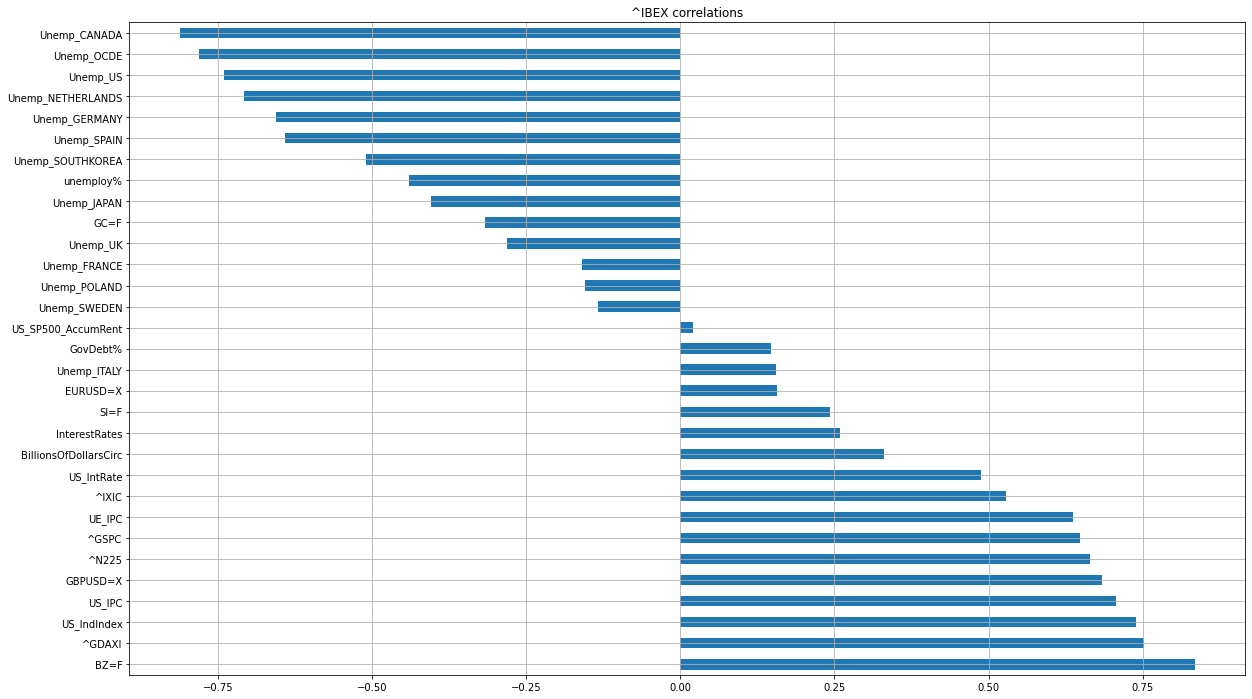

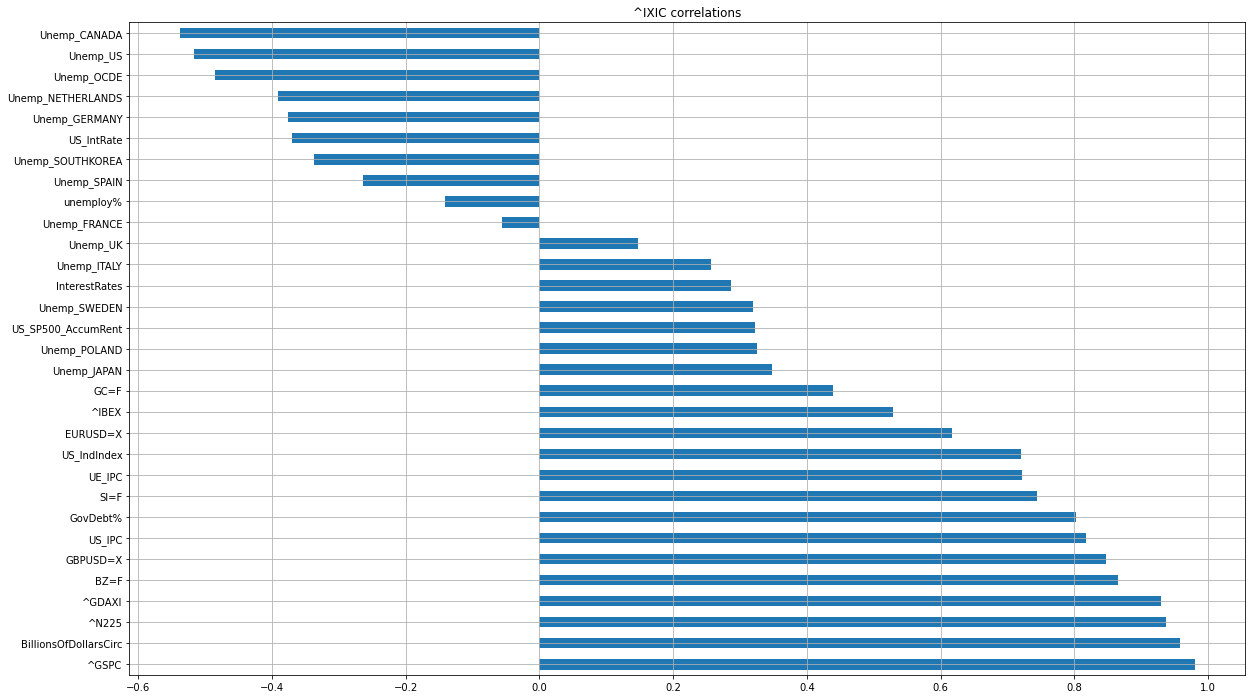

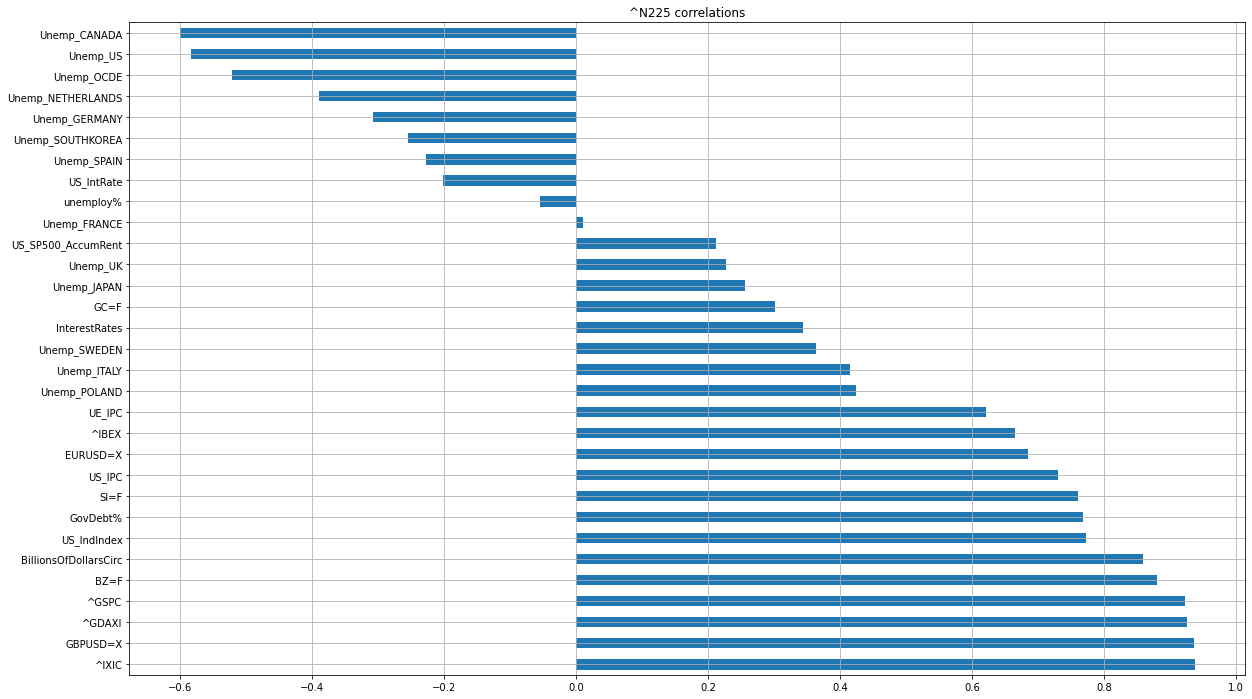

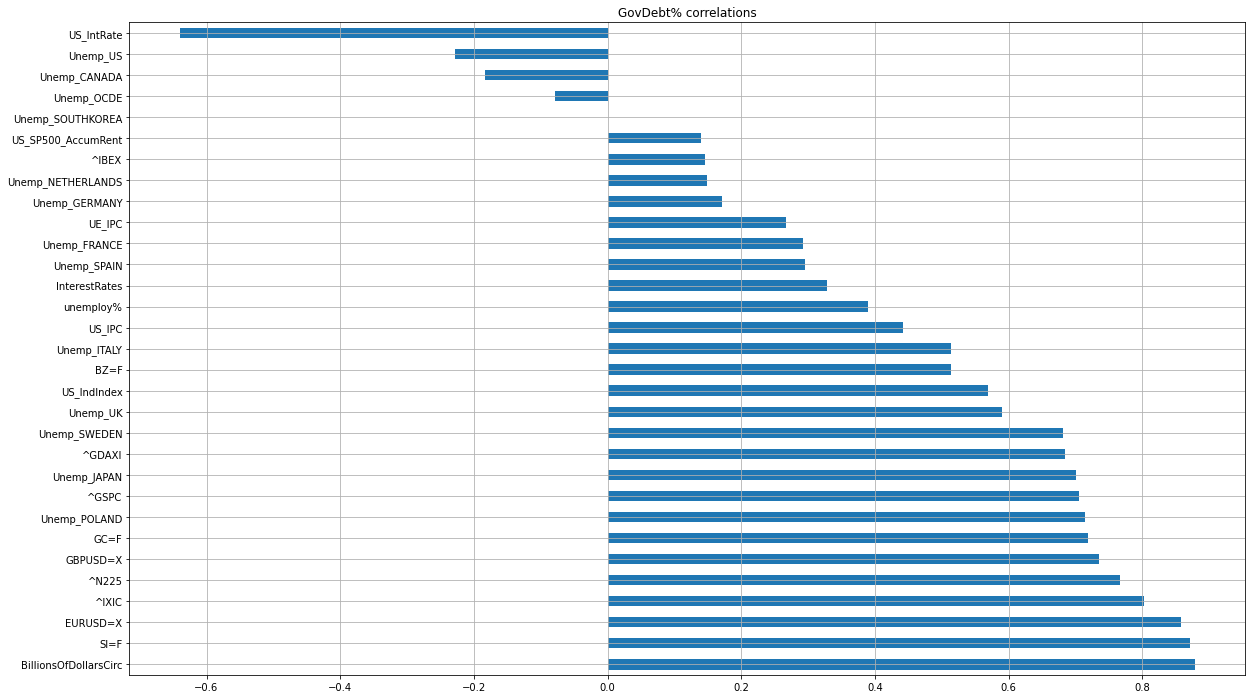

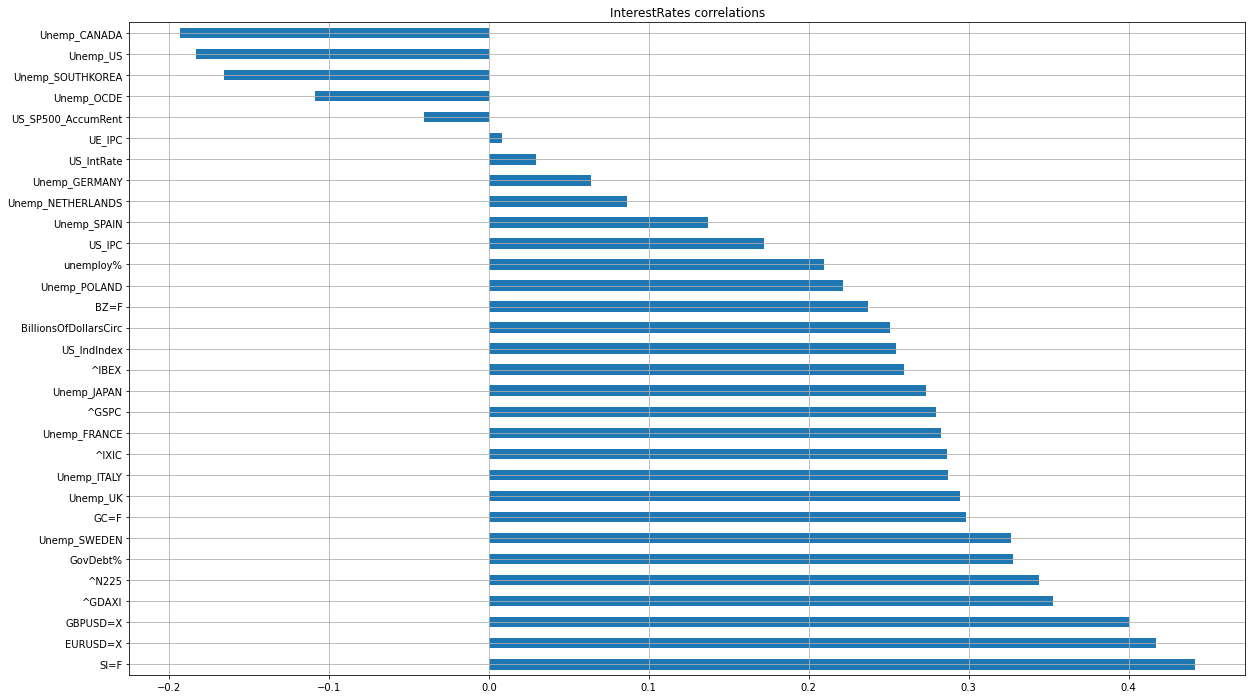

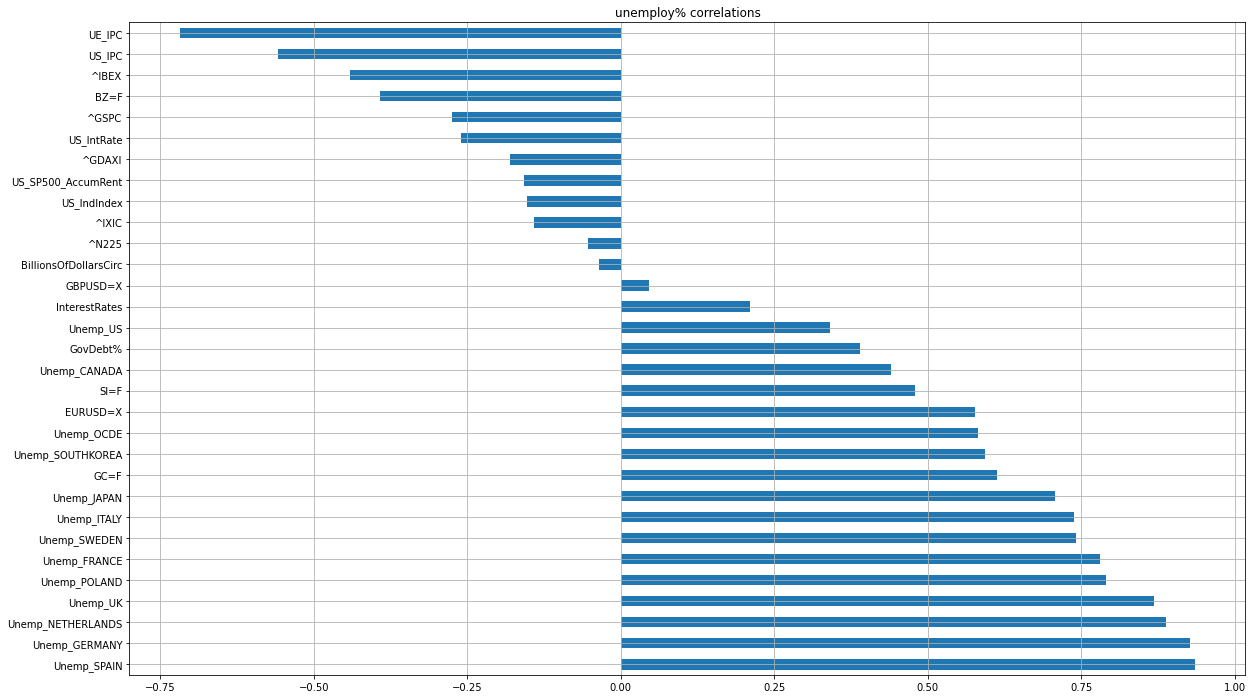

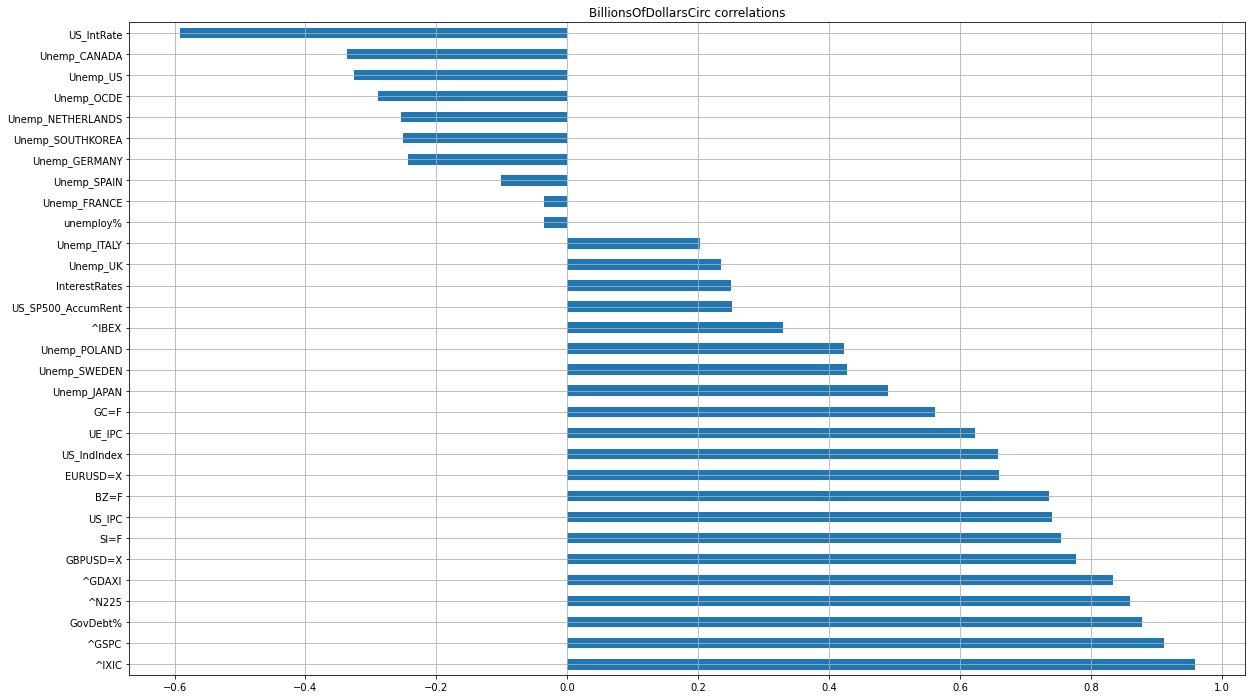

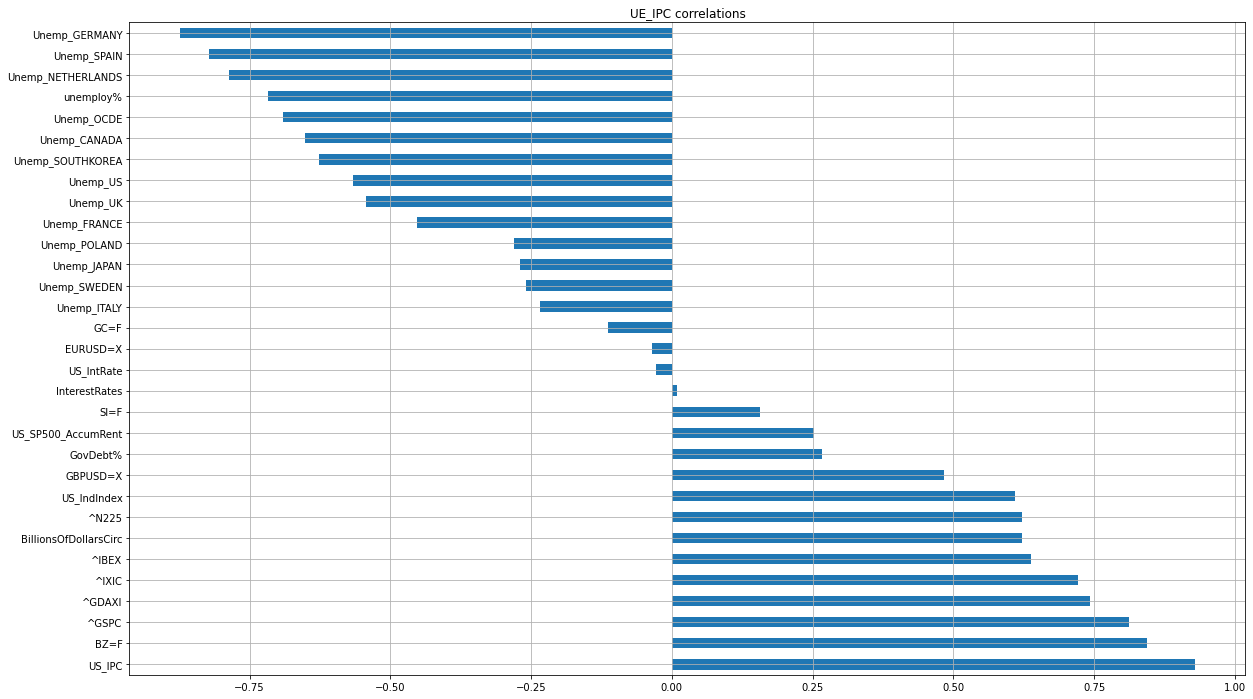

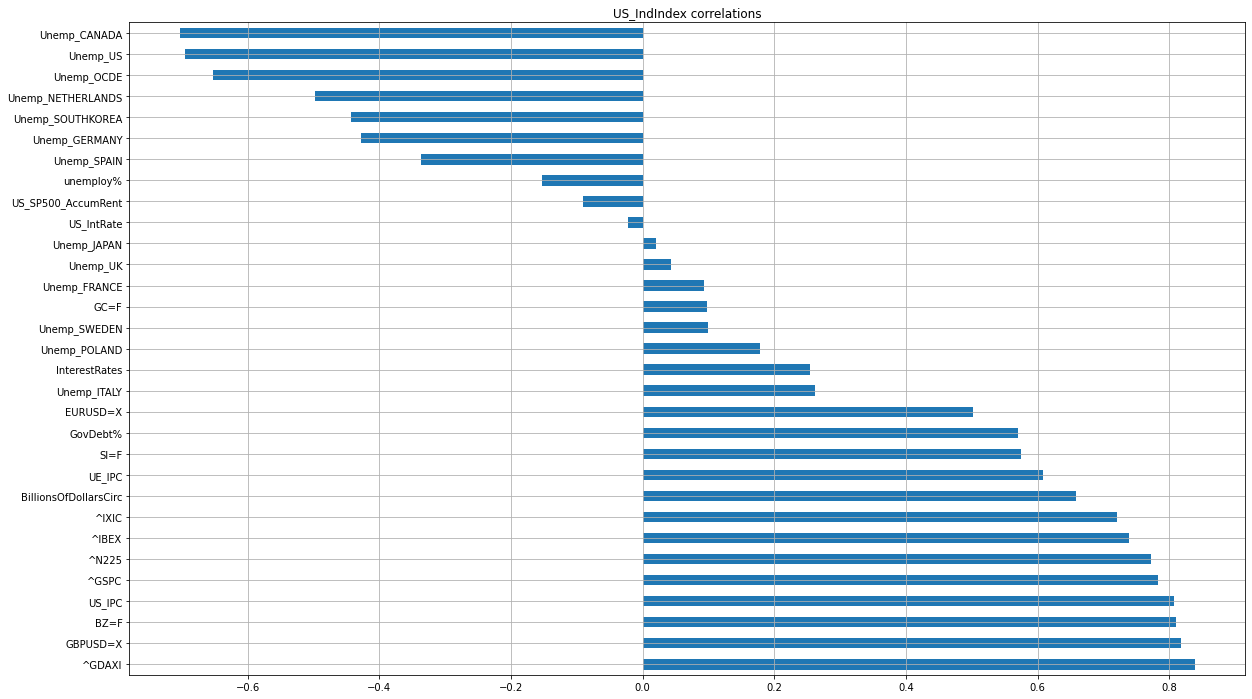

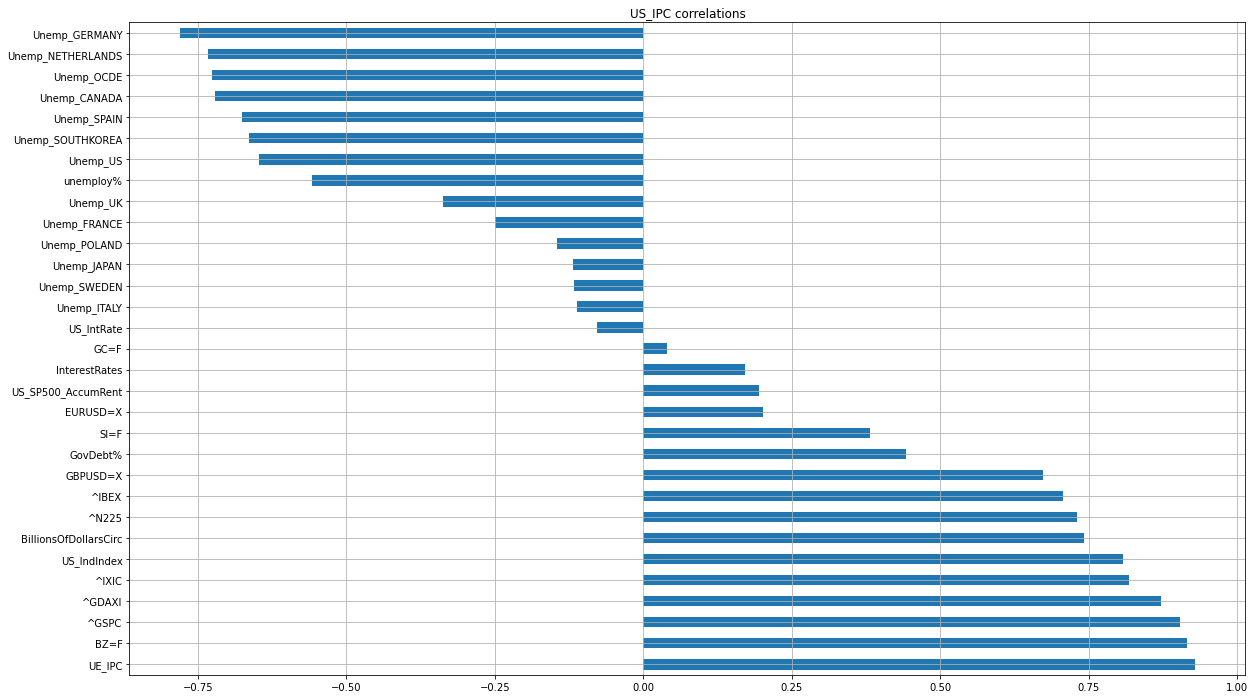

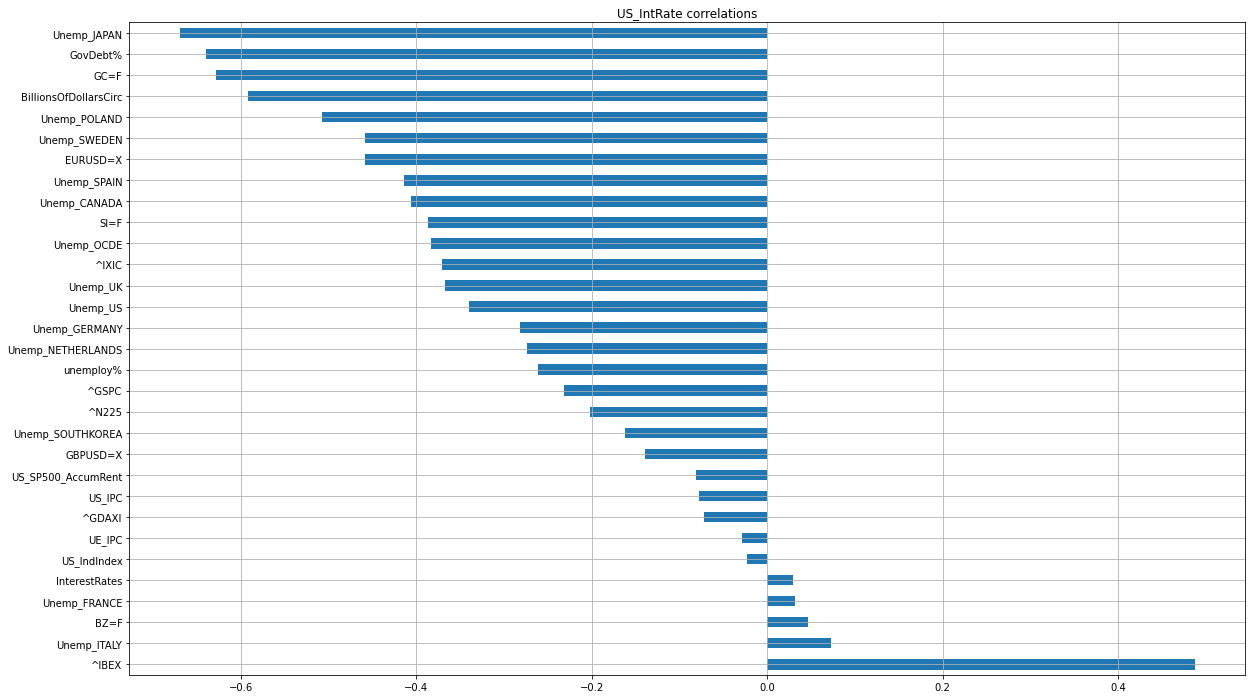

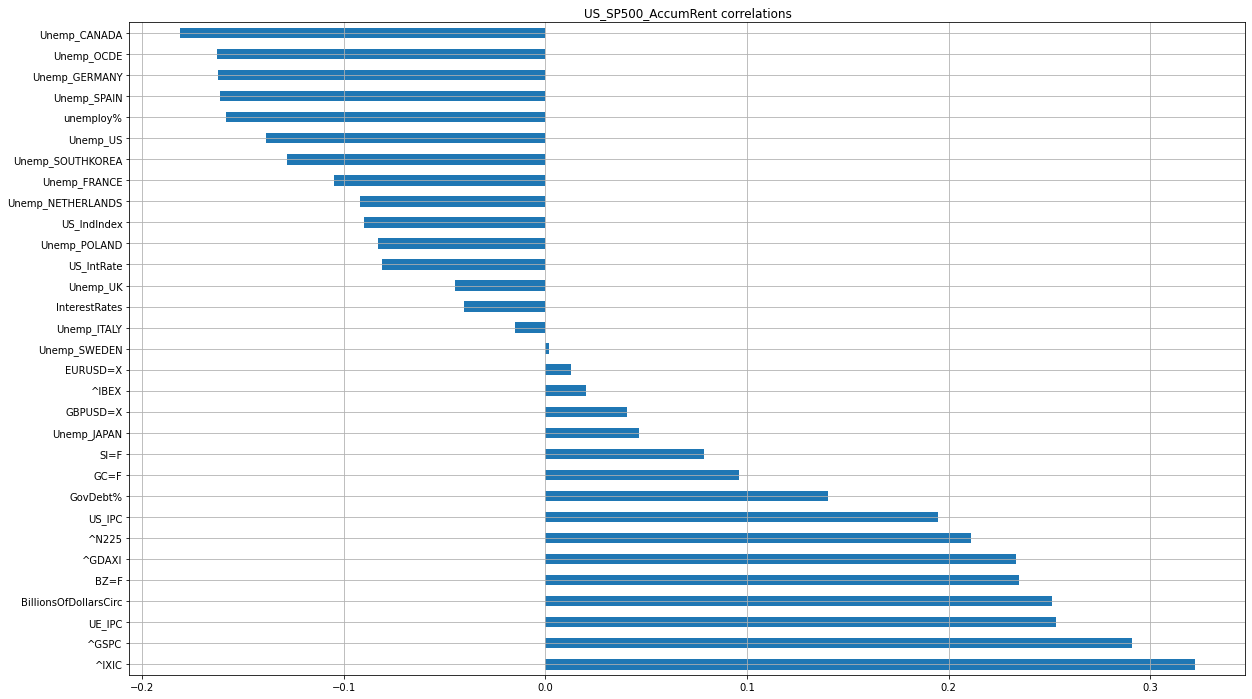

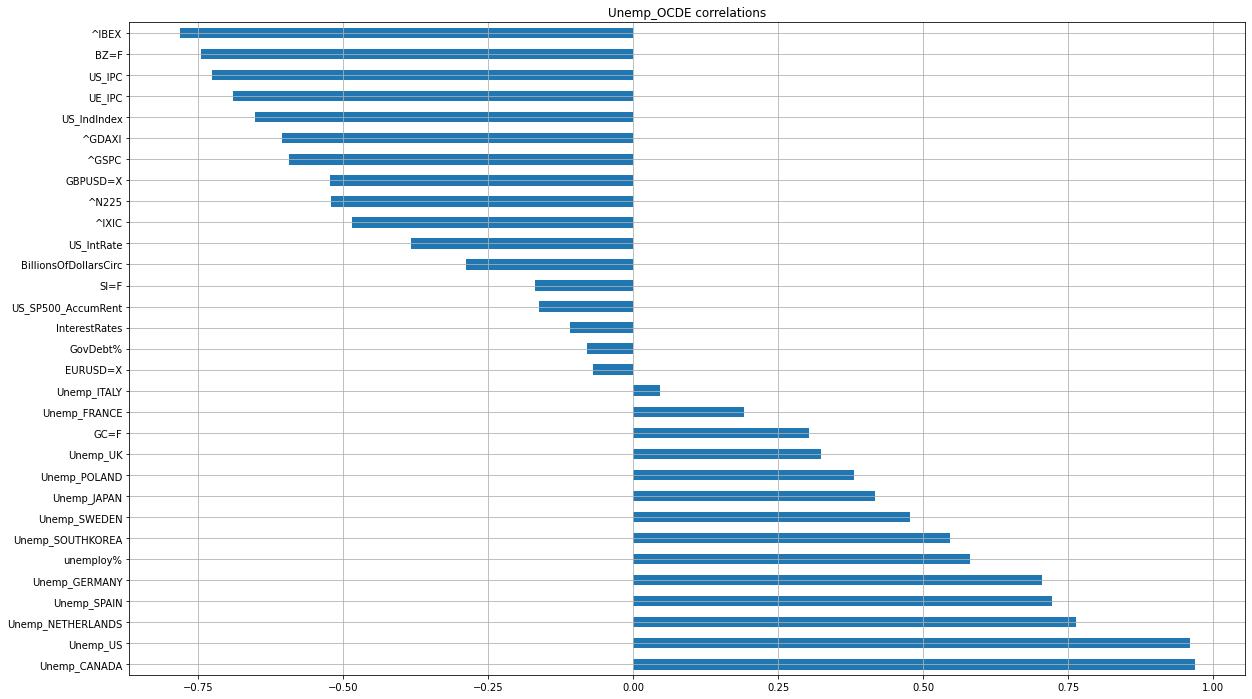

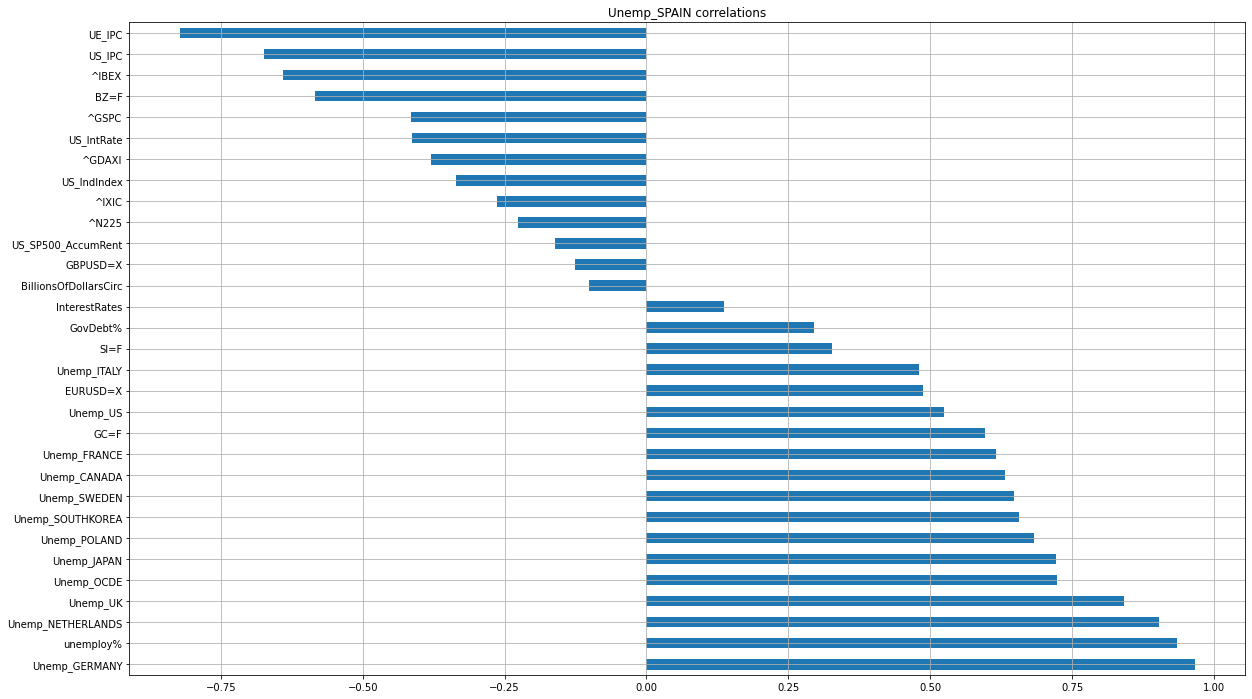

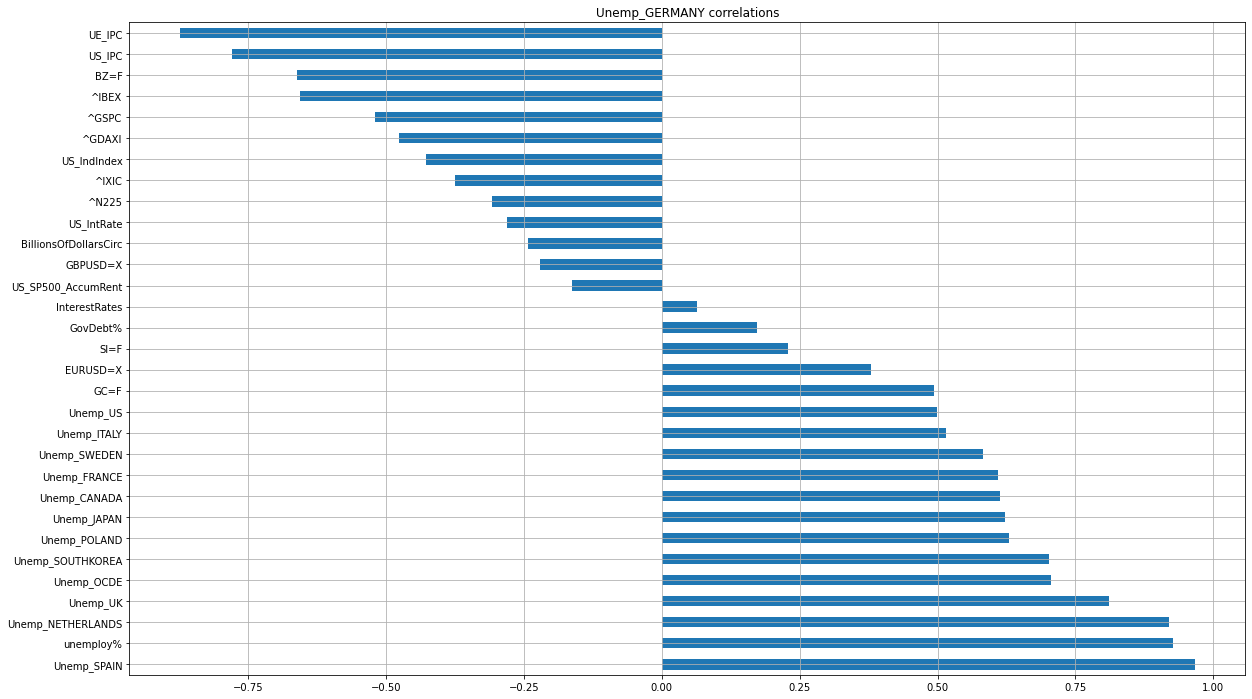

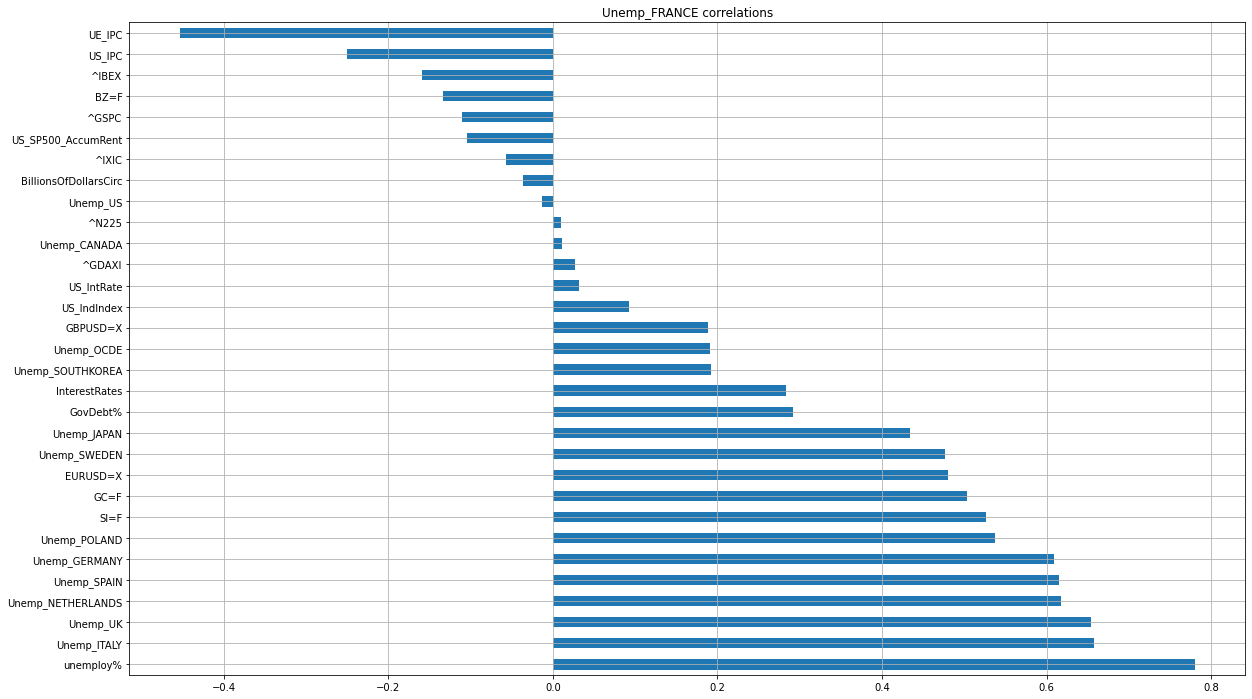

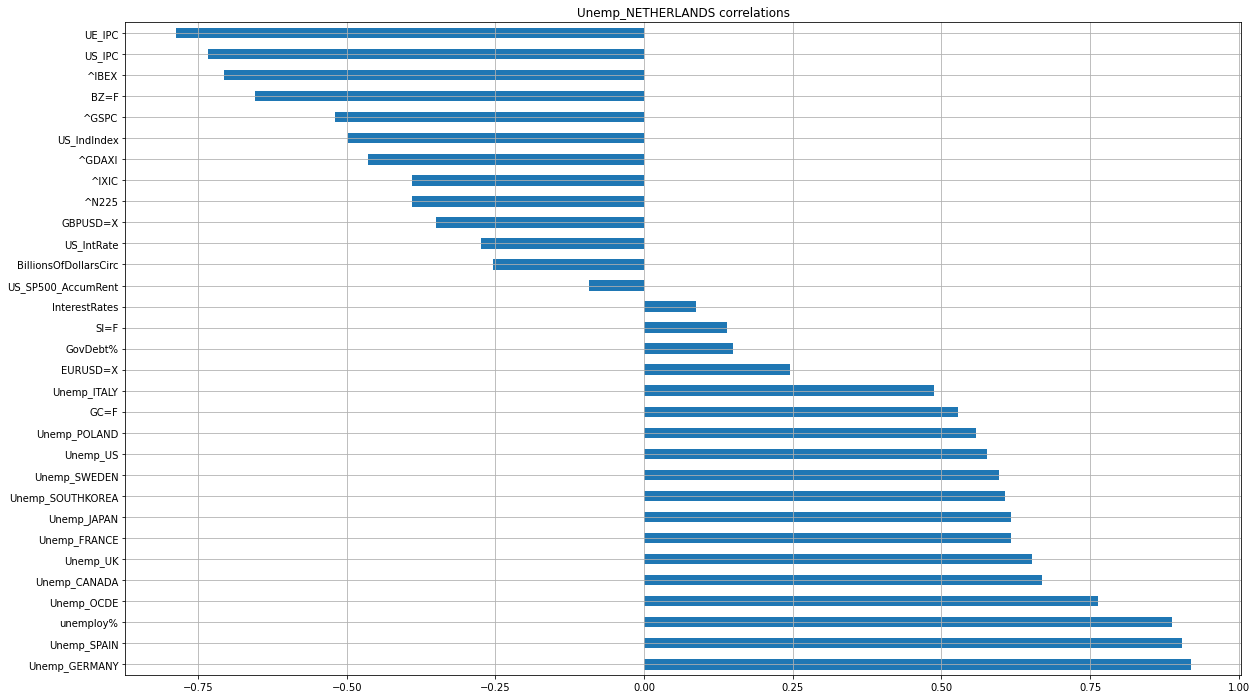

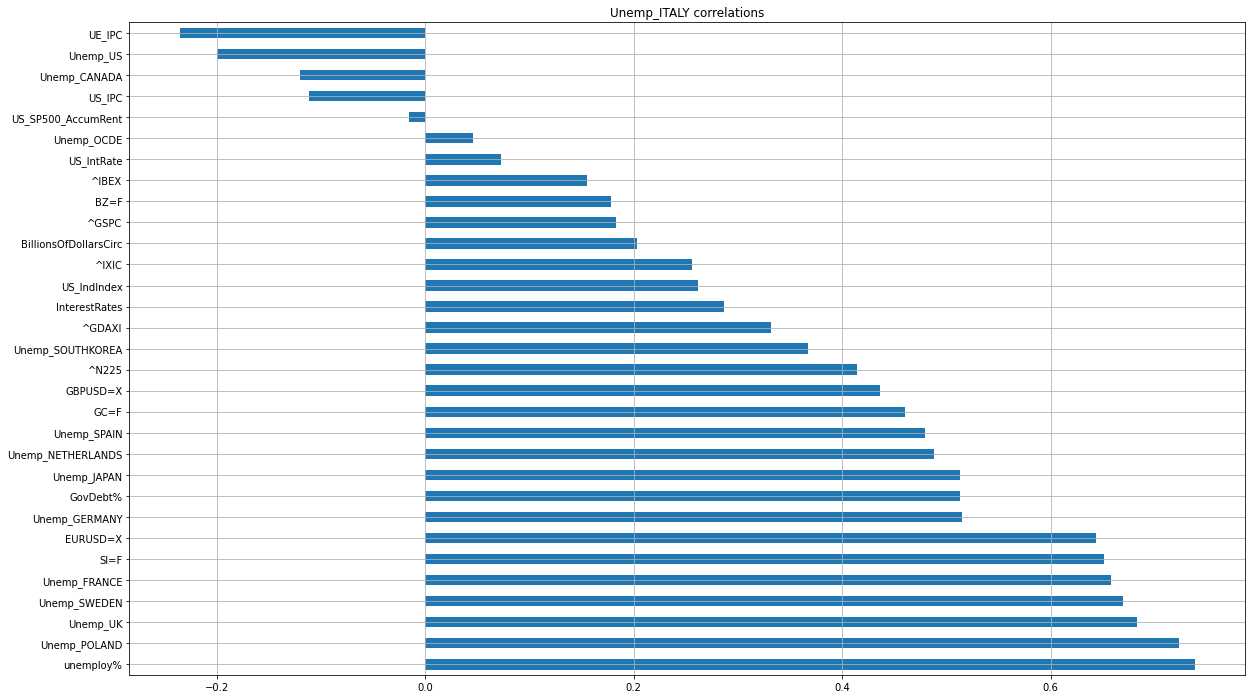

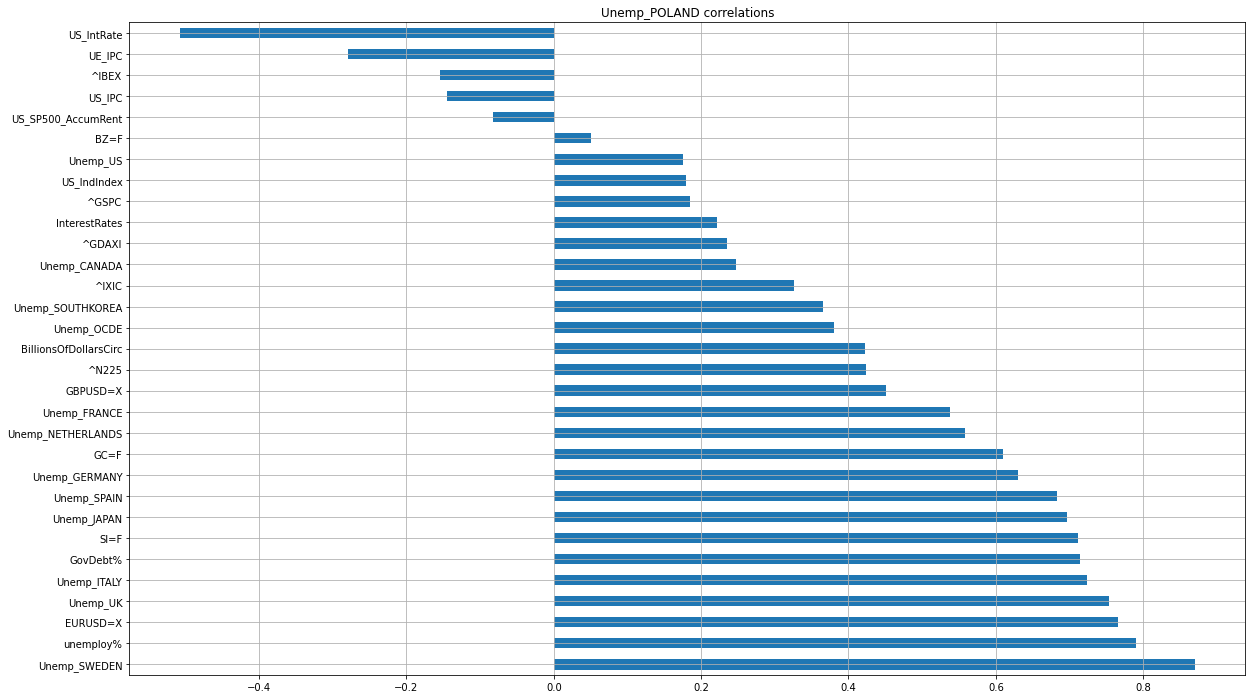

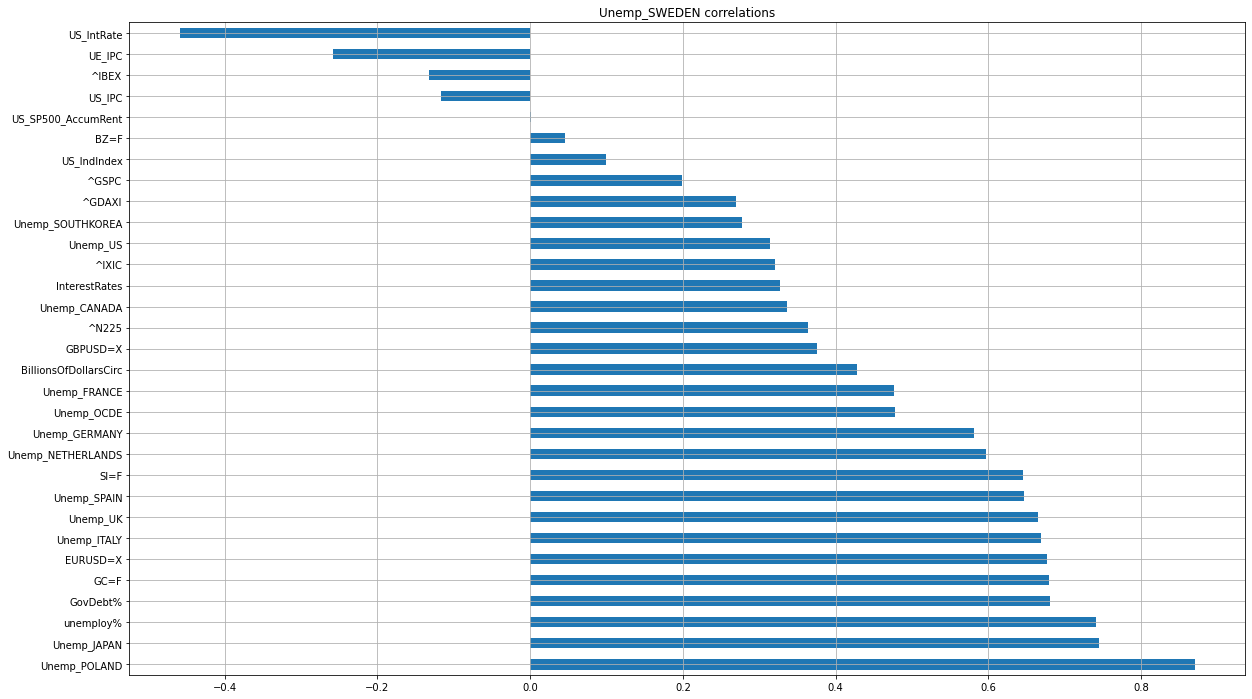

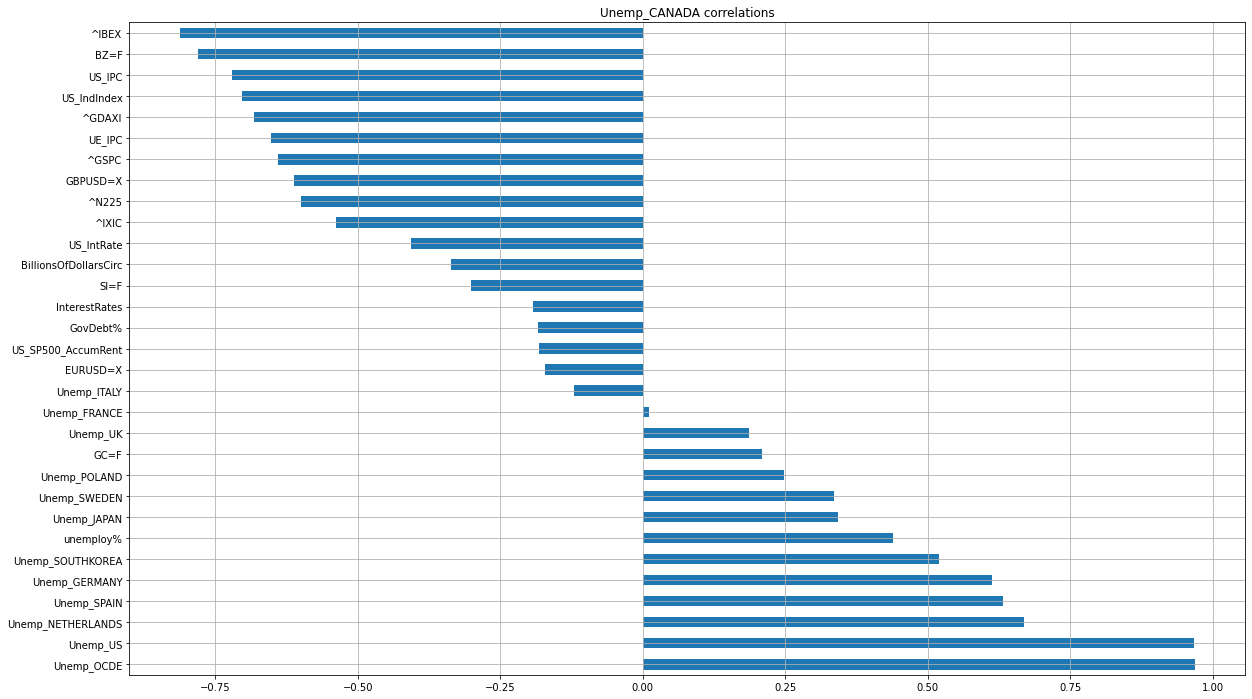

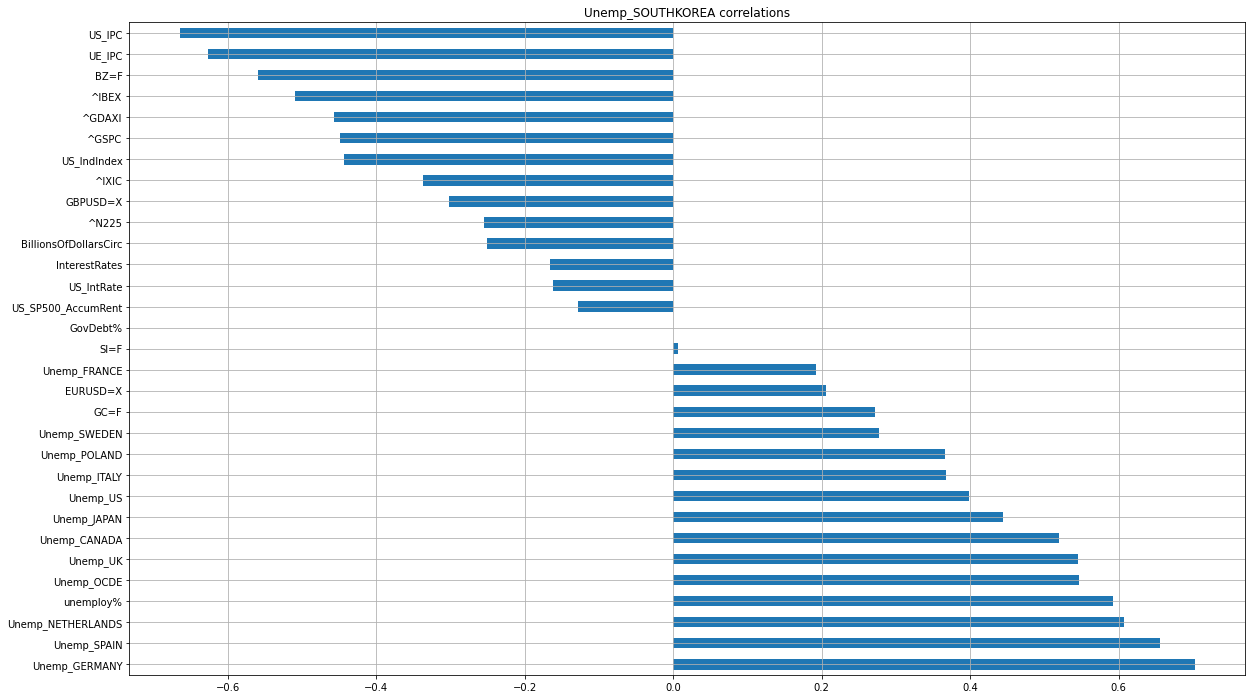

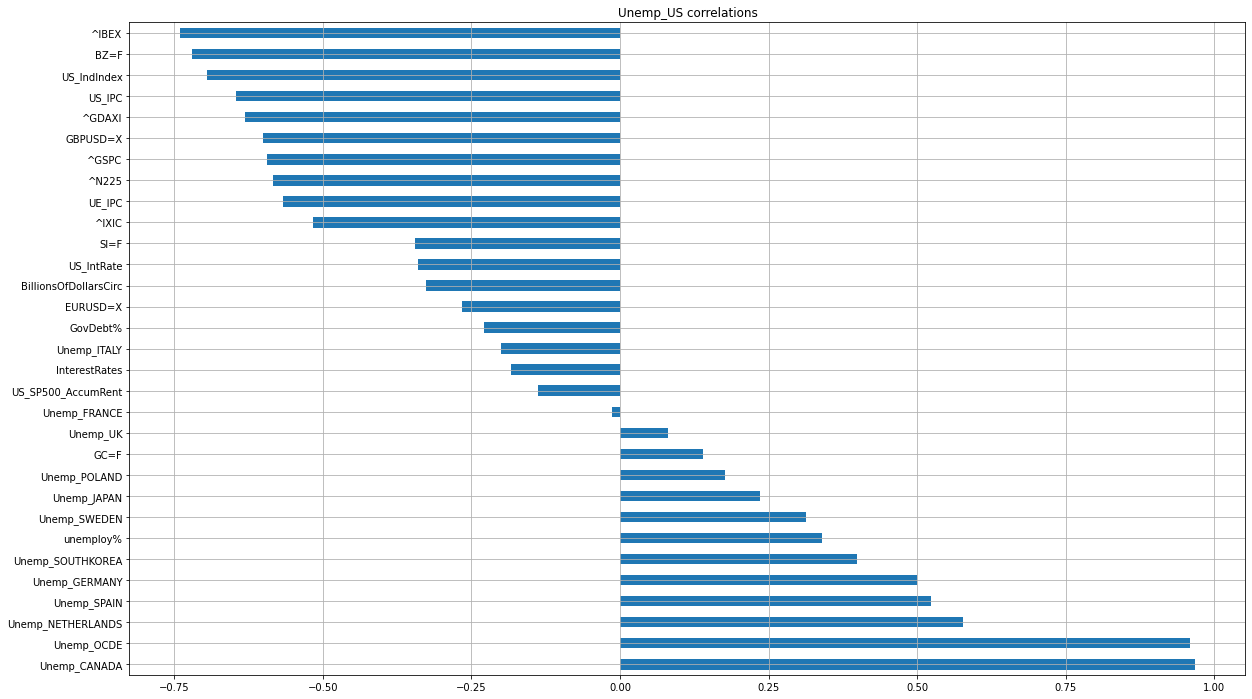

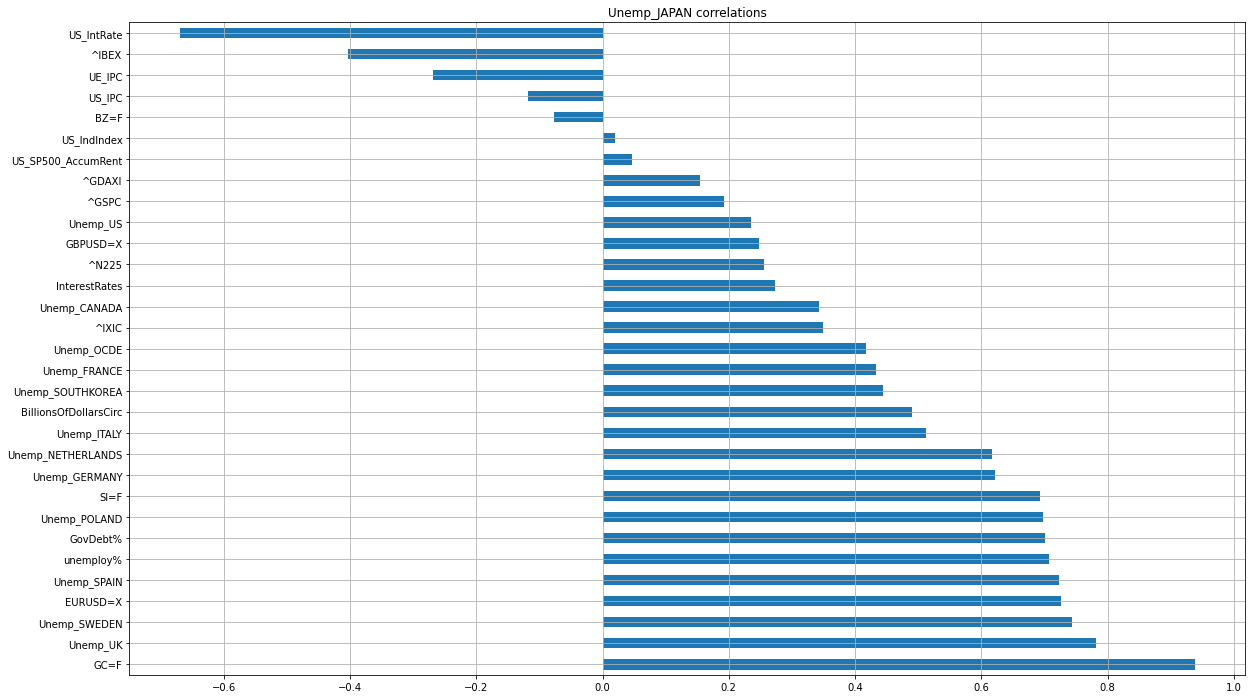

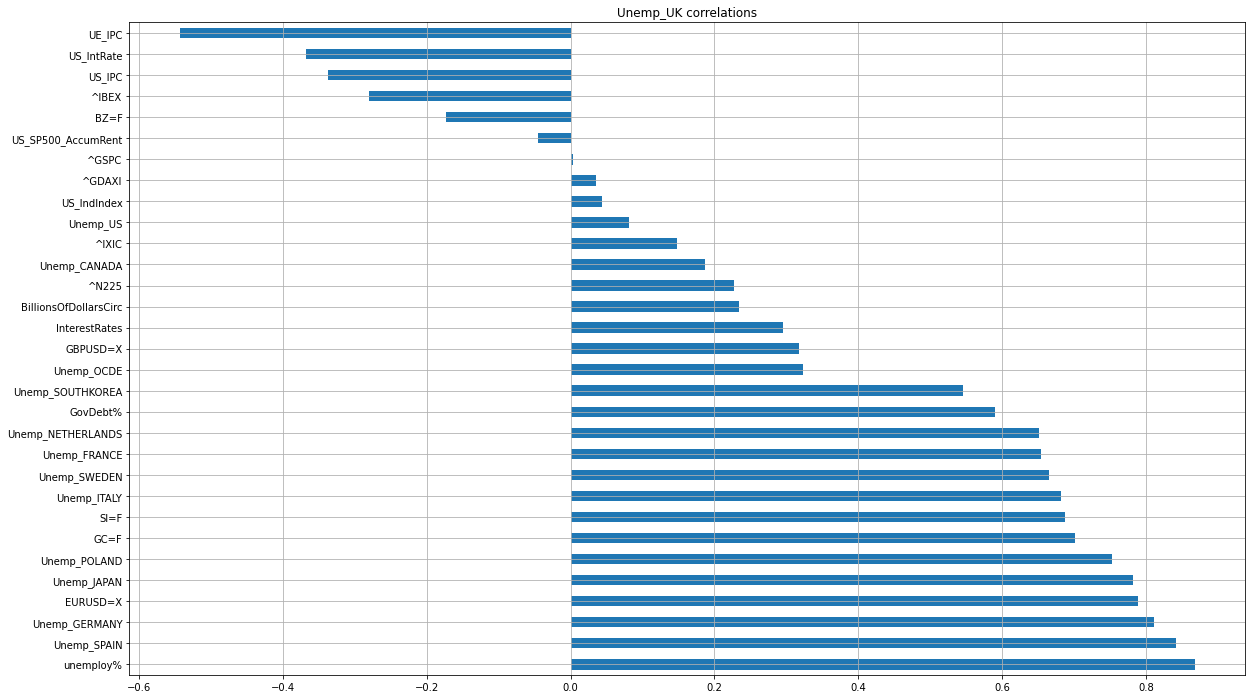

In [78]:
for data in correlations.columns:
  (correlations[data]
     .sort_values(ascending=False)
     .drop(data)
     .plot
     .barh(title=f'{data} correlations', grid=True));
  plt.show()

#### Correlaciones

Se va a particularizar el estudio en el IBEX35



BZ=F                     0.834421
^GDAXI                   0.752939
US_IndIndex              0.739356
US_IPC                   0.707188
GBPUSD=X                 0.683934
^N225                    0.664967
^GSPC                    0.648974
UE_IPC                   0.637335
^IXIC                    0.528805
US_IntRate               0.487377
BillionsOfDollarsCirc    0.329855
InterestRates            0.259647
SI=F                     0.242826
EURUSD=X                 0.157402
Unemp_ITALY              0.155615
GovDebt%                 0.146333
US_SP500_AccumRent       0.020051
Unemp_SWEDEN            -0.132983
Unemp_POLAND            -0.154851
Unemp_FRANCE            -0.159375
Unemp_UK                -0.280550
GC=F                    -0.317013
Unemp_JAPAN             -0.403812
unemploy%               -0.440169
Unemp_SOUTHKOREA        -0.509628
Unemp_SPAIN             -0.640839
Unemp_GERMANY           -0.656413
Unemp_NETHERLANDS       -0.707208
Unemp_US                -0.740071
Unemp_OCDE    

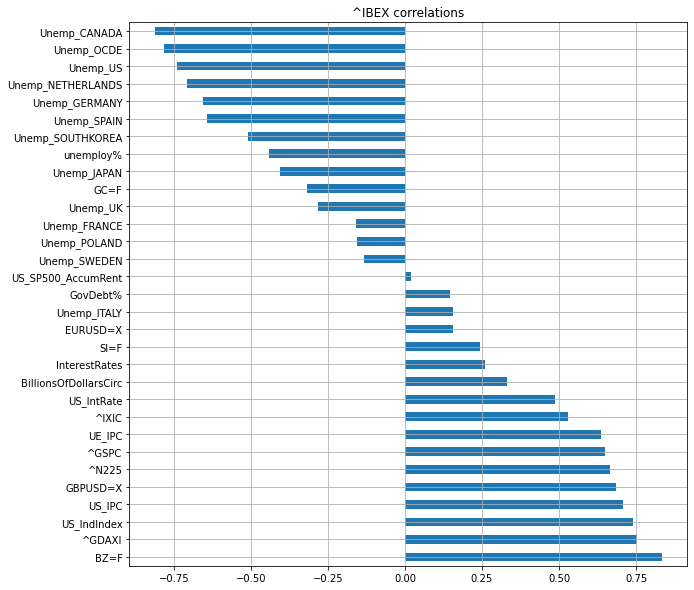

In [79]:
#Selección del ticker a estudiar entre los seleccionados
st='^IBEX'

st_cor=correlations[st].drop(st).sort_values(ascending=False)
print(st_cor)

st_plot=st_cor.plot.barh(title=f'{st} correlations', grid=True, figsize=(10,10));

In [80]:
st_cor=pd.DataFrame(st_cor)
st_cor

^IBEX
BZ=F                   0.834421
^GDAXI                 0.752939
US_IndIndex            0.739356
US_IPC                 0.707188
GBPUSD=X               0.683934
^N225                  0.664967
^GSPC                  0.648974
UE_IPC                 0.637335
^IXIC                  0.528805
US_IntRate             0.487377
BillionsOfDollarsCirc  0.329855
InterestRates          0.259647
SI=F                   0.242826
EURUSD=X               0.157402
Unemp_ITALY            0.155615
GovDebt%               0.146333
US_SP500_AccumRent     0.020051
Unemp_SWEDEN          -0.132983
Unemp_POLAND          -0.154851
Unemp_FRANCE          -0.159375
Unemp_UK              -0.280550
GC=F                  -0.317013
Unemp_JAPAN           -0.403812
unemploy%             -0.440169
Unemp_SOUTHKOREA      -0.509628
Unemp_SPAIN           -0.640839
Unemp_GERMANY         -0.656413
Unemp_NETHERLANDS     -0.707208
Unemp_US              -0.740071
Unemp_OCDE            -0.781545
Unemp_CANADA          -0.811525

Se localizan las correlaciones más fuerte de entre todas las variables consideradas para la elaboración de los modelos.

BZ=F                 0.834421
^GDAXI               0.752939
US_IndIndex          0.739356
US_IPC               0.707188
Unemp_NETHERLANDS   -0.707208
Unemp_US            -0.740071
Unemp_OCDE          -0.781545
Unemp_CANADA        -0.811525
Name: ^IBEX, dtype: float64


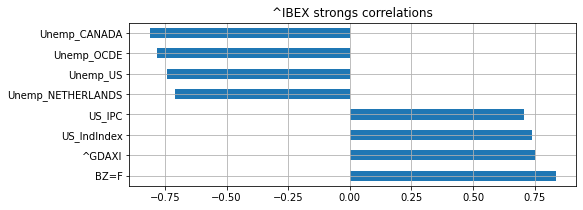

In [81]:
#Selección del ticker a estudiar entre los seleccionados
st='^IBEX'

#Valor de la correlación del corte
## Superior
top_cor=0.7
low_cor=-0.7

st_cor=correlations[(correlations[st]>top_cor)|(correlations[st]<low_cor)][st].drop(st).sort_values(ascending=False)
print(st_cor)

st_plot=st_cor.plot.barh(title=f'{st} strongs correlations', grid=True, figsize=(8,3));

# Medias móviles

A los datos de yfinance se le van a añadir 3 columnas para almacenar en ellas los valores de las medias móviles del precio de cierre de tres ventanas de tiempo: 7, 14 y 30 días

In [82]:
#Se genera una función para automatizar el proceso
def addMA (df):
  '''
  Generate MA of the Close column for the data downloaded with yfinance
  '''
  #Se almacena en n+1 el valor de la media movil de los días anteriores.
  #Se toman los valores desde n-t hasta n
  #7 days Moving Average
  df['MA7']=df.Close.rolling(7).mean().shift(1)

  #14 days Moving Average
  df['MA14']=df.Close.rolling(14).mean().shift(1)

  #30 days Moving Average
  df['MA30']=df.Close.rolling(30).mean().shift(1)
  return df

In [83]:
#Se generan las medias móviles de los datasets
df_sp500=addMA(df_sp500)
df_nasdaq=addMA(df_nasdaq)
df_eurusd=addMA(df_eurusd)
df_gbpusd=addMA(df_gbpusd)
df_brent=addMA(df_brent)
df_gold=addMA(df_gold)
df_silver=addMA(df_silver)
df_ibex=addMA(df_ibex)
print('Medias móviles generadas')

Medias móviles generadas


Se grafican las medias móviles del IBEX para observar los resultados

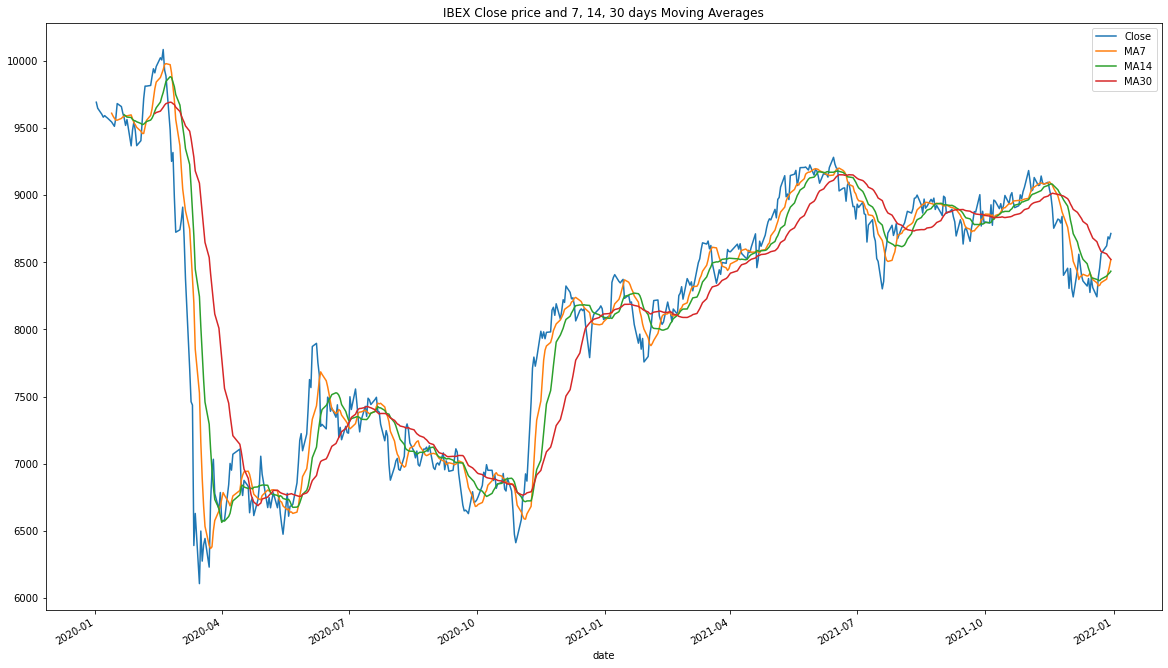

In [84]:
df_ibex[['Close','MA7','MA14','MA30']].plot(title='IBEX Close price and 7, 14, 30 days Moving Averages');

Se observan las diferencias entre las medias móviles y los datos reales

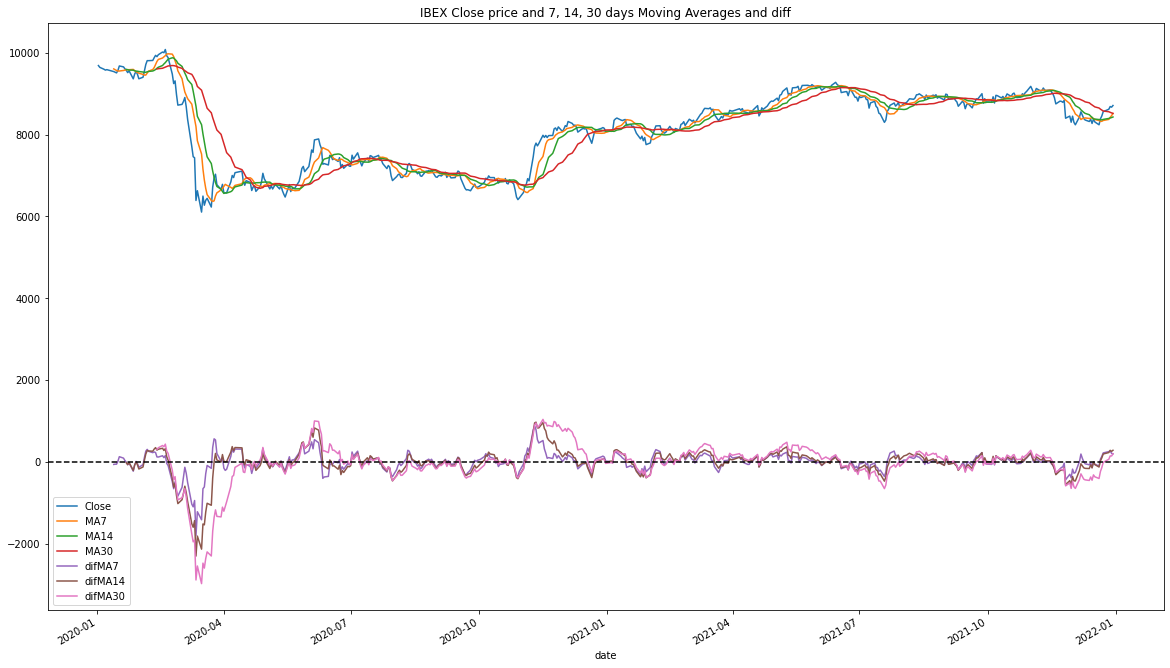

In [85]:
df_ibex['difMA7']=df_ibex['Close']-df_ibex['MA7']
df_ibex['difMA14']=df_ibex['Close']-df_ibex['MA14']
df_ibex['difMA30']=df_ibex['Close']-df_ibex['MA30']
df_ibex
df_ibex[['Close','MA7','MA14','MA30', 'difMA7', 'difMA14','difMA30']].plot(title='IBEX Close price and 7, 14, 30 days Moving Averages and diff').axhline(0, c='black', linestyle='dashed');

# Variación del IBEX

En este apartado se va a añadir una nueva variable que se considera relevante para la predicción del valor de un índice y es la variación de este respecto a un periodo pasado.

Para ello, en primer lugar se va a analizar la correlación y correlación parcial para observar la relación entre el valor actual y periodos anteriores.

## Observación de la autocorrelación y autocorrelación parcial

### Autocorrelación

Describe la autocorrelación entre una observación y otra observación en un paso de tiempo anterior

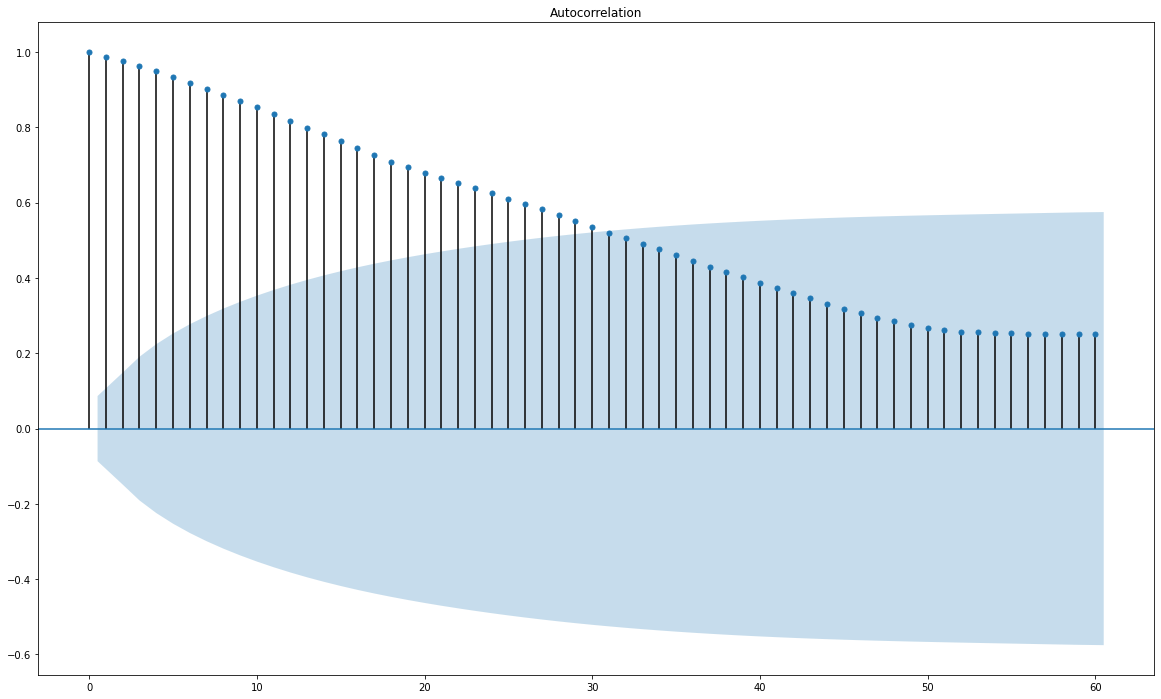

In [86]:
plot_acf(df_ibex['Close'].dropna(), lags=60);

### Autocorrelación parcial

Describe la relación directa entre una observación y su retraso.

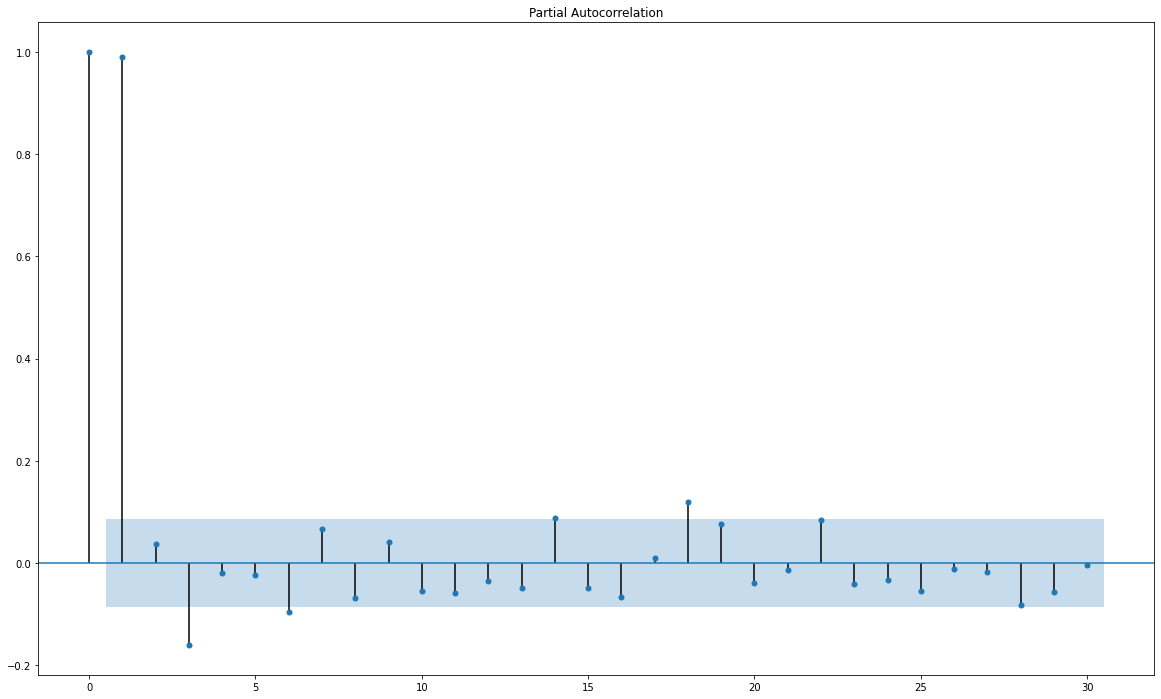

In [87]:
plot_pacf(df_ibex['Close'].dropna(), lags=30);

In [88]:
#Se genera la columna dif con la variación del ibex de un día respecto al anterior
df_ibex['dif']=df_ibex['Close']-df_ibex['Close'].shift(1)


In [89]:
# Resumen de las variaciones del IBEX de un día a otro
df_ibex['dif'].describe()

count     512.000000
mean       -1.908984
std       126.195552
min     -1045.500000
25%       -59.225000
50%         3.850000
75%        66.650000
max       589.000000
Name: dif, dtype: float64

# Generación de señales

El modelo idel debería ser capaz de predecir las señales de compra. Estas son 1 si el valor de IBEX de mañana es superior o igual al de hoy y 0 si son inferiores

In [90]:
df_ibex.loc[(df_ibex['Close'].shift(-1)-df_ibex['Close']) >= 0, 'flag'] = 1
df_ibex.loc[(df_ibex['Close'].shift(-1)-df_ibex['Close']) < 0, 'flag'] = 0
df_ibex

Open    High     Low   Close     Volume  Dividends  \
date                                                               
2020-01-02  9639.1  9705.4  9615.1  9691.2  142379600          0   
2020-01-03  9631.2  9650.7  9581.2  9646.6  135130000          0   
2020-01-06  9585.4  9618.2  9492.7  9600.9  103520400          0   
2020-01-07  9623.1  9657.9  9557.9  9579.8  133476100          0   
2020-01-08  9535.1  9604.3  9520.3  9591.4  133957600          0   
...            ...     ...     ...     ...        ...        ...   
2021-12-23  8476.8  8587.7  8469.7  8563.7  142486900          0   
2021-12-27  8512.2  8634.3  8508.4  8622.1   93359100          0   
2021-12-28  8623.5  8703.6  8617.0  8688.9   90378100          0   
2021-12-29  8691.5  8697.6  8641.3  8673.7  110775600          0   
2021-12-30  8665.8  8728.0  8661.5  8713.8  127210400          0   

            Stock Splits  day  month  year          MA7         MA14  \
date                                                                   
2020-01-02             0    2      1  2020          NaN          NaN   
2020-01-03             0    3      1  2020          NaN          NaN   
2020-01-06             0    6      1  2020          NaN          NaN   
2020-01-07             0    7      1  2020          NaN          NaN   
2020-01-08             0    8      1  2020          NaN          NaN   
...                  ...  ...    ...   ...          ...          ...   
2021-12-23             0   23     12  2021  8347.728571  8373.992857   
2021-12-27             0   27     12  2021  8374.185714  8396.992857   
2021-12-28             0   28     12  2021  8423.771429  8410.021429   
2021-12-29             0   29     12  2021  8467.900000  8419.264286   
2021-12-30             0   30     12  2021  8519.628571  8433.214286   

                   MA30      difMA7     difMA14     difMA30    dif  flag  
date                                                                      
2020-01-02          NaN         NaN         NaN         NaN    NaN   0.0  
2020-01-03          NaN         NaN         NaN         NaN  -44.6   0.0  
2020-01-06          NaN         NaN         NaN         NaN  -45.7   0.0  
2020-01-07          NaN         NaN         NaN         NaN  -21.1   1.0  
2020-01-08          NaN         NaN         NaN         NaN   11.6   0.0  
...                 ...         ...         ...         ...    ...   ...  
2021-12-23  8579.343333  215.971429  189.707143  -15.643333  104.6   1.0  
2021-12-27  8561.726667  247.914286  225.107143   60.373333   58.4   1.0  
2021-12-28  8546.436667  265.128571  278.878571  142.463333   66.8   0.0  
2021-12-29  8532.876667  205.800000  254.435714  140.823333  -15.2   1.0  
2021-12-30  8520.660000  194.171429  280.585714  193.140000   40.1   NaN  

[513 rows x 18 columns]

# Generación datos IBEX35

Se ha escogido el IBEX35 como variable a ser predicha para este trabajo fin de máster, por tanto, se van a procesar y guardar sus datos para poder ser empleados en el resto de cuardenos

In [91]:
#Se analiza la forma de los datos del IBEX
df_ibex.shape

(513, 18)

In [92]:
#Se seleccionan los datos macro solamente de los días entre la fecha inicial y
#_final, de esta manera la unión será más rápida al tener menos datos
m1_sel=m1.loc[init_date:end_date]
m1_sel

GovDebt%  month  year  InterestRates  unemploy%  \
date                                                          
2020-01-31     83.93      1  2020          -0.01       7.50   
2020-02-29     83.93      2  2020          -0.01       7.36   
2020-03-31     86.09      3  2020          -0.03       7.23   
2020-04-30     86.09      4  2020          -0.02       7.44   
2020-05-31     86.09      5  2020          -0.03       7.66   
2020-06-30     94.79      6  2020           0.00       8.11   
2020-07-31     94.79      7  2020          -0.03       8.43   
2020-08-31     94.79      8  2020          -0.01       8.56   
2020-09-30     96.99      9  2020           0.01       8.56   
2020-10-31     96.99     10  2020          -0.02       8.39   
2020-11-30     96.99     11  2020           0.00       8.20   
2020-12-31     97.37     12  2020          -0.01       8.23   
2021-01-31     97.37      1  2021          -0.02       8.24   
2021-02-28     97.37      2  2021           0.01       8.20   
2021-03-31     99.97      3  2021          -0.03       8.16   
2021-04-30     99.97      4  2021          -0.01       8.23   
2021-05-31     99.97      5  2021           0.00       8.07   
2021-06-30     98.20      6  2021           0.01       7.86   
2021-07-31     98.20      7  2021          -0.02       7.65   
2021-08-31     98.20      8  2021           0.00       7.51   
2021-09-30     97.58      9  2021           0.00       7.34   
2021-10-31     97.58     10  2021          -0.02       7.25   
2021-11-30     97.58     11  2021          -0.01       7.10   
2021-12-31     95.66     12  2021          -0.02       7.01   

            ThousandsOfEurosInCirculation  BillionsOfDollarsCirc  UE_IPC  \
date                                                                       
2020-01-31                   1.273862e+09               1798.984     1.7   
2020-02-29                   1.278651e+09               1795.984     1.6   
2020-03-31                   1.314473e+09               1826.076     1.1   
2020-04-30                   1.334087e+09               1887.380     0.6   
2020-05-31                   1.353302e+09               1929.729     0.5   
2020-06-30                   1.364150e+09               1955.370     0.7   
2020-07-31                   1.377789e+09               1978.268     0.8   
2020-08-31                   1.383224e+09               2004.524     0.4   
2020-09-30                   1.385984e+09               2026.246     0.2   
2020-10-31                   1.393965e+09               2040.201     0.2   
2020-11-30                   1.404017e+09               2055.633     0.2   
2020-12-31                   1.434503e+09               2070.526     0.2   
2021-01-31                   1.427550e+09               2093.534     1.2   
2021-02-28                   1.434907e+09               2100.216     1.3   
2021-03-31                   1.447988e+09               2115.282     1.7   
2021-04-30                   1.455120e+09               2154.819     2.0   
2021-05-31                   1.470056e+09               2167.934     2.3   
2021-06-30                   1.481662e+09               2178.843     2.2   
2021-07-31                   1.497857e+09               2186.118     2.5   
2021-08-31                   1.499636e+09               2187.596     3.2   
2021-09-30                   1.505000e+09               2194.822     3.6   
2021-10-31                   1.513248e+09               2202.387     4.4   
2021-11-30                   1.519279e+09               2211.540     5.2   
2021-12-31                   1.544370e+09               2223.838     5.3   

            US_IndIndex  US_IPC  ...  Unemp_FRANCE  Unemp_NETHERLANDS  \
date                             ...                                    
2020-01-31         -1.9     2.5  ...           8.2                4.1   
2020-02-29         -1.1     2.3  ...           7.8                4.0   
2020-03-31         -4.9     1.5  ...           7.5                4.1   
2020-04-30        -17.0     0.3

In [93]:
df_ibex[['MA7','MA14','MA30','dif','flag']].reset_index()

date          MA7         MA14         MA30    dif  flag
0   2020-01-02          NaN          NaN          NaN    NaN   0.0
1   2020-01-03          NaN          NaN          NaN  -44.6   0.0
2   2020-01-06          NaN          NaN          NaN  -45.7   0.0
3   2020-01-07          NaN          NaN          NaN  -21.1   1.0
4   2020-01-08          NaN          NaN          NaN   11.6   0.0
..         ...          ...          ...          ...    ...   ...
508 2021-12-23  8347.728571  8373.992857  8579.343333  104.6   1.0
509 2021-12-27  8374.185714  8396.992857  8561.726667   58.4   1.0
510 2021-12-28  8423.771429  8410.021429  8546.436667   66.8   0.0
511 2021-12-29  8467.900000  8419.264286  8532.876667  -15.2   1.0
512 2021-12-30  8519.628571  8433.214286  8520.660000   40.1   NaN

[513 rows x 6 columns]

In [94]:
#Se realiza un merge entre los datos del ibex descargados mediante yfinance y
#_ los datos macro seleccionados entre las fechas deseadas, además de con los
#_ datos del resto de valores descargados

df_exp=pd.merge(dfyfcl.reset_index(), m1_sel, how='left', on=['month','year']).set_index('date')
df_exp=pd.merge(df_exp.reset_index(), df_ibex[['MA7','MA14','MA30','dif','flag','Open','High','Low','Volume']].reset_index(), how='left', on='date').set_index('date')
df_exp

BZ=F  EURUSD=X  GBPUSD=X    GC=F    SI=F    ^GDAXI    ^GSPC  \
date                                                                       
2020-01-06  68.91    1.1162    1.3080  1566.2  18.097  13126.99  3246.28   
2020-01-07  68.27    1.1198    1.3170  1571.8  18.316  13226.83  3237.18   
2020-01-08  65.44    1.1155    1.3114  1557.4  18.088  13320.18  3253.05   
2020-01-09  65.37    1.1113    1.3105  1551.7  17.860  13495.06  3274.70   
2020-01-10  64.98    1.1111    1.3070  1557.5  18.033  13483.31  3265.35   
...           ...       ...       ...     ...     ...       ...      ...   
2021-12-27  78.60    1.1324    1.3404  1808.1  22.979  15835.25  4791.19   
2021-12-28  78.94    1.1330    1.3443  1810.2  23.111  15963.70  4786.35   
2021-12-29  79.23    1.1315    1.3433  1805.1  22.848  15852.25  4793.06   
2021-12-30  79.32    1.1360    1.3499  1812.7  23.028  15884.86  4778.73   
2021-12-31  79.20    1.1325    1.3498  1827.5  23.328  15884.86  4766.18   

             ^IBEX     ^IXIC     ^N225  ...  Unemp_UK          MA7  \
date                                    ...                          
2020-01-06  9600.9   9071.47  23204.86  ...       4.0          NaN   
2020-01-07  9579.8   9068.58  23575.72  ...       4.0          NaN   
2020-01-08  9591.4   9129.24  23204.76  ...       4.0          NaN   
2020-01-09  9581.8   9203.43  23739.87  ...       4.0          NaN   
2020-01-10  9573.6   9178.86  23850.57  ...       4.0          NaN   
...            ...       ...       ...  ...       ...          ...   
2021-12-27  8622.1  15871.26  28676.46  ...       3.9  8374.185714   
2021-12-28  8688.9  15781.72  29069.16  ...       3.9  8423.771429   
2021-12-29  8673.7  15766.22  28906.88  ...       3.9  8467.900000   
2021-12-30  8713.8  15741.56  28791.71  ...       3.9  8519.628571   
2021-12-31  8713.8  15644.97  28791.71  ...       3.9          NaN   

                   MA14         MA30   dif  flag    Open    High     Low  \
date                                                                       
2020-01-06          NaN          NaN -45.7   0.0  9585.4  9618.2  9492.7   
2020-01-07          NaN          NaN -21.1   1.0  9623.1  9657.9  9557.9   
2020-01-08          NaN          NaN  11.6   0.0  9535.1  9604.3  9520.3   
2020-01-09          NaN          NaN  -9.6   0.0  9629.2  9644.8  9573.8   
2020-01-10          NaN          NaN  -8.2   0.0  9611.3  9623.6  9557.9   
...                 ...          ...   ...   ...     ...     ...     ...   
2021-12-27  8396.992857  8561.726667  58.4   1.0  8512.2  8634.3  8508.4   
2021-12-28  8410.021429  8546.436667  66.8   0.0  8623.5  8703.6  8617.0   
2021-12-29  8419.264286  8532.876667 -15.2   1.0  8691.5  8697.6  8641.3   
2021-12-30  8433.214286  8520.660000  40.1   NaN  8665.8  8728.0  8661.5   
2021-12-31          NaN          NaN   NaN   NaN     NaN     NaN     NaN   

                 Volume  
date                     
2020-01-06  103520400.0  
2020-01-07  133476100.0  
2020-01-08  133957600.0  
2020-01-09  151793500.0  
2020-01-10  132894500.0  
...                 ...  
2021-12-27   93359100.0  
2021-12-28   90378100.0  
2021-12-29  110775600.0  
2021-12-30  127210400.0  
2021-12-31          NaN  

[520 rows x 44 columns]

In [95]:
#Se comprueban si existen nulos
df_exp.isna().sum()

BZ=F                              0
EURUSD=X                          0
GBPUSD=X                          0
GC=F                              0
SI=F                              0
^GDAXI                            0
^GSPC                             0
^IBEX                             0
^IXIC                             0
^N225                             0
month                             0
year                              0
GovDebt%                          0
InterestRates                     0
unemploy%                         0
ThousandsOfEurosInCirculation     0
BillionsOfDollarsCirc             0
UE_IPC                            0
US_IndIndex                       0
US_IPC                            0
US_IntRate                        0
US_SP500_AccumRent                0
Unemp_OCDE                        0
Unemp_SPAIN                       0
Unemp_GERMANY                     0
Unemp_FRANCE                      0
Unemp_NETHERLANDS                 0
Unemp_ITALY                 

In [96]:
#Se detectan nulos en las medias móviles, se van a rellenar con los datos iniciales
#_ por tanto se hace un back fill
df_exp=df_exp.bfill()

In [97]:
#Se comprueban los nulos tras el relleno
df_exp.isna().sum()

BZ=F                             0
EURUSD=X                         0
GBPUSD=X                         0
GC=F                             0
SI=F                             0
^GDAXI                           0
^GSPC                            0
^IBEX                            0
^IXIC                            0
^N225                            0
month                            0
year                             0
GovDebt%                         0
InterestRates                    0
unemploy%                        0
ThousandsOfEurosInCirculation    0
BillionsOfDollarsCirc            0
UE_IPC                           0
US_IndIndex                      0
US_IPC                           0
US_IntRate                       0
US_SP500_AccumRent               0
Unemp_OCDE                       0
Unemp_SPAIN                      0
Unemp_GERMANY                    0
Unemp_FRANCE                     0
Unemp_NETHERLANDS                0
Unemp_ITALY                      0
Unemp_POLAND        

In [98]:
#Se comprueban los nulos tras el relleno
df_exp=df_exp.dropna()
df_exp.isna().sum()

BZ=F                             0
EURUSD=X                         0
GBPUSD=X                         0
GC=F                             0
SI=F                             0
^GDAXI                           0
^GSPC                            0
^IBEX                            0
^IXIC                            0
^N225                            0
month                            0
year                             0
GovDebt%                         0
InterestRates                    0
unemploy%                        0
ThousandsOfEurosInCirculation    0
BillionsOfDollarsCirc            0
UE_IPC                           0
US_IndIndex                      0
US_IPC                           0
US_IntRate                       0
US_SP500_AccumRent               0
Unemp_OCDE                       0
Unemp_SPAIN                      0
Unemp_GERMANY                    0
Unemp_FRANCE                     0
Unemp_NETHERLANDS                0
Unemp_ITALY                      0
Unemp_POLAND        

In [99]:
df_exp.columns

Index(['BZ=F', 'EURUSD=X', 'GBPUSD=X', 'GC=F', 'SI=F', '^GDAXI', '^GSPC',
       '^IBEX', '^IXIC', '^N225', 'month', 'year', 'GovDebt%', 'InterestRates',
       'unemploy%', 'ThousandsOfEurosInCirculation', 'BillionsOfDollarsCirc',
       'UE_IPC', 'US_IndIndex', 'US_IPC', 'US_IntRate', 'US_SP500_AccumRent',
       'Unemp_OCDE', 'Unemp_SPAIN', 'Unemp_GERMANY', 'Unemp_FRANCE',
       'Unemp_NETHERLANDS', 'Unemp_ITALY', 'Unemp_POLAND', 'Unemp_SWEDEN',
       'Unemp_CANADA', 'Unemp_SOUTHKOREA', 'Unemp_US', 'Unemp_JAPAN',
       'Unemp_UK', 'MA7', 'MA14', 'MA30', 'dif', 'flag', 'Open', 'High', 'Low',
       'Volume'],
      dtype='object')

In [100]:
#Se genera la variable a predecir para entrenar el modelo, que será el precio del IBEX al día siguiente
df_exp['futIBEX']=df_exp['^IBEX'].shift(-1)
df_exp

BZ=F  EURUSD=X  GBPUSD=X    GC=F    SI=F    ^GDAXI    ^GSPC  \
date                                                                       
2020-01-06  68.91    1.1162    1.3080  1566.2  18.097  13126.99  3246.28   
2020-01-07  68.27    1.1198    1.3170  1571.8  18.316  13226.83  3237.18   
2020-01-08  65.44    1.1155    1.3114  1557.4  18.088  13320.18  3253.05   
2020-01-09  65.37    1.1113    1.3105  1551.7  17.860  13495.06  3274.70   
2020-01-10  64.98    1.1111    1.3070  1557.5  18.033  13483.31  3265.35   
...           ...       ...       ...     ...     ...       ...      ...   
2021-12-23  76.85    1.1329    1.3352  1811.2  22.931  15756.31  4725.79   
2021-12-24  76.85    1.1327    1.3407  1811.2  22.931  15756.31  4725.79   
2021-12-27  78.60    1.1324    1.3404  1808.1  22.979  15835.25  4791.19   
2021-12-28  78.94    1.1330    1.3443  1810.2  23.111  15963.70  4786.35   
2021-12-29  79.23    1.1315    1.3433  1805.1  22.848  15852.25  4793.06   

             ^IBEX     ^IXIC     ^N225  ...          MA7         MA14  \
date                                    ...                             
2020-01-06  9600.9   9071.47  23204.86  ...  9609.328571  9598.078571   
2020-01-07  9579.8   9068.58  23575.72  ...  9609.328571  9598.078571   
2020-01-08  9591.4   9129.24  23204.76  ...  9609.328571  9598.078571   
2020-01-09  9581.8   9203.43  23739.87  ...  9609.328571  9598.078571   
2020-01-10  9573.6   9178.86  23850.57  ...  9609.328571  9598.078571   
...            ...       ...       ...  ...          ...          ...   
2021-12-23  8563.7  15653.37  28798.37  ...  8347.728571  8373.992857   
2021-12-24  8563.7  15653.37  28782.59  ...  8374.185714  8396.992857   
2021-12-27  8622.1  15871.26  28676.46  ...  8374.185714  8396.992857   
2021-12-28  8688.9  15781.72  29069.16  ...  8423.771429  8410.021429   
2021-12-29  8673.7  15766.22  28906.88  ...  8467.900000  8419.264286   

                   MA30    dif  flag    Open    High     Low       Volume  \
date                                                                        
2020-01-06  9607.233333  -45.7   0.0  9585.4  9618.2  9492.7  103520400.0   
2020-01-07  9607.233333  -21.1   1.0  9623.1  9657.9  9557.9  133476100.0   
2020-01-08  9607.233333   11.6   0.0  9535.1  9604.3  9520.3  133957600.0   
2020-01-09  9607.233333   -9.6   0.0  9629.2  9644.8  9573.8  151793500.0   
2020-01-10  9607.233333   -8.2   0.0  9611.3  9623.6  9557.9  132894500.0   
...                 ...    ...   ...     ...     ...     ...          ...   
2021-12-23  8579.343333  104.6   1.0  8476.8  8587.7  8469.7  142486900.0   
2021-12-24  8561.726667   58.4   1.0  8512.2  8634.3  8508.4   93359100.0   
2021-12-27  8561.726667   58.4   1.0  8512.2  8634.3  8508.4   93359100.0   
2021-12-28  8546.436667   66.8   0.0  8623.5  8703.6  8617.0   90378100.0   
2021-12-29  8532.876667  -15.2   1.0  8691.5  8697.6  8641.3  110775600.0   

            futIBEX  
date                 
2020-01-06   9579.8  
2020-01-07   9591.4  
2020-01-08   9581.8  
2020-01-09   9573.6  
2020-01-10   9543.9  
...             ...  
2021-12-23   8563.7  
2021-12-24   8622.1  
2021-12-27   8688.9  
2021-12-28   8673.7  
2021-12-29      NaN  

[518 rows x 45 columns]

In [101]:
df_exp[['^IBEX','dif', 'flag','futIBEX']]

^IBEX    dif  flag  futIBEX
date                                    
2020-01-06  9600.9  -45.7   0.0   9579.8
2020-01-07  9579.8  -21.1   1.0   9591.4
2020-01-08  9591.4   11.6   0.0   9581.8
2020-01-09  9581.8   -9.6   0.0   9573.6
2020-01-10  9573.6   -8.2   0.0   9543.9
...            ...    ...   ...      ...
2021-12-23  8563.7  104.6   1.0   8563.7
2021-12-24  8563.7   58.4   1.0   8622.1
2021-12-27  8622.1   58.4   1.0   8688.9
2021-12-28  8688.9   66.8   0.0   8673.7
2021-12-29  8673.7  -15.2   1.0      NaN

[518 rows x 4 columns]

Dataset con los precios de cierre de los valores considerados, con las variables macro seleccionadas y con las medias móviles de los precios de cierre del IBEX35

# Selección de variables predictoras para el IBEX35

In [102]:
# Lista de las columnas actuales
df_exp.shape

(518, 45)

Actualmente se tienen 45 variables. Son demasiadas, algunas no guardarán correlación con la misma o caracerán de sentido, por ello se pasa a hacer una selección lógica y basada en datos

In [103]:
# Lista de las columnas actuales
df_exp.columns

Index(['BZ=F', 'EURUSD=X', 'GBPUSD=X', 'GC=F', 'SI=F', '^GDAXI', '^GSPC',
       '^IBEX', '^IXIC', '^N225', 'month', 'year', 'GovDebt%', 'InterestRates',
       'unemploy%', 'ThousandsOfEurosInCirculation', 'BillionsOfDollarsCirc',
       'UE_IPC', 'US_IndIndex', 'US_IPC', 'US_IntRate', 'US_SP500_AccumRent',
       'Unemp_OCDE', 'Unemp_SPAIN', 'Unemp_GERMANY', 'Unemp_FRANCE',
       'Unemp_NETHERLANDS', 'Unemp_ITALY', 'Unemp_POLAND', 'Unemp_SWEDEN',
       'Unemp_CANADA', 'Unemp_SOUTHKOREA', 'Unemp_US', 'Unemp_JAPAN',
       'Unemp_UK', 'MA7', 'MA14', 'MA30', 'dif', 'flag', 'Open', 'High', 'Low',
       'Volume', 'futIBEX'],
      dtype='object')

Se desechan variables predictoras que podrían dar lugar a correlaciones espurias. Se descartan, por ejemplo aquellas variables como el desempleo en países externos, se considerará únicamente el desempleo en la OCDE que se ha comprobado que tiene una correlación fuerte con el IBEX y el desempleo en España al ser el país del índice de estudio.

También se han observado que existen variables correlacionadas entre sí, como son las emisiones de euros y dólares, por ello se elimina la variable de emisión de dólares al ser una divisa menos ligada a España.

Para este análisis se va a desechar la variable temporal mes y año, la cual se ha empleado únicamente para unir datos.


In [104]:
# Desecho de variables no lógicas
df_exp.drop(['BillionsOfDollarsCirc', 'Unemp_GERMANY', 'Unemp_FRANCE',
       'Unemp_NETHERLANDS', 'Unemp_ITALY', 'Unemp_POLAND', 'Unemp_SWEDEN',
       'Unemp_CANADA', 'Unemp_SOUTHKOREA', 'Unemp_US', 'Unemp_JAPAN',
       'Unemp_UK', 'month', 'year'], axis=1, inplace=True)
df_exp

BZ=F  EURUSD=X  GBPUSD=X    GC=F    SI=F    ^GDAXI    ^GSPC  \
date                                                                       
2020-01-06  68.91    1.1162    1.3080  1566.2  18.097  13126.99  3246.28   
2020-01-07  68.27    1.1198    1.3170  1571.8  18.316  13226.83  3237.18   
2020-01-08  65.44    1.1155    1.3114  1557.4  18.088  13320.18  3253.05   
2020-01-09  65.37    1.1113    1.3105  1551.7  17.860  13495.06  3274.70   
2020-01-10  64.98    1.1111    1.3070  1557.5  18.033  13483.31  3265.35   
...           ...       ...       ...     ...     ...       ...      ...   
2021-12-23  76.85    1.1329    1.3352  1811.2  22.931  15756.31  4725.79   
2021-12-24  76.85    1.1327    1.3407  1811.2  22.931  15756.31  4725.79   
2021-12-27  78.60    1.1324    1.3404  1808.1  22.979  15835.25  4791.19   
2021-12-28  78.94    1.1330    1.3443  1810.2  23.111  15963.70  4786.35   
2021-12-29  79.23    1.1315    1.3433  1805.1  22.848  15852.25  4793.06   

             ^IBEX     ^IXIC     ^N225  ...          MA7         MA14  \
date                                    ...                             
2020-01-06  9600.9   9071.47  23204.86  ...  9609.328571  9598.078571   
2020-01-07  9579.8   9068.58  23575.72  ...  9609.328571  9598.078571   
2020-01-08  9591.4   9129.24  23204.76  ...  9609.328571  9598.078571   
2020-01-09  9581.8   9203.43  23739.87  ...  9609.328571  9598.078571   
2020-01-10  9573.6   9178.86  23850.57  ...  9609.328571  9598.078571   
...            ...       ...       ...  ...          ...          ...   
2021-12-23  8563.7  15653.37  28798.37  ...  8347.728571  8373.992857   
2021-12-24  8563.7  15653.37  28782.59  ...  8374.185714  8396.992857   
2021-12-27  8622.1  15871.26  28676.46  ...  8374.185714  8396.992857   
2021-12-28  8688.9  15781.72  29069.16  ...  8423.771429  8410.021429   
2021-12-29  8673.7  15766.22  28906.88  ...  8467.900000  8419.264286   

                   MA30    dif  flag    Open    High     Low       Volume  \
date                                                                        
2020-01-06  9607.233333  -45.7   0.0  9585.4  9618.2  9492.7  103520400.0   
2020-01-07  9607.233333  -21.1   1.0  9623.1  9657.9  9557.9  133476100.0   
2020-01-08  9607.233333   11.6   0.0  9535.1  9604.3  9520.3  133957600.0   
2020-01-09  9607.233333   -9.6   0.0  9629.2  9644.8  9573.8  151793500.0   
2020-01-10  9607.233333   -8.2   0.0  9611.3  9623.6  9557.9  132894500.0   
...                 ...    ...   ...     ...     ...     ...          ...   
2021-12-23  8579.343333  104.6   1.0  8476.8  8587.7  8469.7  142486900.0   
2021-12-24  8561.726667   58.4   1.0  8512.2  8634.3  8508.4   93359100.0   
2021-12-27  8561.726667   58.4   1.0  8512.2  8634.3  8508.4   93359100.0   
2021-12-28  8546.436667   66.8   0.0  8623.5  8703.6  8617.0   90378100.0   
2021-12-29  8532.876667  -15.2   1.0  8691.5  8697.6  8641.3  110775600.0   

            futIBEX  
date                 
2020-01-06   9579.8  
2020-01-07   9591.4  
2020-01-08   9581.8  
2020-01-09   9573.6  
2020-01-10   9543.9  
...             ...  
2021-12-23   8563.7  
2021-12-24   8622.1  
2021-12-27   8688.9  
2021-12-28   8673.7  
2021-12-29      NaN  

[518 rows x 31 columns]

In [105]:
print(df_exp.shape)
print(df_exp.columns)

(518, 31)
Index(['BZ=F', 'EURUSD=X', 'GBPUSD=X', 'GC=F', 'SI=F', '^GDAXI', '^GSPC',
       '^IBEX', '^IXIC', '^N225', 'GovDebt%', 'InterestRates', 'unemploy%',
       'ThousandsOfEurosInCirculation', 'UE_IPC', 'US_IndIndex', 'US_IPC',
       'US_IntRate', 'US_SP500_AccumRent', 'Unemp_OCDE', 'Unemp_SPAIN', 'MA7',
       'MA14', 'MA30', 'dif', 'flag', 'Open', 'High', 'Low', 'Volume',
       'futIBEX'],
      dtype='object')


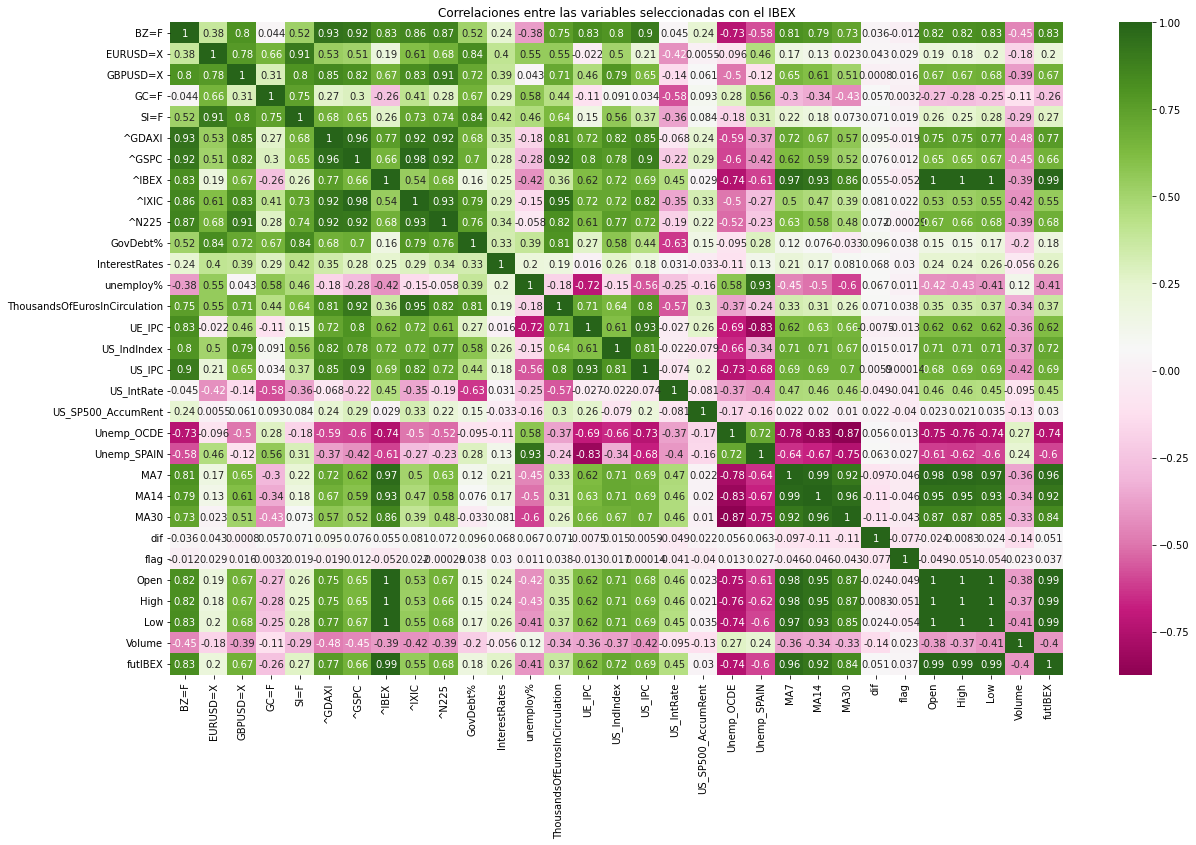

In [106]:
#Se calcula la matriz de correlación
correlations = df_exp.corr()

#Se prepara el gráfico en Seaborn
plt.rcParams["figure.figsize"] = (20, 12)

corvar_corr = sns.heatmap(correlations, cmap="PiYG", annot=True)
plt.title('Correlaciones entre las variables seleccionadas con el IBEX');

^IBEX                            0.991001
Low                              0.989021
High                             0.987455
Open                             0.985611
MA7                              0.956415
MA14                             0.920973
MA30                             0.843952
BZ=F                             0.828256
^GDAXI                           0.766261
US_IndIndex                      0.716500
US_IPC                           0.687142
^N225                            0.680625
GBPUSD=X                         0.674086
^GSPC                            0.664075
UE_IPC                           0.615877
^IXIC                            0.548072
US_IntRate                       0.449830
ThousandsOfEurosInCirculation    0.368131
SI=F                             0.272404
InterestRates                    0.262613
EURUSD=X                         0.201894
GovDebt%                         0.176444
dif                              0.050918
flag                             0

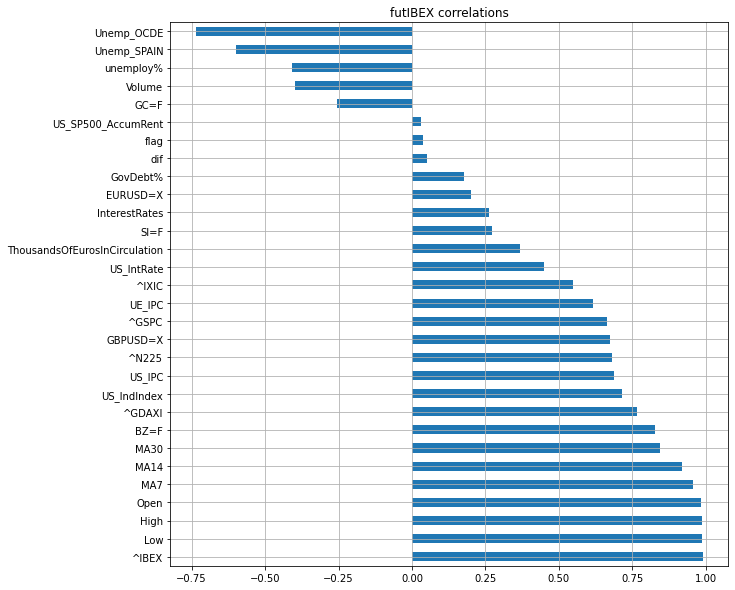

In [107]:
#Selección del ticker a estudiar entre los seleccionados
st='futIBEX'

st_cor=correlations[st].drop(st).sort_values(ascending=False)
print(st_cor)

st_plot=st_cor.plot.barh(title=f'{st} correlations', grid=True, figsize=(10,10));

Se observa como hay algunas variables con escasa correlación entre la variable a predecir, el precio del IBEX al día siguiente de cotización, y algunas variables, las cuales se eliminarán. No obstante, se decidirá mantener alguna como la diferencia entre el valor de hoy y ayer de IBEX, ya que se pretende emplear como variable predictora para el estudio al considerarse interesante. Además, se añade otra variable empleada habitualmente en el análisis técnico como es la diferencia entre el valor actual del IBEX y la media movil, en este caso, se tomará la media móvil de 7 días al ser la que mayor correlación presenta de las tres analizadas.
Se vuelve a graficar los resultados.

In [108]:
#Se añade la diferencia entre la media móvil de 7 días y el IBEX
df_exp=df_exp.join(df_ibex[['difMA7']])
df_exp.dropna(inplace=True)

In [109]:
df_exp.columns

Index(['BZ=F', 'EURUSD=X', 'GBPUSD=X', 'GC=F', 'SI=F', '^GDAXI', '^GSPC',
       '^IBEX', '^IXIC', '^N225', 'GovDebt%', 'InterestRates', 'unemploy%',
       'ThousandsOfEurosInCirculation', 'UE_IPC', 'US_IndIndex', 'US_IPC',
       'US_IntRate', 'US_SP500_AccumRent', 'Unemp_OCDE', 'Unemp_SPAIN', 'MA7',
       'MA14', 'MA30', 'dif', 'flag', 'Open', 'High', 'Low', 'Volume',
       'futIBEX', 'difMA7'],
      dtype='object')

In [110]:
#Se eliminan algunas de las variables con poca correlación
df_exp.drop(['EURUSD=X', 'SI=F', '^GSPC',
       '^IXIC', 'GovDebt%', 'InterestRates', 'unemploy%',
       'ThousandsOfEurosInCirculation', 'UE_IPC', 'US_IndIndex', 'US_IPC',
       'US_IntRate', 'US_SP500_AccumRent',
       'MA14', 'MA30', 'flag','Volume'], axis=1, inplace=True)

print(df_exp.shape)
print(df_exp.columns)

(504, 15)
Index(['BZ=F', 'GBPUSD=X', 'GC=F', '^GDAXI', '^IBEX', '^N225', 'Unemp_OCDE',
       'Unemp_SPAIN', 'MA7', 'dif', 'Open', 'High', 'Low', 'futIBEX',
       'difMA7'],
      dtype='object')


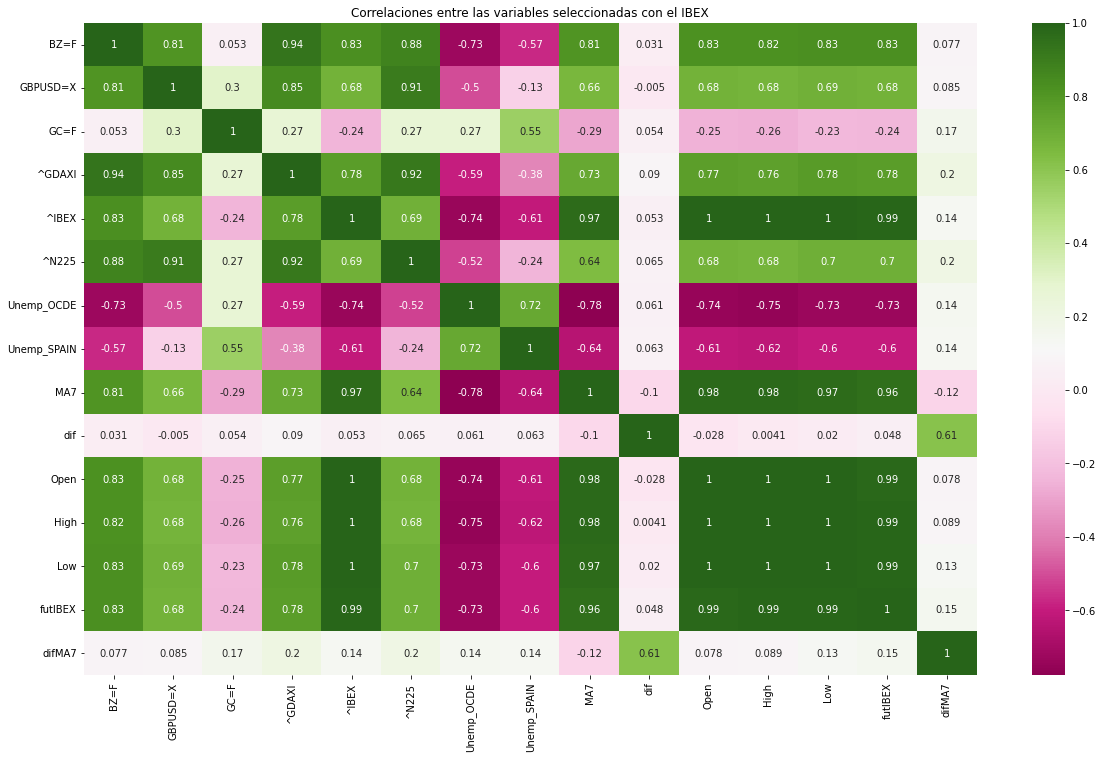

In [111]:
#Se calcula la matriz de correlación
correlations = df_exp.corr()

#Se prepara el gráfico en Seaborn
plt.rcParams["figure.figsize"] = (20, 12)

corvar_corr = sns.heatmap(correlations, cmap="PiYG", annot=True)
plt.title('Correlaciones entre las variables seleccionadas con el IBEX');

^IBEX          0.990776
Low            0.988684
High           0.987029
Open           0.985192
MA7            0.955168
BZ=F           0.828954
^GDAXI         0.776870
^N225          0.696205
GBPUSD=X       0.684548
difMA7         0.150957
dif            0.047524
GC=F          -0.238107
Unemp_SPAIN   -0.598381
Unemp_OCDE    -0.729514
Name: futIBEX, dtype: float64


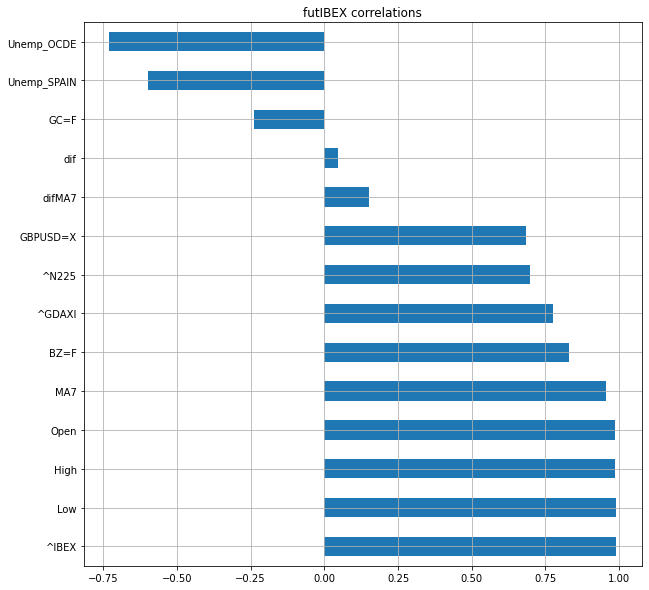

In [112]:
#Selección del ticker a estudiar entre los seleccionados
st='futIBEX'

st_cor=correlations[st].drop(st).sort_values(ascending=False)
print(st_cor)

st_plot=st_cor.plot.barh(title=f'{st} correlations', grid=True, figsize=(10,10));

Finalmente, se deciden escoger como variables para predecir el precio del IBEX para la siguiente sesión las siguientes variables predictoras:
- El precio de cierre del IBEX hoy (^IBEX). El resto de valores se desestima ya que con el precio de cierre de hoy se considera suficiente representatividad del IBEX para el modelo.
- La media de los últimos 7 días del IBEX (MA7)
- El precio de hoy del barril de Brent (BZ=F) para tener en cuenta una materia prima
- El precio actual del índice alemán DAX (^GDAXI) para tener en cuenta un índice similar en un mercado cercano al IBEX
- El índice NIKKEI225 para tener en cuenta mercados externos a Europa y además con un cierto adelanto al mercado español al abrir su bolsa antes que la española.
- El cambio Libra/Dolar (GBPUSD=X) para tener en cuenta el mercado de divisas. Se escoge esta en lugar del cambio Euro/dolar ya que ha mostrado una mayor correlación.
- La diferencia entre el valor actual y en valor pasado del IBEX (dif) a pesar de que tenga un índice de correlación bajo, es de interés estudiar este valor en los modelos ya que podría ser indicador de potencialidad para el valor futuro.
- A pesar de que sería interesante disponer de los datos de desempleo en España o preferiblemente en la OCDE al tener mayor correlación, se deciden descartar como variables predictoras para este problema debido a que los datos aunque sean mensuales, se actualizan con un retraso de 2 meses aproximadamente, por lo que no se podrían disponer de estos datos para aplicar la estrategia en el corto plazo.

In [113]:
df_exp=df_exp.join(df_ibex['flag'])

df_exp=df_exp[['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225',
               'MA7', 'difMA7', 'dif', 'flag','^IBEX', 'futIBEX']]

df_exp

BZ=F  GBPUSD=X    ^GDAXI     ^N225          MA7      difMA7  \
date                                                                       
2020-01-13  64.20    1.3046  13451.52  23850.57  9609.328571  -65.428571   
2020-01-14  64.49    1.2988  13456.49  24025.17  9588.285714  -59.985714   
2020-01-15  64.00    1.3023  13432.30  23916.58  9571.385714  -59.685714   
2020-01-16  64.62    1.3041  13429.43  23933.13  9558.642857   13.857143   
2020-01-17  64.85    1.3079  13526.13  24041.26  9557.600000  123.700000   
...           ...       ...       ...       ...          ...         ...   
2021-12-21  73.98    1.3210  15447.44  28517.59  8324.342857   63.157143   
2021-12-22  75.29    1.3270  15593.47  28562.21  8328.242857  130.857143   
2021-12-23  76.85    1.3352  15756.31  28798.37  8347.728571  215.971429   
2021-12-27  78.60    1.3404  15835.25  28676.46  8374.185714  247.914286   
2021-12-28  78.94    1.3443  15963.70  29069.16  8423.771429  265.128571   

              dif  flag   ^IBEX  futIBEX  
date                                      
2020-01-13  -29.7   0.0  9543.9   9528.3  
2020-01-14  -15.6   0.0  9528.3   9511.7  
2020-01-15  -16.6   1.0  9511.7   9572.5  
2020-01-16   60.8   1.0  9572.5   9681.3  
2020-01-17  108.8   0.0  9681.3   9658.8  
...           ...   ...     ...      ...  
2021-12-21  145.1   1.0  8387.5   8459.1  
2021-12-22   71.6   1.0  8459.1   8563.7  
2021-12-23  104.6   1.0  8563.7   8563.7  
2021-12-27   58.4   1.0  8622.1   8688.9  
2021-12-28   66.8   0.0  8688.9   8673.7  

[504 rows x 10 columns]

In [114]:
df_exp.isna().sum()

BZ=F        0
GBPUSD=X    0
^GDAXI      0
^N225       0
MA7         0
difMA7      0
dif         0
flag        0
^IBEX       0
futIBEX     0
dtype: int64

In [115]:
df_exp.shape

(504, 10)

# Generación de datos de test actuales

In [116]:
#Última fecha de datos de entrenamiento/validacion
test_init_date=end_date
test_init_date

'2022-01-01'

In [117]:
#Fecha actual
test_end_date=datetime.today().strftime('%Y-%m-%d')
test_end_date

'2022-10-01'

In [118]:
#Días entre la última fecha de datos de entrenamiento y validación y datos de test
date_format='%Y-%m-%d'
test_dif = (datetime.strptime(test_end_date, date_format) - datetime.strptime(test_init_date, date_format)).days
print(test_dif)

273


In [119]:
df_exp.columns

Index(['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif', 'flag',
       '^IBEX', 'futIBEX'],
      dtype='object')

In [120]:
#Se descargan los tickers para el test

## Ticker: Barril de Brent
ticker='BZ=F'

df_brent_test = (yf_df(ticker,test_init_date, test_end_date))[['Close', 'day', 'month', 'year']]
df_brent_test.rename(columns = {'Close':ticker}, inplace = True)
#--------------------------------------------------------

## Ticker: Libra vs Dolar
ticker='GBPUSD=X'

df_gbpusd_test = (yf_df(ticker,test_init_date, test_end_date))[['Close', 'day', 'month', 'year']]
df_gbpusd_test.rename(columns = {'Close':ticker}, inplace = True)
#--------------------------------------------------------

## Ticker: Dax
ticker='^GDAXI'

df_dax_test = (yf_df(ticker,test_init_date, test_end_date))[['Close', 'day', 'month', 'year']]
df_dax_test.rename(columns = {'Close':ticker}, inplace = True)
#--------------------------------------------------------

## Ticker: Nikkei
ticker='^N225'

df_nikkei_test = (yf_df(ticker,test_init_date, test_end_date))[['Close', 'day', 'month', 'year']]
df_nikkei_test.rename(columns = {'Close':ticker}, inplace = True)
#--------------------------------------------------------

## Ticker: Ibex
ticker='^IBEX'
test_init_date_IBEX='2021-12-21'

df_ibex_test = (yf_df(ticker,test_init_date_IBEX, test_end_date))[['Close', 'day', 'month', 'year']]
df_ibex_test.rename(columns = {'Close':ticker}, inplace = True)
#--------------------------------------------------------


In [121]:
#Generación de la media movil de 7 días (MA7)
df_ibex_test['MA7']=df_ibex_test['^IBEX'].rolling(7).mean().shift(1)

#Generación de la diferencia entre el valor actual y la MA7 (difMA7)
df_ibex_test['difMA7']=df_ibex_test['^IBEX']-df_ibex_test['MA7']

#Generación de la diferencia entre dos sesiones consecutivas (dif)
df_ibex_test['dif']=df_ibex_test['^IBEX']-df_ibex_test['^IBEX'].shift(1)

#Generación de señales (flag)
df_ibex_test.loc[(df_ibex_test['^IBEX'].shift(-1)-df_ibex_test['^IBEX']) >= 0, 'flag'] = 1
df_ibex_test.loc[(df_ibex_test['^IBEX'].shift(-1)-df_ibex_test['^IBEX']) < 0, 'flag'] = 0

#Generación del valor a predecir (futIBEX)
df_ibex_test['futIBEX']=df_ibex_test['^IBEX'].shift(-1)

df_ibex_test

^IBEX  day  month  year          MA7      difMA7    dif  flag  \
date                                                                         
2021-12-21  8387.5   21     12  2021          NaN         NaN    NaN   1.0   
2021-12-22  8459.1   22     12  2021          NaN         NaN   71.6   1.0   
2021-12-23  8563.7   23     12  2021          NaN         NaN  104.6   1.0   
2021-12-27  8622.1   27     12  2021          NaN         NaN   58.4   1.0   
2021-12-28  8688.9   28     12  2021          NaN         NaN   66.8   0.0   
...            ...  ...    ...   ...          ...         ...    ...   ...   
2022-09-26  7508.5   26      9  2022  7880.985714 -372.485714  -75.0   0.0   
2022-09-27  7445.7   27      9  2022  7798.557143 -352.857143  -62.8   0.0   
2022-09-28  7442.2   28      9  2022  7721.557143 -279.357143   -3.5   0.0   
2022-09-29  7300.1   29      9  2022  7642.842857 -342.742857 -142.1   1.0   
2022-09-30  7366.8   30      9  2022  7560.985714 -194.185714   66.7   NaN   

            futIBEX  
date                 
2021-12-21   8459.1  
2021-12-22   8563.7  
2021-12-23   8622.1  
2021-12-27   8688.9  
2021-12-28   8673.7  
...             ...  
2022-09-26   7445.7  
2022-09-27   7442.2  
2022-09-28   7300.1  
2022-09-29   7366.8  
2022-09-30      NaN  

[200 rows x 9 columns]

In [122]:
#Se genera una matriz con variables predcitoras para unirlas
df_m_test=[df_brent_test.iloc[:,0], df_gbpusd_test.iloc[:,0], df_dax_test.iloc[:,0], df_nikkei_test.iloc[:,0]]
df_m_test

[date
 2022-01-03    78.98
 2022-01-04    80.00
 2022-01-05    80.80
 2022-01-06    81.99
 2022-01-07    81.75
               ...  
 2022-09-26    84.06
 2022-09-27    86.27
 2022-09-28    89.32
 2022-09-29    88.49
 2022-09-30    87.96
 Name: BZ=F, Length: 189, dtype: float64, date
 2022-01-03    1.3522
 2022-01-04    1.3483
 2022-01-05    1.3531
 2022-01-06    1.3556
 2022-01-07    1.3534
                ...  
 2022-09-26    1.0797
 2022-09-27    1.0773
 2022-09-28    1.0728
 2022-09-29    1.0836
 2022-09-30    1.1169
 Name: GBPUSD=X, Length: 195, dtype: float64, date
 2022-01-03    16020.73
 2022-01-04    16152.61
 2022-01-05    16271.75
 2022-01-06    16052.03
 2022-01-07    15947.74
                 ...   
 2022-09-26    12227.92
 2022-09-27    12139.68
 2022-09-28    12183.28
 2022-09-29    11975.55
 2022-09-30    12114.36
 Name: ^GDAXI, Length: 193, dtype: float64, date
 2022-01-04    29301.79
 2022-01-05    29332.16
 2022-01-06    28487.87
 2022-01-07    28478.56
 2022-01-11   

In [123]:
#Se unen las variables predictoras
df_test=df_ibex_test.join(df_m_test)
df_test

^IBEX   day  month    year          MA7      difMA7    dif  flag  \
date                                                                            
2021-12-21  8387.5  21.0   12.0  2021.0          NaN         NaN    NaN   1.0   
2021-12-22  8459.1  22.0   12.0  2021.0          NaN         NaN   71.6   1.0   
2021-12-23  8563.7  23.0   12.0  2021.0          NaN         NaN  104.6   1.0   
2021-12-27  8622.1  27.0   12.0  2021.0          NaN         NaN   58.4   1.0   
2021-12-28  8688.9  28.0   12.0  2021.0          NaN         NaN   66.8   0.0   
...            ...   ...    ...     ...          ...         ...    ...   ...   
2022-09-26  7508.5  26.0    9.0  2022.0  7880.985714 -372.485714  -75.0   0.0   
2022-09-27  7445.7  27.0    9.0  2022.0  7798.557143 -352.857143  -62.8   0.0   
2022-09-28  7442.2  28.0    9.0  2022.0  7721.557143 -279.357143   -3.5   0.0   
2022-09-29  7300.1  29.0    9.0  2022.0  7642.842857 -342.742857 -142.1   1.0   
2022-09-30  7366.8  30.0    9.0  2022.0  7560.985714 -194.185714   66.7   NaN   

            futIBEX   BZ=F  GBPUSD=X    ^GDAXI     ^N225  
date                                                      
2021-12-21   8459.1    NaN       NaN       NaN       NaN  
2021-12-22   8563.7    NaN       NaN       NaN       NaN  
2021-12-23   8622.1    NaN       NaN       NaN       NaN  
2021-12-27   8688.9    NaN       NaN       NaN       NaN  
2021-12-28   8673.7    NaN       NaN       NaN       NaN  
...             ...    ...       ...       ...       ...  
2022-09-26   7445.7  84.06    1.0797  12227.92  26431.55  
2022-09-27   7442.2  86.27    1.0773  12139.68  26571.87  
2022-09-28   7300.1  89.32    1.0728  12183.28  26173.98  
2022-09-29   7366.8  88.49    1.0836  11975.55  26422.05  
2022-09-30      NaN  87.96    1.1169  12114.36  25937.21  

[200 rows x 13 columns]

In [124]:
#Comprobación de nulos
df_test.isna().sum()

^IBEX        0
day          0
month        0
year         0
MA7          7
difMA7       7
dif          1
flag         1
futIBEX      1
BZ=F        12
GBPUSD=X     7
^GDAXI       7
^N225       20
dtype: int64

In [125]:
#Si existen valores nulos de un día, estos se rellenarán con los valores del día previo
df_test=df_test.fillna(method='ffill')

#Si existen nulos, se eliminarán
df_test.dropna(inplace=True)

#Se genera el dataset para hacer el test con los datos actuales
df_test=df_test[df_exp.columns]
df_test

BZ=F  GBPUSD=X    ^GDAXI     ^N225          MA7      difMA7  \
date                                                                       
2022-01-04  80.00    1.3483  16152.61  29301.79  8640.357143  155.442857   
2022-01-05  80.80    1.3531  16271.75  29332.16  8688.457143  102.342857   
2022-01-06  81.99    1.3556  16052.03  28487.87  8720.900000   69.000000   
2022-01-07  81.75    1.3534  15947.74  28478.56  8744.871429    6.928571   
2022-01-10  80.87    1.3592  15768.27  28478.56  8753.857143  -46.957143   
...           ...       ...       ...       ...          ...         ...   
2022-09-26  84.06    1.0797  12227.92  26431.55  7880.985714 -372.485714   
2022-09-27  86.27    1.0773  12139.68  26571.87  7798.557143 -352.857143   
2022-09-28  89.32    1.0728  12183.28  26173.98  7721.557143 -279.357143   
2022-09-29  88.49    1.0836  11975.55  26422.05  7642.842857 -342.742857   
2022-09-30  87.96    1.1169  12114.36  25937.21  7560.985714 -194.185714   

              dif  flag   ^IBEX  futIBEX  
date                                      
2022-01-04   34.6   0.0  8795.8   8790.8  
2022-01-05   -5.0   0.0  8790.8   8789.9  
2022-01-06   -0.9   0.0  8789.9   8751.8  
2022-01-07  -38.1   0.0  8751.8   8706.9  
2022-01-10  -44.9   1.0  8706.9   8755.9  
...           ...   ...     ...      ...  
2022-09-26  -75.0   0.0  7508.5   7445.7  
2022-09-27  -62.8   0.0  7445.7   7442.2  
2022-09-28   -3.5   0.0  7442.2   7300.1  
2022-09-29 -142.1   1.0  7300.1   7366.8  
2022-09-30   66.7   1.0  7366.8   7366.8  

[192 rows x 10 columns]

In [126]:
#Se obtienen las primeras y últimas fechas de los valores actuales
init_date_final = df_test.index.min().strftime(date_format)
end_date_final = df_test.index.max().strftime(date_format)
print("Primera fecha de los valores actuales: ",init_date_final)
print("Última fecha de los valores actuales: ",end_date_final)

#Sesiones entre las fechas
sesiones_test=df_test.shape[0]
print("Sesiones en los datos de test actuales: ", sesiones_test)

Primera fecha de los valores actuales:  2022-01-04
Última fecha de los valores actuales:  2022-09-30
Sesiones en los datos de test actuales:  192


# Guardado de datos

## YFINANCE

yfinance toma los datos del portal Yahoo Finance mediante scrapping, por lo que existe un riesgo a que la librería deje de funcionar, a que lo haga Yahoo Finance o que este portal deje de emitir los datos, por ello se descargan los datos para tener una copia de seguridad

In [127]:
#Ruta donde guardar los datos
ruta_guardar='/content/drive/MyDrive/0_TFM_BD/data/saved/'
sufijo='_' + init_date + '_' + end_date + '.csv'

#Guardado de los dataframes descargados mediante yfinance
df_sp500.to_csv(ruta_guardar + 'df_sp500' + sufijo, encoding='utf-8')
df_nasdaq.to_csv(ruta_guardar + 'df_nasdaq' + sufijo, encoding='utf-8')
df_eurusd.to_csv(ruta_guardar + 'df_eurusd' + sufijo, encoding='utf-8')
df_gbpusd.to_csv(ruta_guardar + 'df_gbpusd' + sufijo, encoding='utf-8')
df_brent.to_csv(ruta_guardar + 'df_brent' + sufijo, encoding='utf-8')
df_gold.to_csv(ruta_guardar + 'df_gold' + sufijo, encoding='utf-8')
df_silver.to_csv(ruta_guardar + 'df_silver' + sufijo, encoding='utf-8')
df_ibex.to_csv(ruta_guardar + 'df_ibex' + sufijo, encoding='utf-8')
df_dax.to_csv(ruta_guardar + 'df_dax' + sufijo, encoding='utf-8')
df_nikkei.to_csv(ruta_guardar + 'df_nikkei' + sufijo, encoding='utf-8')
df_exp.to_csv(ruta_guardar + 'df_exp' + sufijo, encoding='utf-8')

#Guardado de datos actuales para test
sufijo_test='_' + init_date_final + '_' + end_date_final + '.csv'
df_test.to_csv(ruta_guardar + 'df_test' + sufijo_test, encoding='utf-8')

print('Datos guardados')

Datos guardados
